In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd "/gdrive/My Drive/ChallengeANN2"

/gdrive/My Drive/ChallengeANN2


In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, minmax_scale, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
import warnings
import logging
from sklearn.utils import compute_class_weight
import math
import matplotlib.backends.backend_pdf

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
import os.path
from os import path

datasetX = "x_train.npy"
datasetY = "y_train.npy"

# Load the dataset to be used for classification
if (not os.path.exists(datasetX)) or (not os.path.exists(datasetY)):
    !unzip training_dataset_homework2.zip

In [ ]:
# Define a function to inspect NumPy arrays
def describe_array(np_array):
    print("Dimensions:",np_array.ndim)
    print("Type:",np_array.dtype)
    print("Shape:",np_array.shape)
    print(np_array,"\n")

In [ ]:
datasetX = np.load('x_train.npy')
datasetY = np.load('y_train.npy')

In [ ]:
label_mapping = {
    'Wish': 0,
    'Another': 1,
    'Comfortably': 2,
    'Money': 3,
    'Breathe': 4,
    'Time': 5,
    'Brain': 6,
    'Echoes': 7,
    'Wearing': 8,
    'Sorrow': 9,
    'Hey': 10,
    'Shine': 11
}

label_mapping_for_title = {
    0 : 'Wish',
    1 : 'Another',
    2 : 'Comfortably',
    3 : 'Money',
    4 : 'Breathe',
    5 : 'Time',
    6 : 'Brain',
    7 : 'Echoes',
    8 : 'Wearing',
    9 : 'Sorrow',
    10 : 'Hey',
    11 : 'Shine'
}

In [ ]:
classes = [None for i in range(12)]
labels = [None for i in range(12)]

for i in np.ndindex(datasetX.shape[:1]):
    for j in range(12):
        if datasetY[i] == j:
          if classes[j] is None:
              classes[j] = datasetX[i][None]
              labels[j] = datasetY[i][None]
          else:
              classes[j] = np.vstack((classes[j],datasetX[i][None]))
              labels[j] = np.vstack((labels[j],datasetY[i][None]))

print("Classes")
for k in range(0,12):
  print(classes[k].shape)

print("\nLabels")
for k in range(0,12):
  print(labels[k].shape)

Classes
(34, 36, 6)
(123, 36, 6)
(270, 36, 6)
(381, 36, 6)
(62, 36, 6)
(153, 36, 6)
(313, 36, 6)
(68, 36, 6)
(120, 36, 6)
(777, 36, 6)
(77, 36, 6)
(51, 36, 6)

Labels
(34, 1)
(123, 1)
(270, 1)
(381, 1)
(62, 1)
(153, 1)
(313, 1)
(68, 1)
(120, 1)
(777, 1)
(77, 1)
(51, 1)


In [ ]:
def inspect_class(class_int, size_to_inspect=0):
  array = classes[class_int]
  size_to_inspect = math.ceil((size_to_inspect/array.shape[1]))
  if size_to_inspect == 0:
    dataMiddle = array[:]
  else:
    dataMiddle = array[:size_to_inspect]
  data = (dataMiddle.transpose(2,0,1).reshape(dataMiddle.shape[2], dataMiddle.shape[0] * dataMiddle.shape[1])).T

  fig = plt.figure(figsize=(18,9), dpi=80)
  plt.plot(data)
  plt.title(label_mapping_for_title[class_int])
  plt.show()
  pdf.savefig(fig)

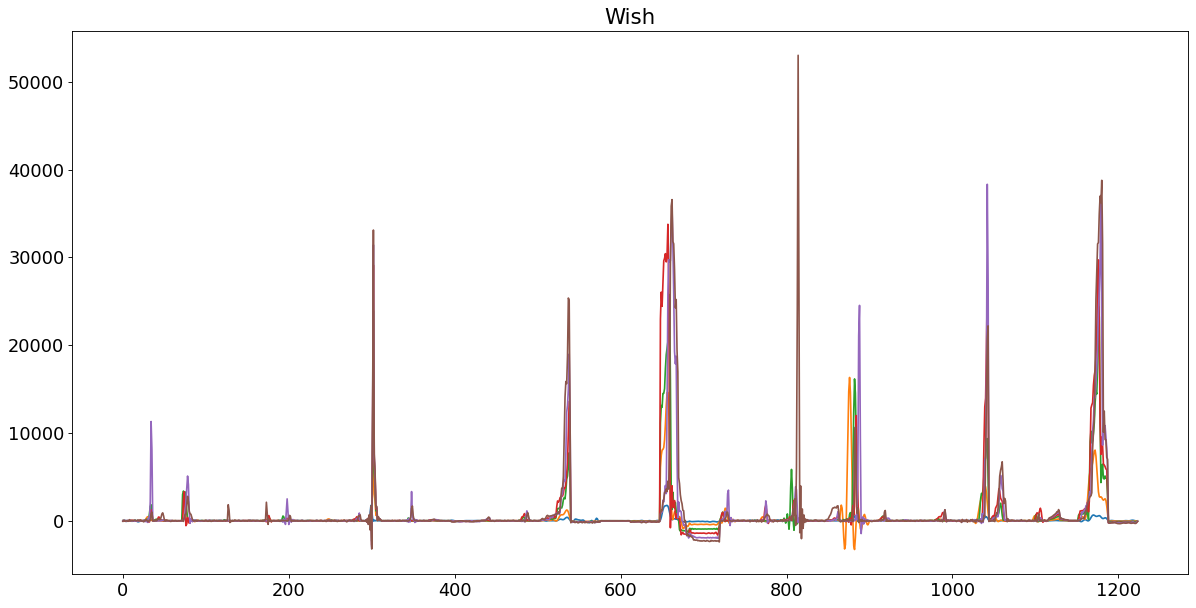

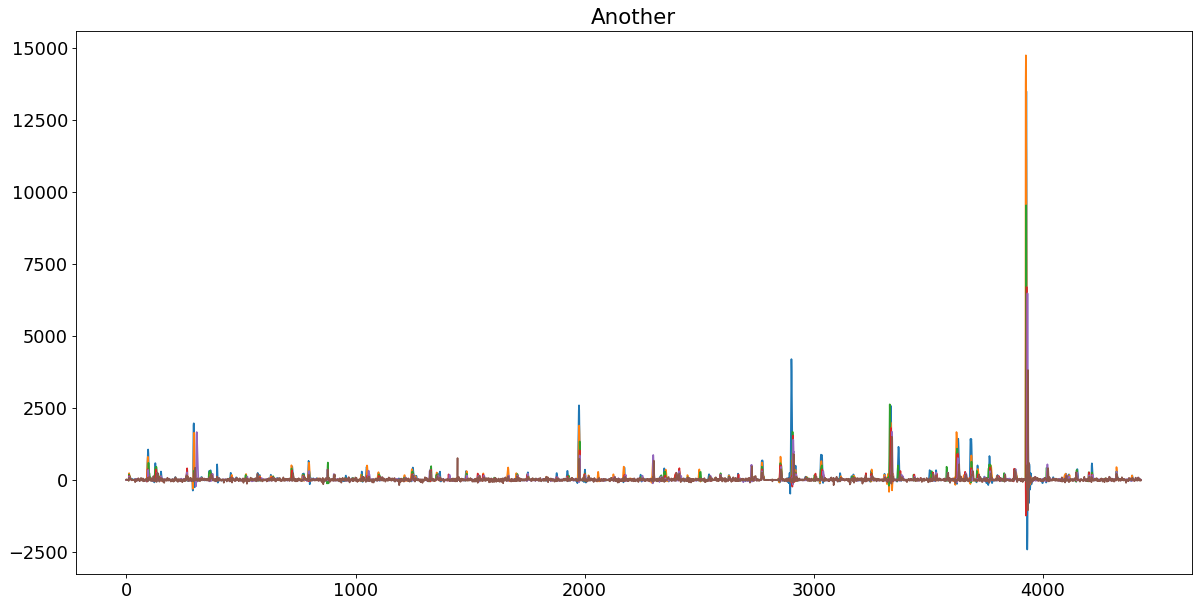

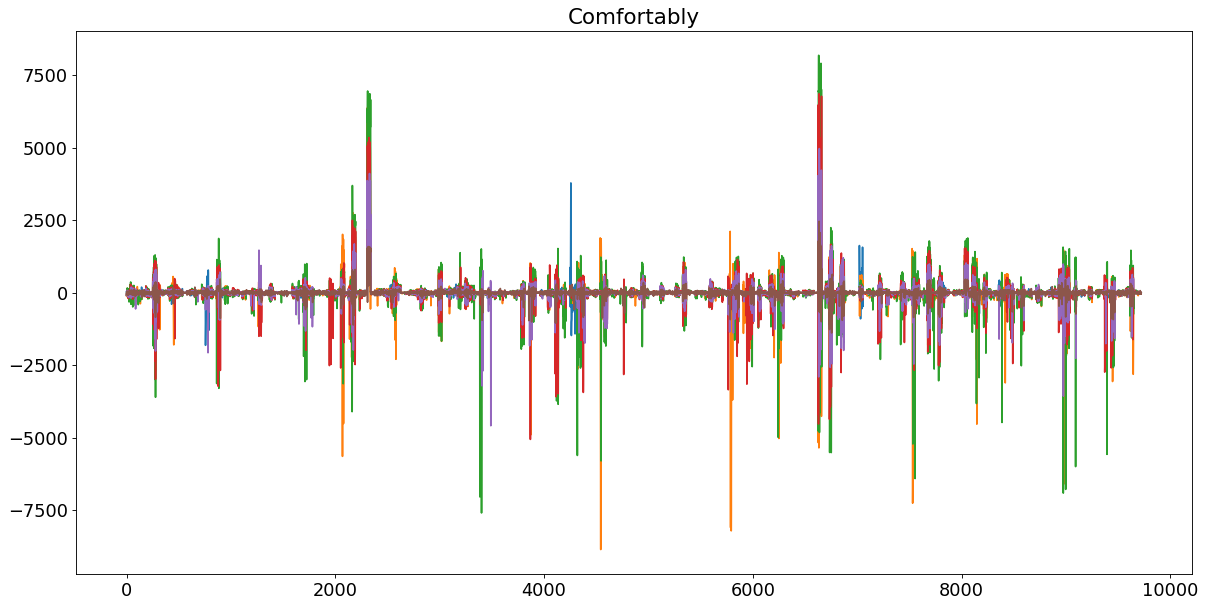

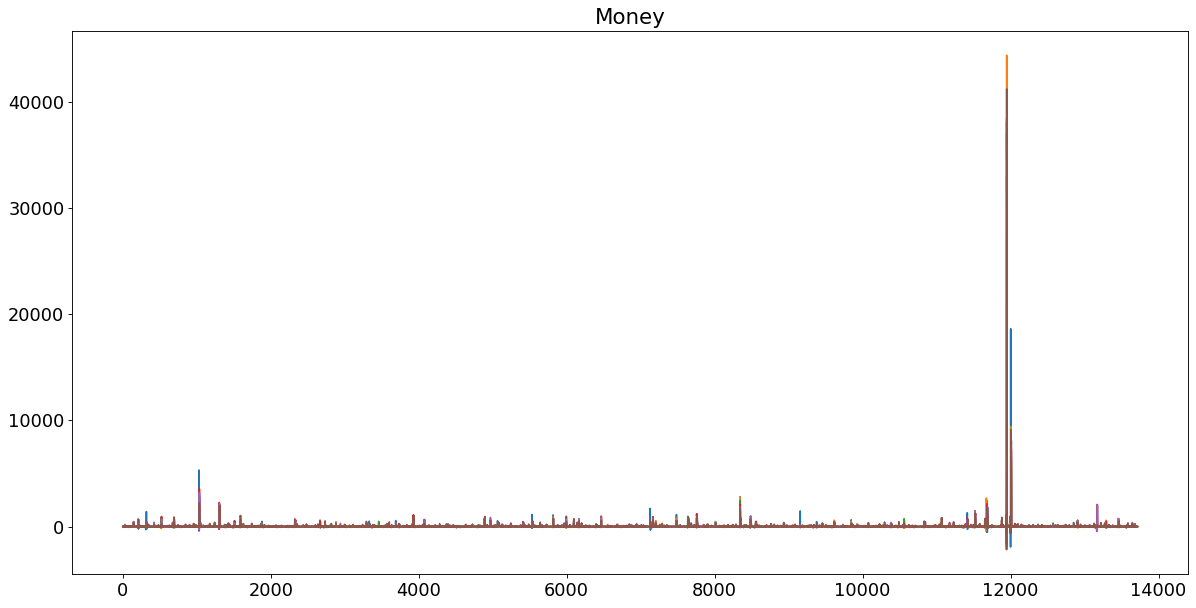

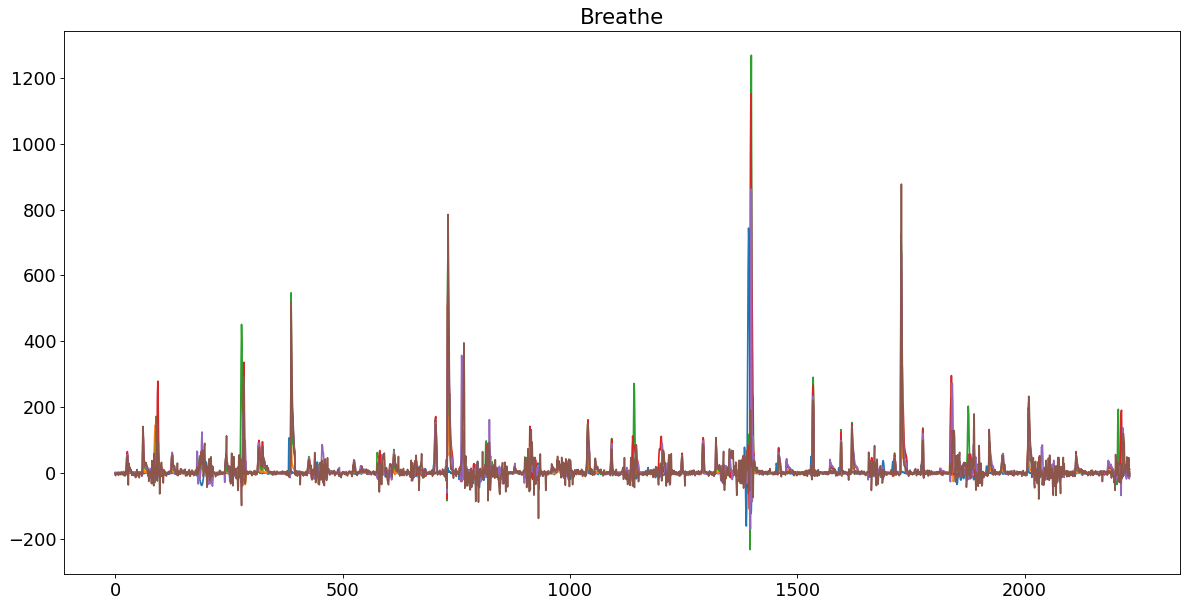

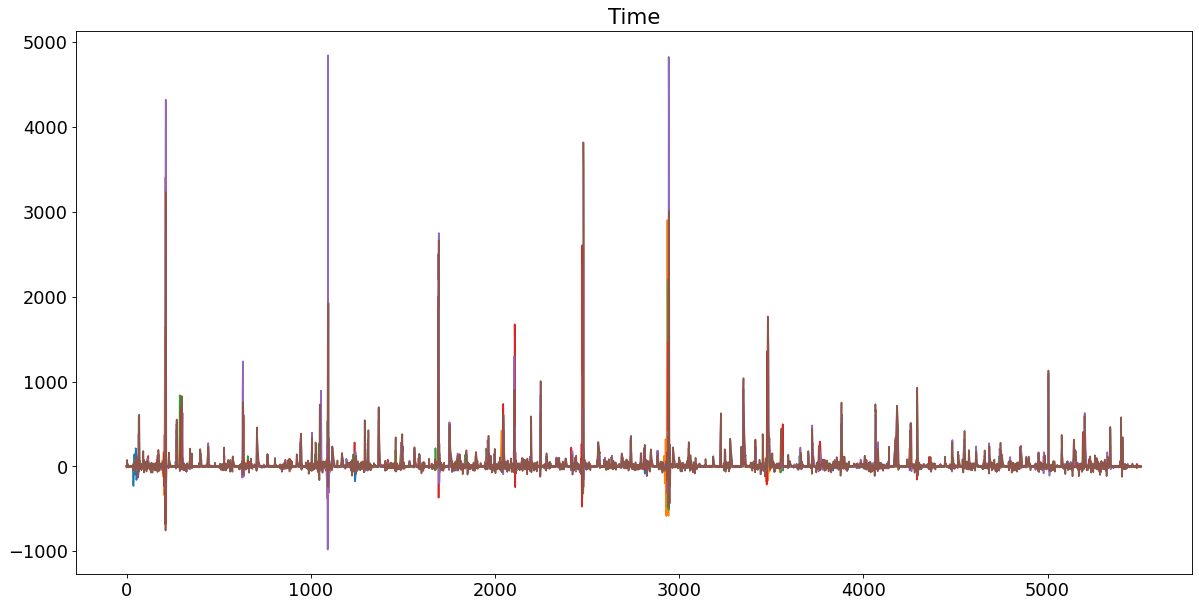

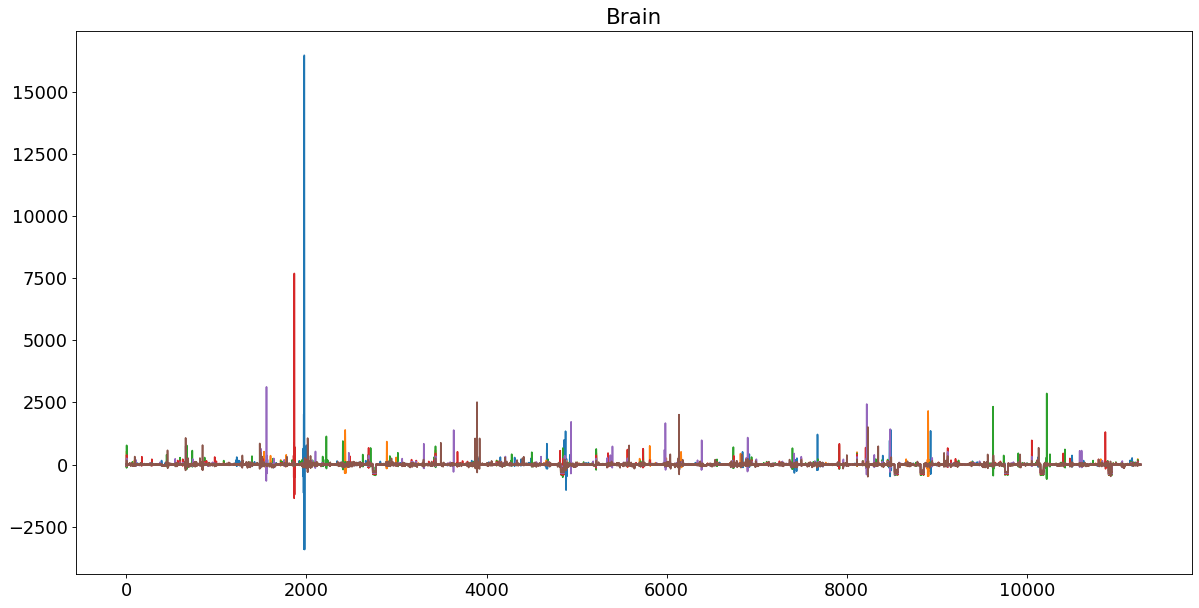

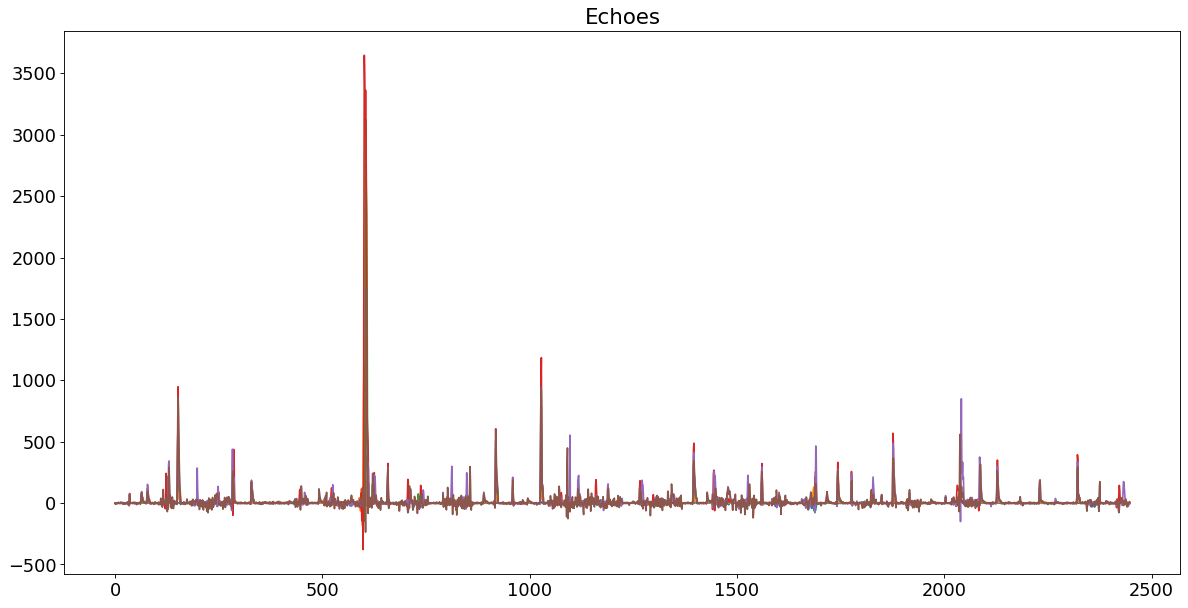

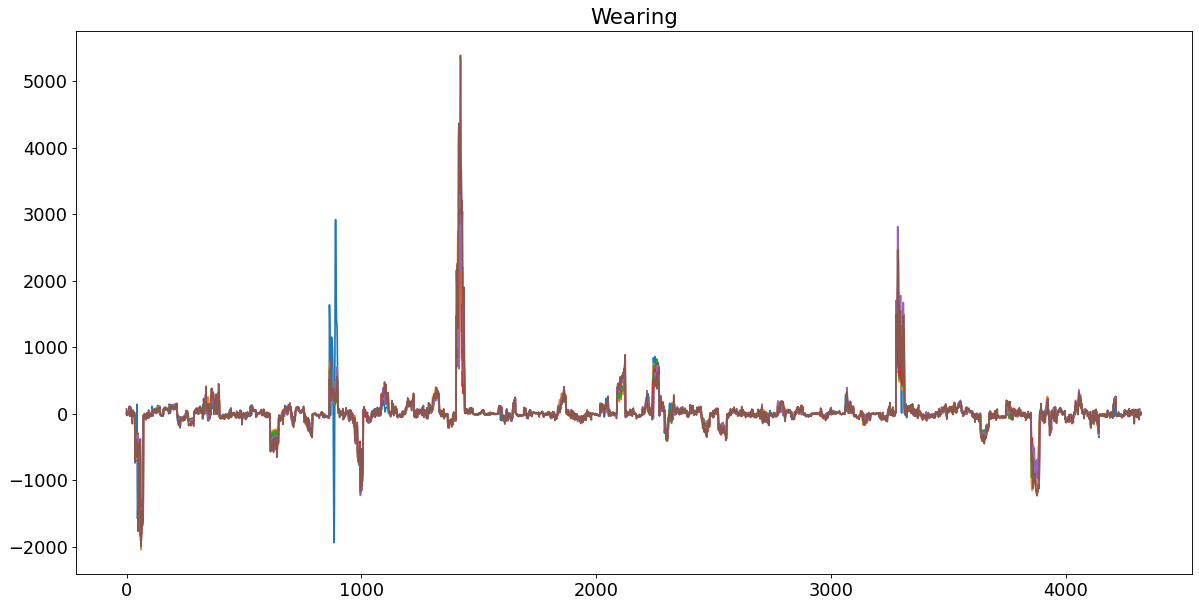

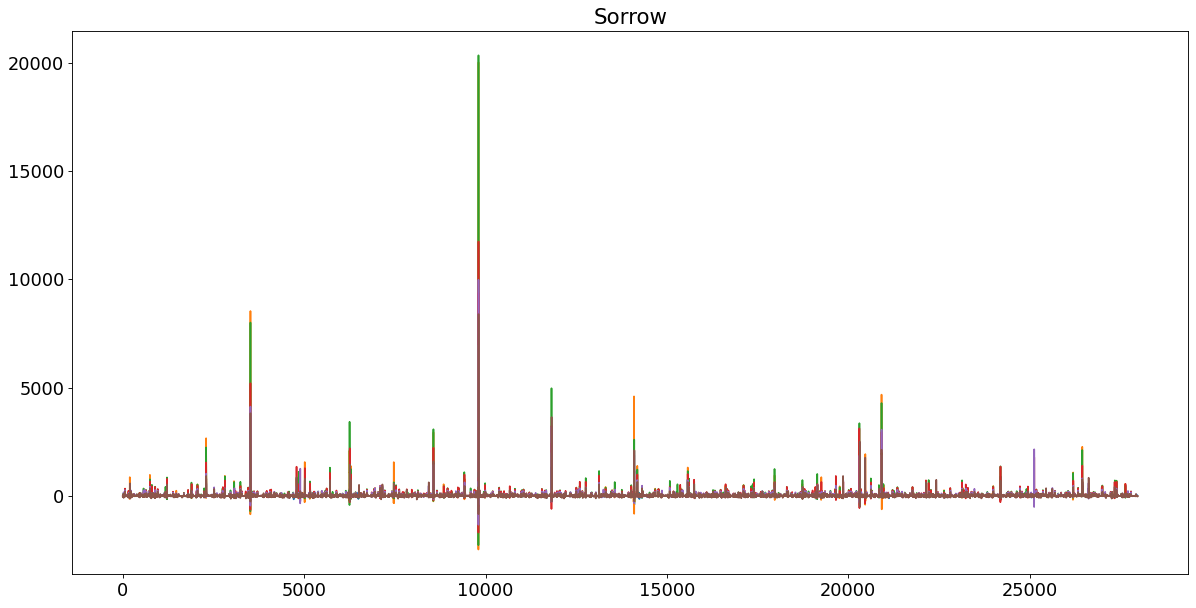

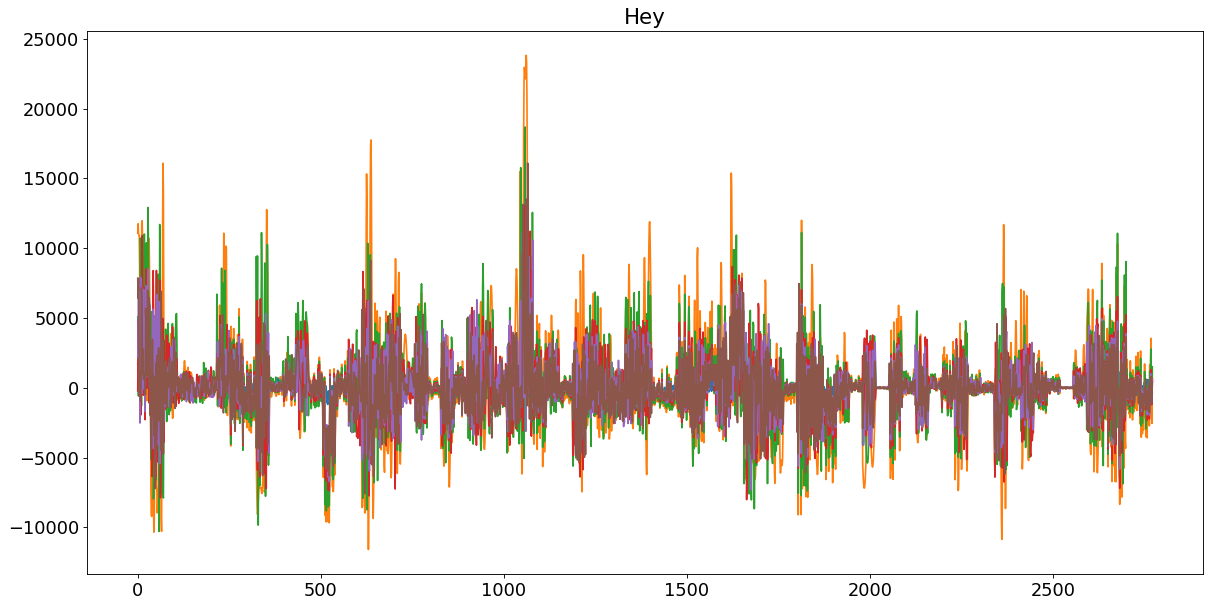

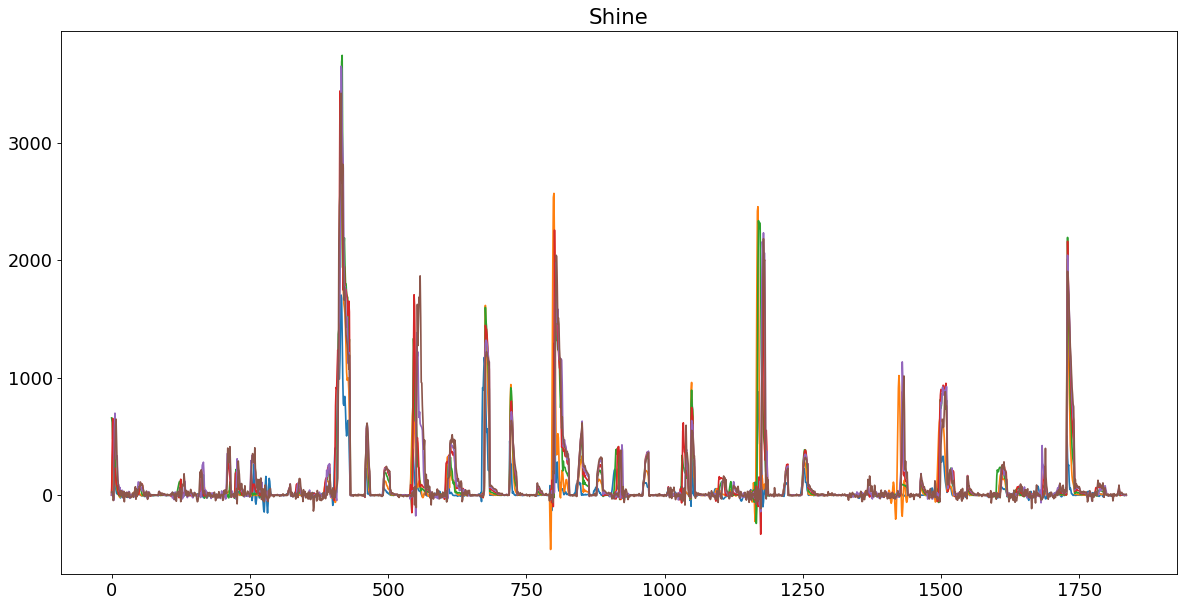

In [ ]:
pdf = matplotlib.backends.backend_pdf.PdfPages("FeaturesPerClasses.pdf")
for i in range(0,12):
  inspect_class(i)
pdf.close()

In [ ]:
def inspect_feature_of_class(class_int, feature_to_inspect, size_to_inspect=0):
  array = classes[class_int]
  size_to_inspect = math.ceil((size_to_inspect/array.shape[1]))
  if size_to_inspect == 0:
    dataMiddle = array[:]
  else:
    dataMiddle = array[:size_to_inspect]
  data = (dataMiddle.transpose(2,0,1).reshape(dataMiddle.shape[2], dataMiddle.shape[0] * dataMiddle.shape[1])).T

  fig = plt.figure(figsize=(30,10), dpi=80)
  plt.plot(data[:, feature_to_inspect])
  stringTitle = "Class number: " + str(class_int) + ", Class name: " + str(label_mapping_for_title[class_int]) + ", Feature: " + str(feature_to_inspect);
  plt.title(stringTitle)
  plt.show()
  pdf2.savefig(fig)

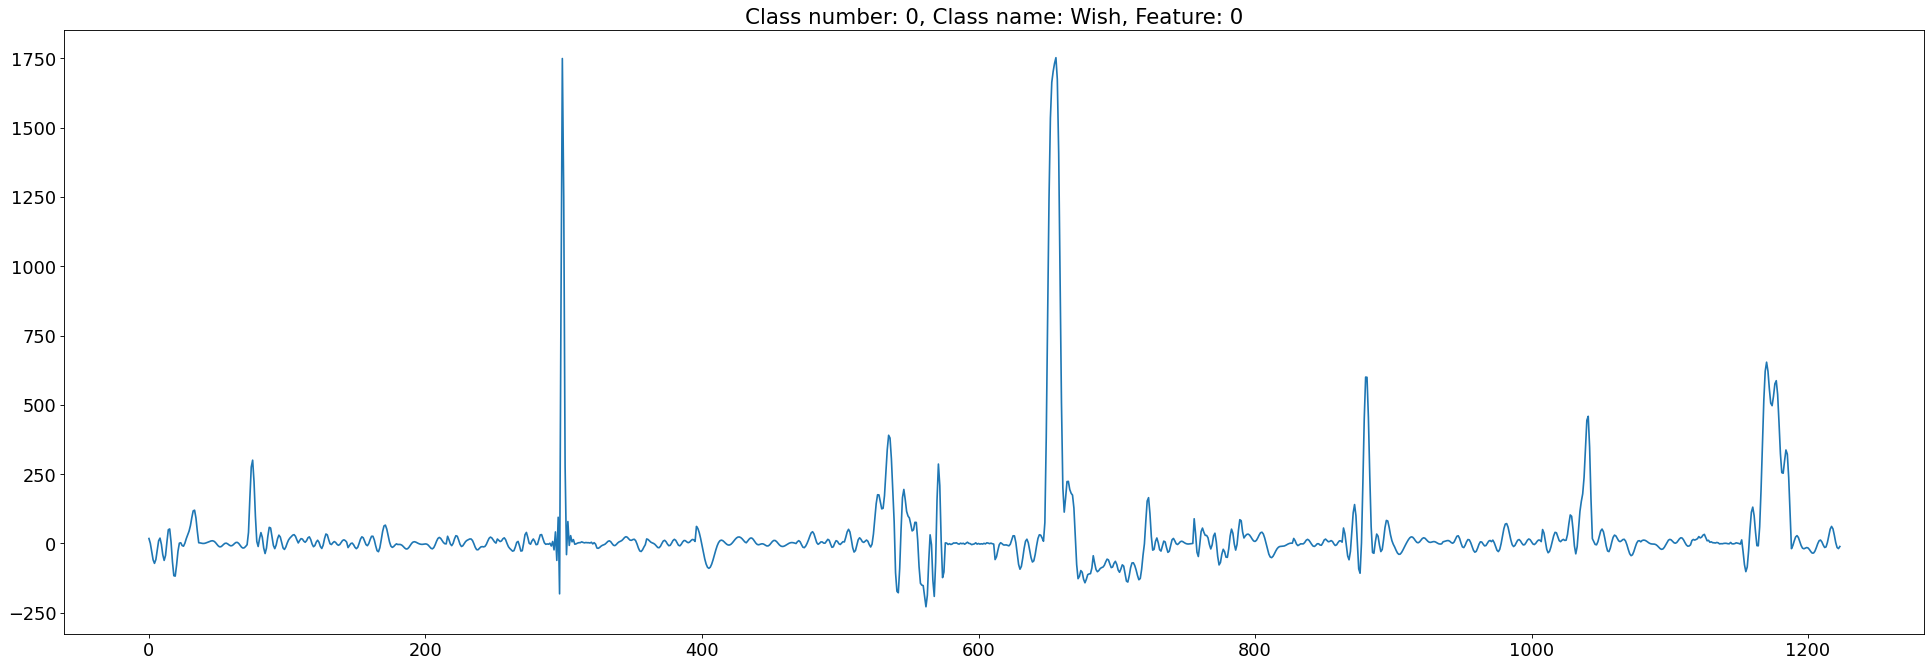

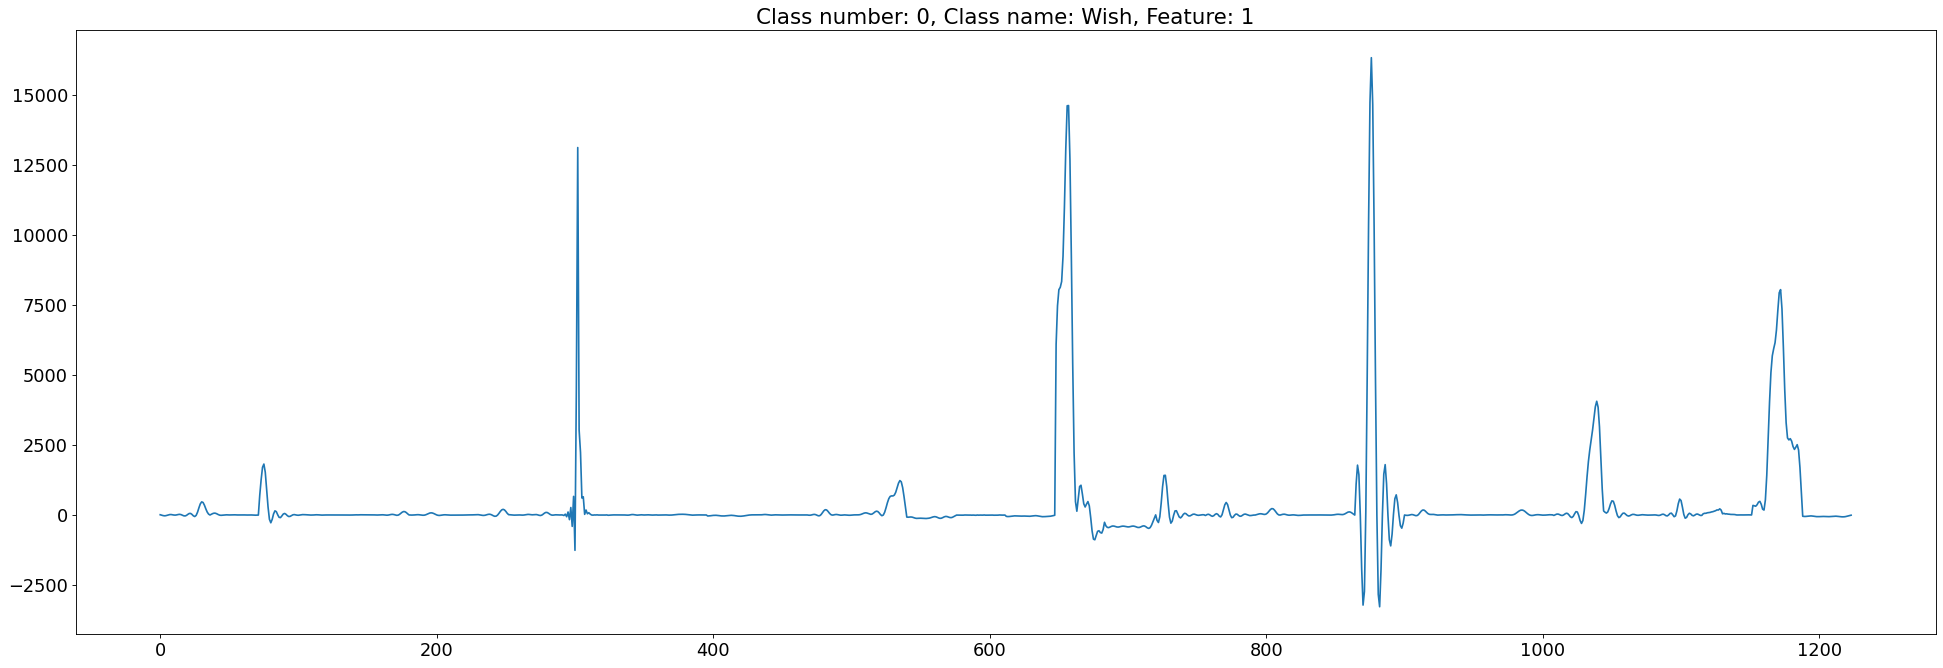

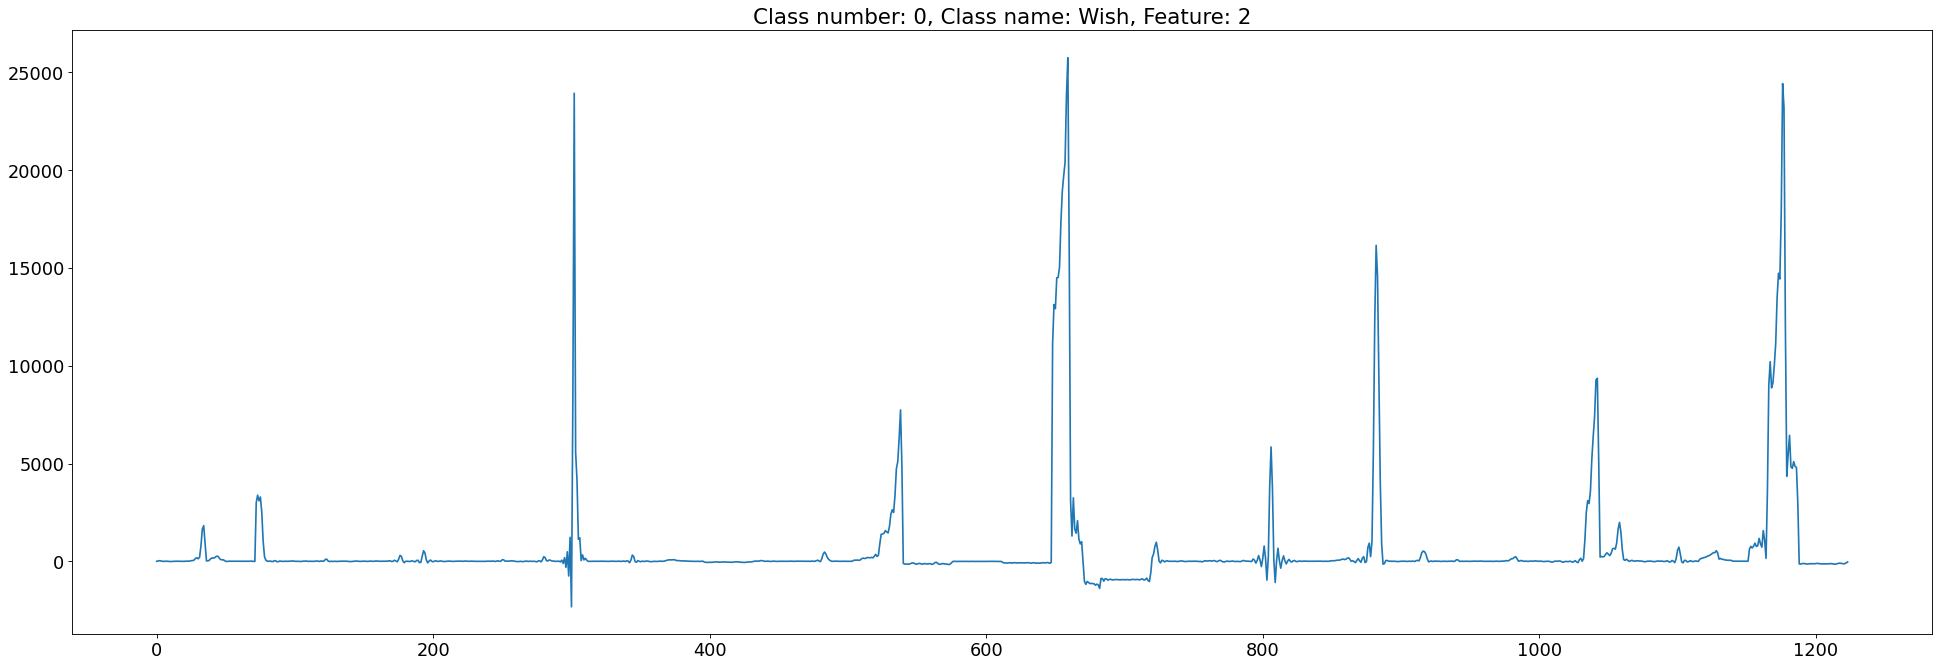

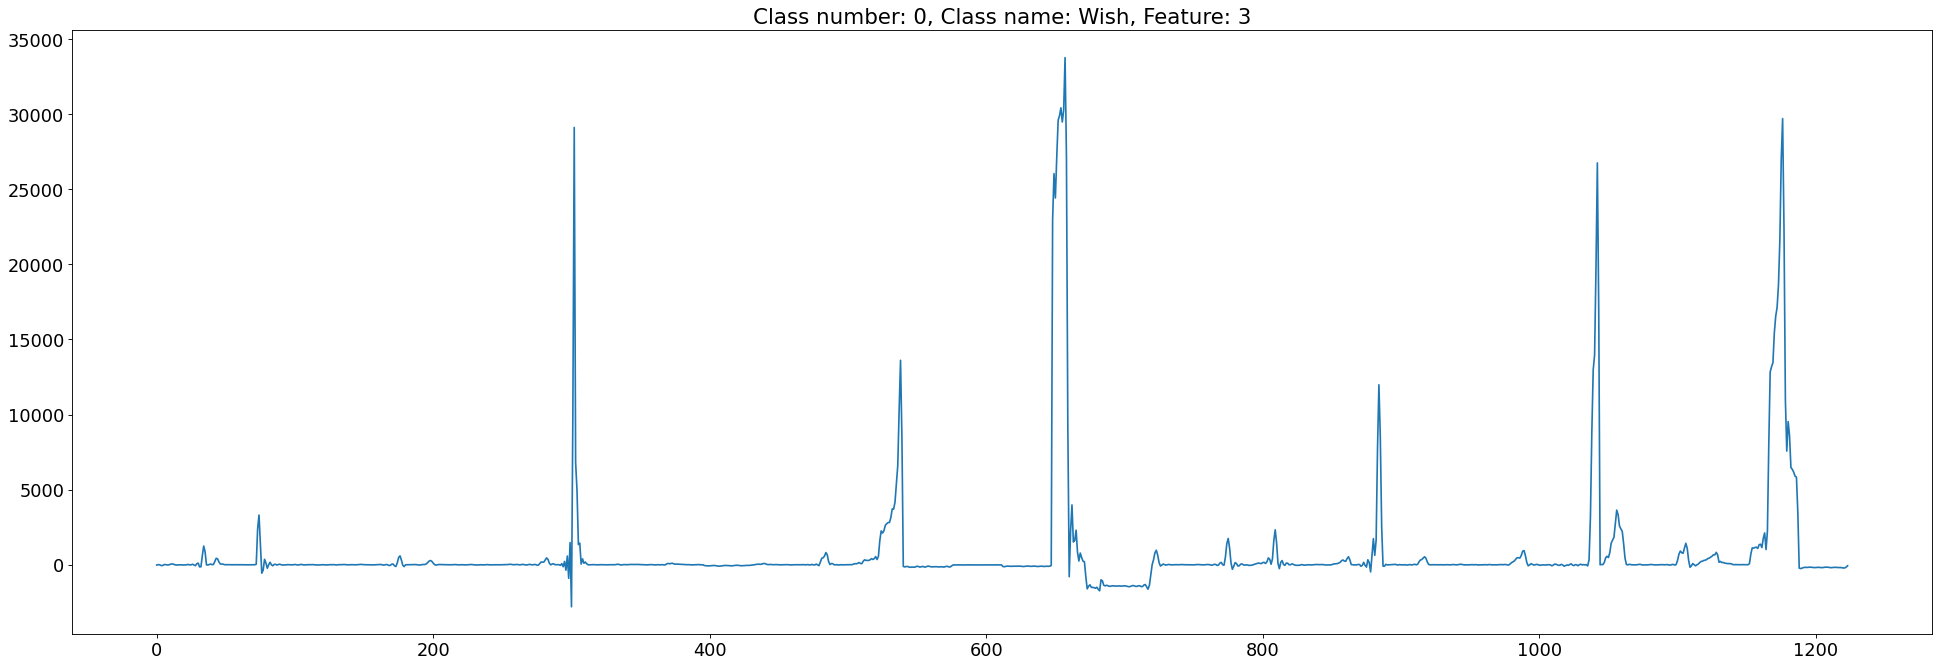

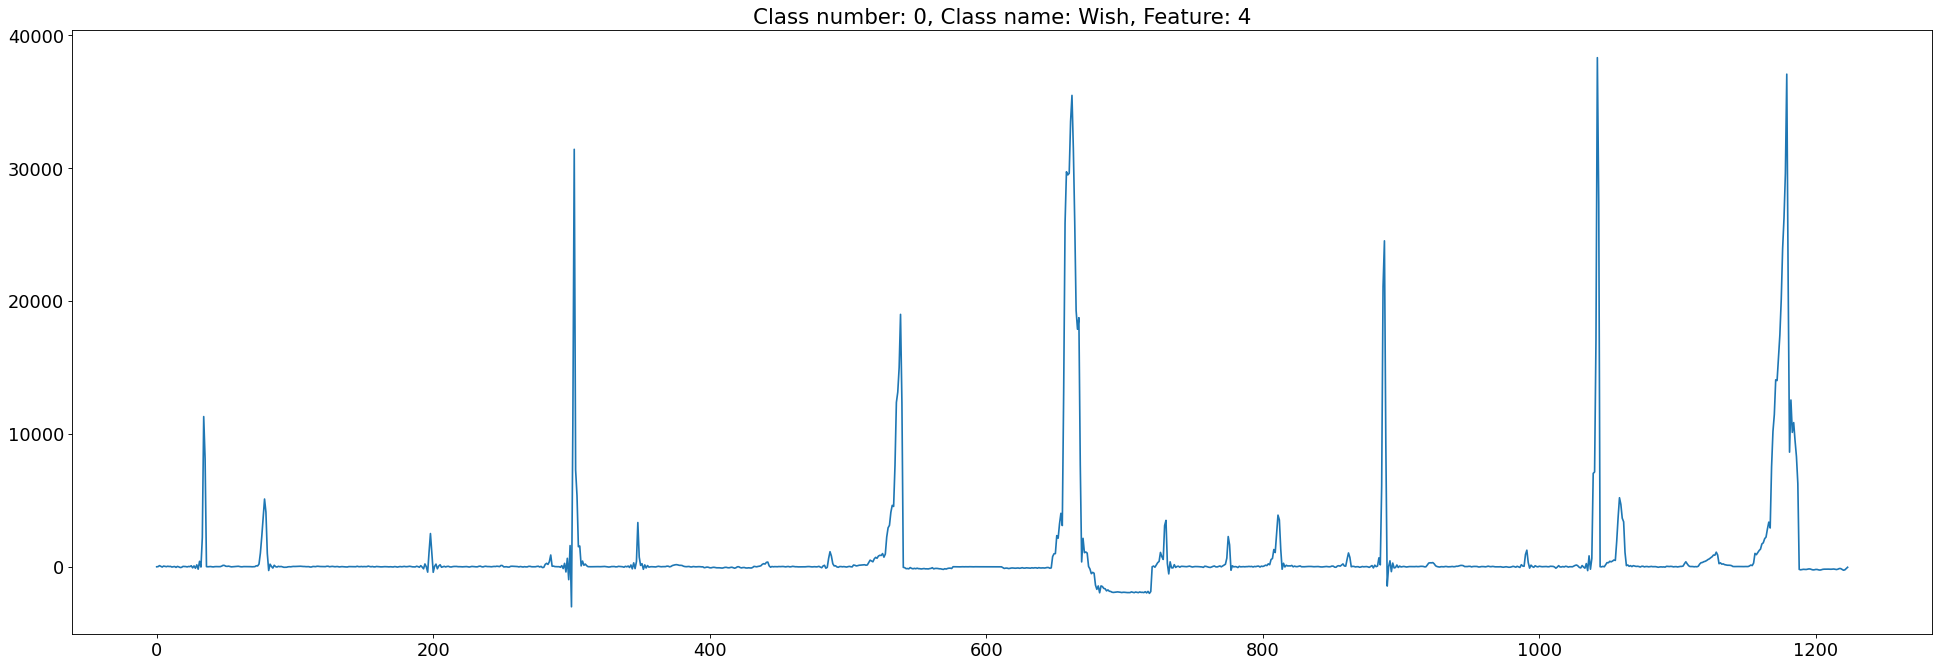

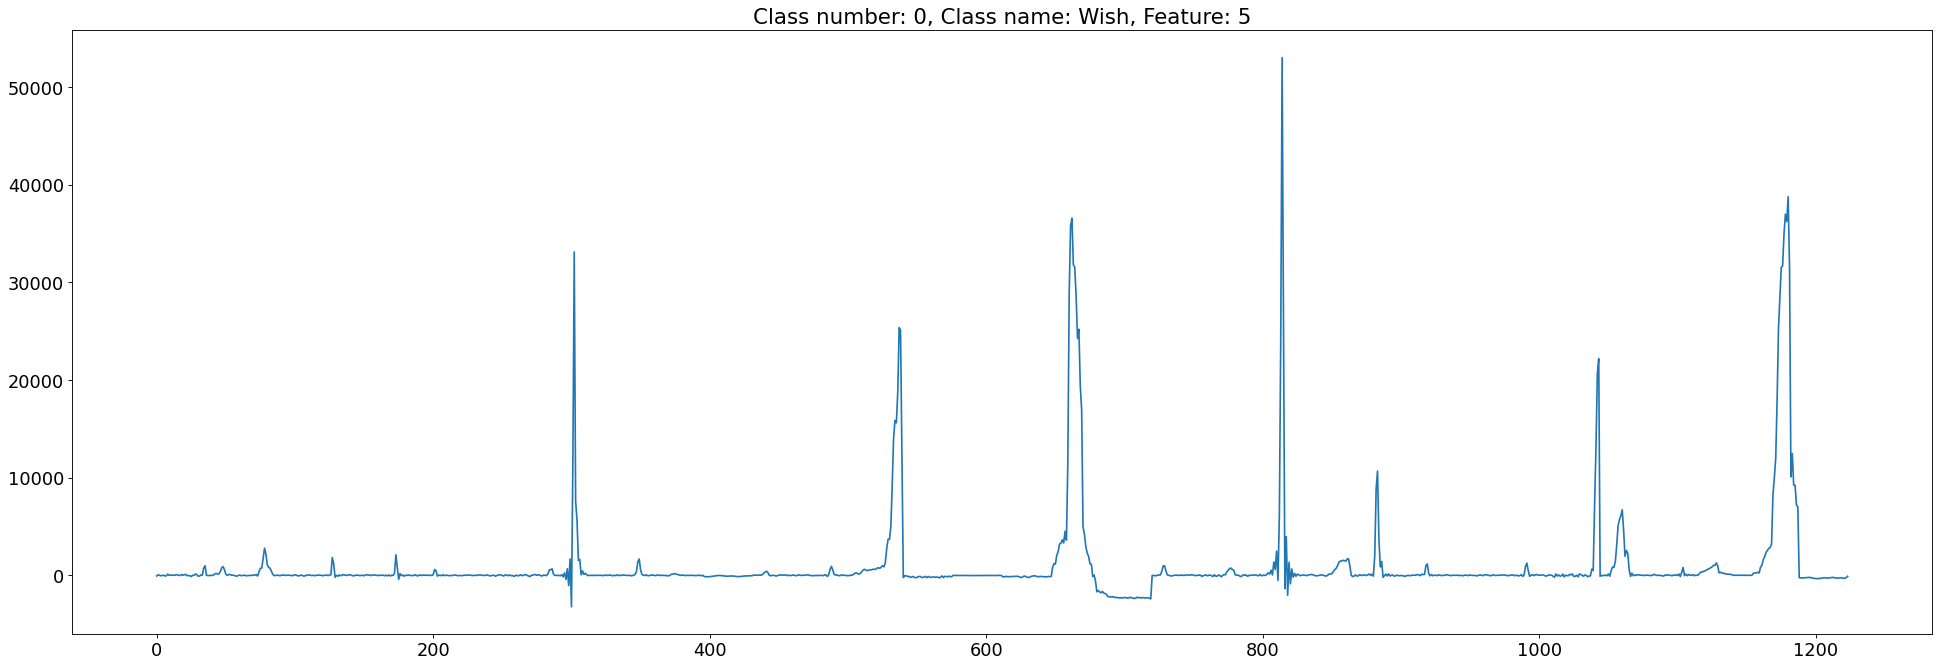

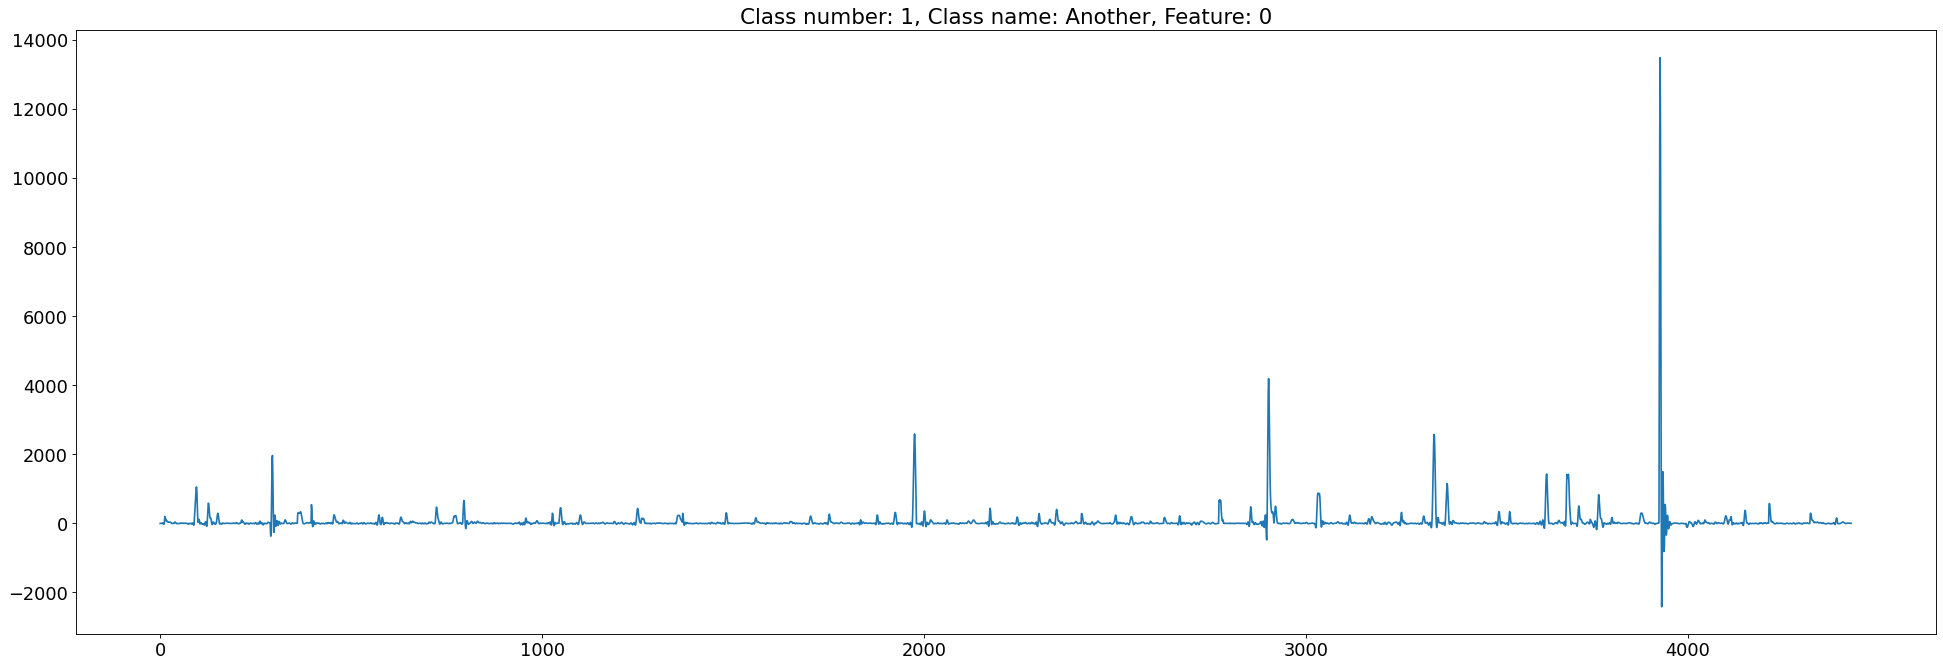

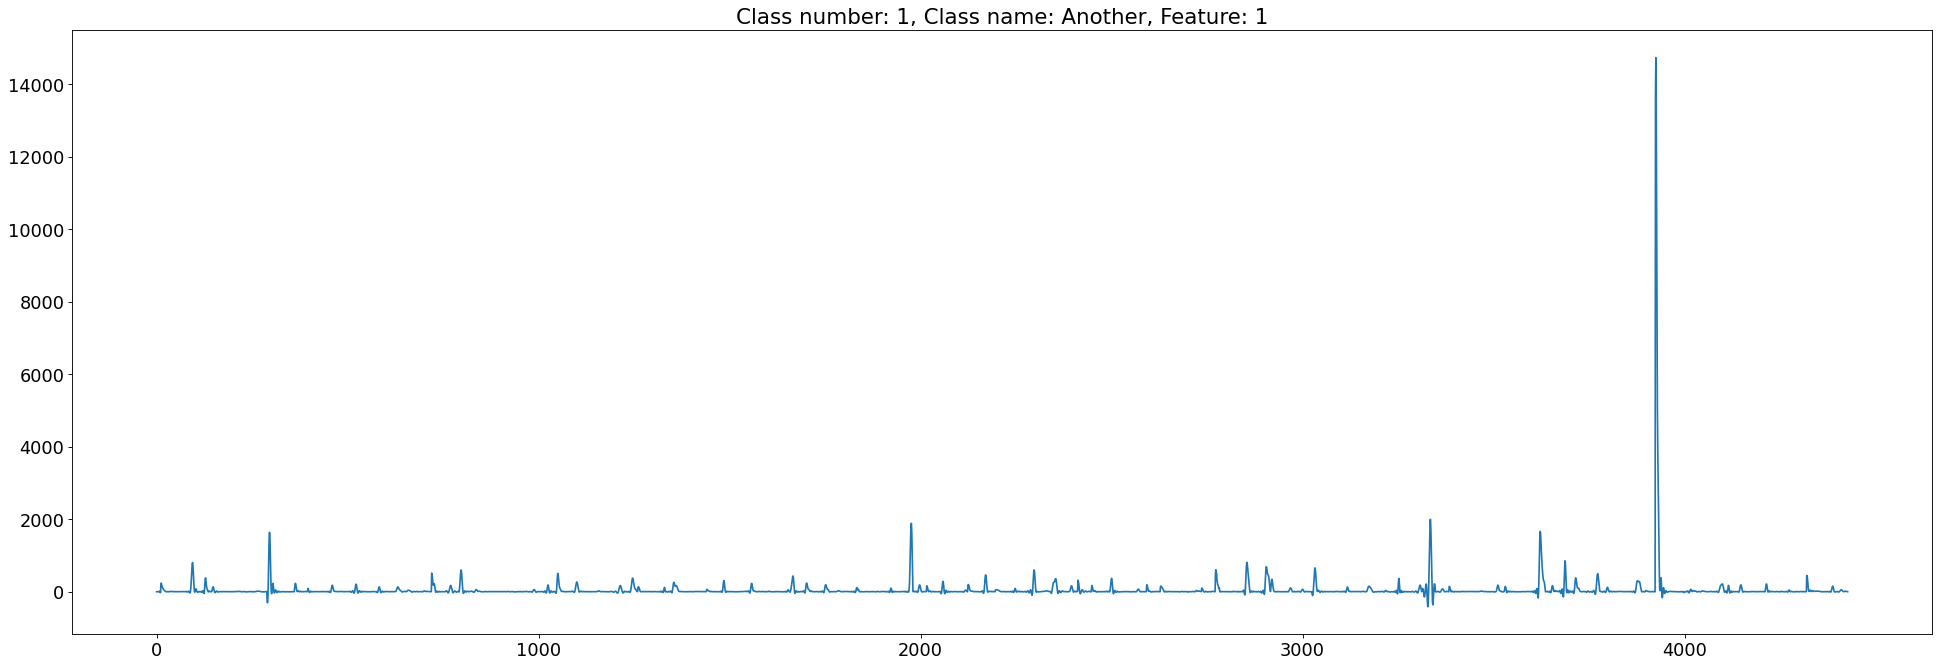

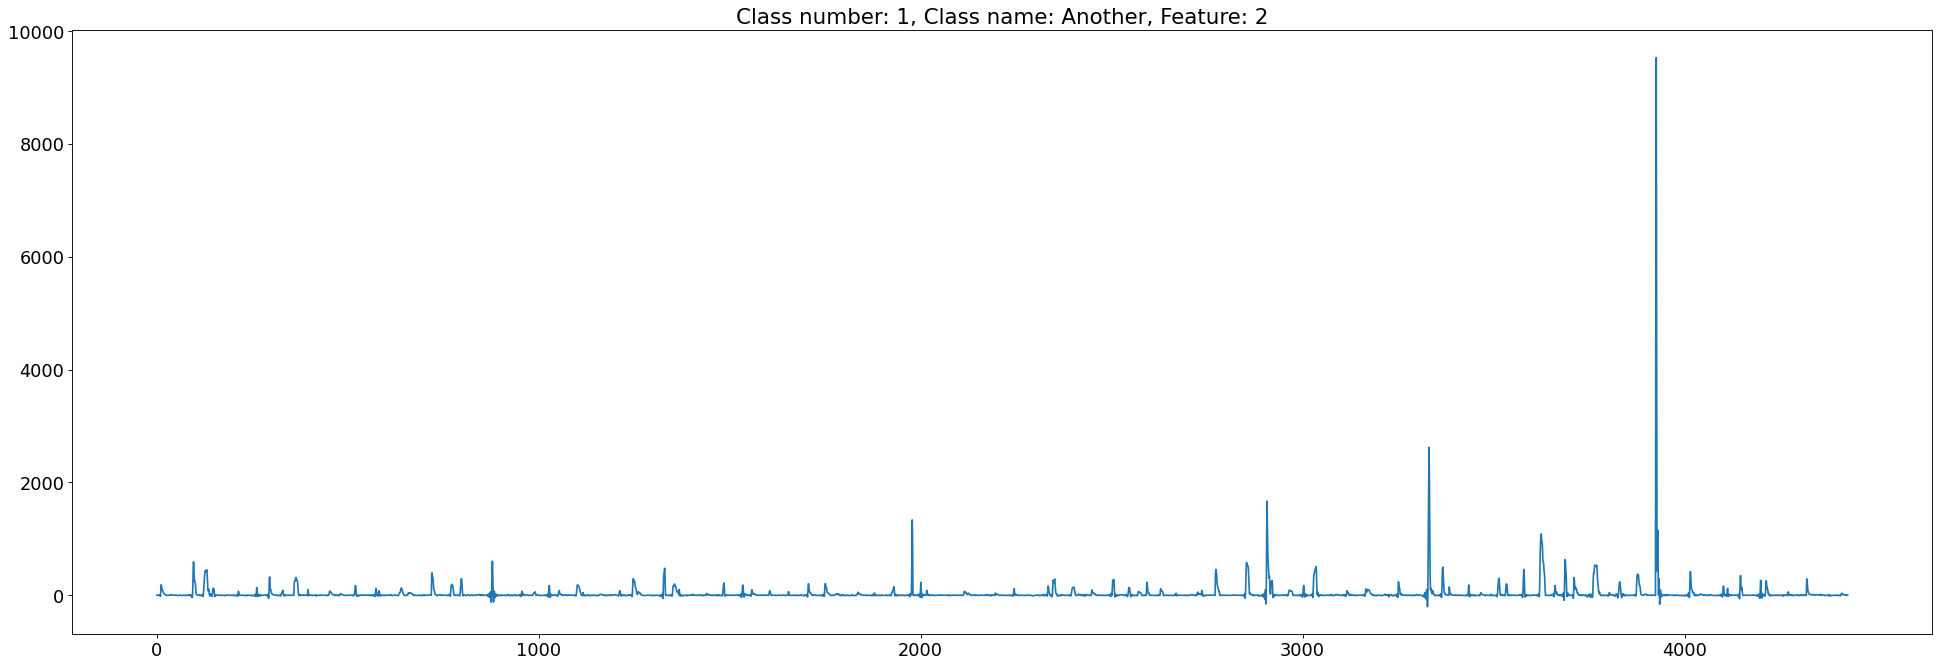

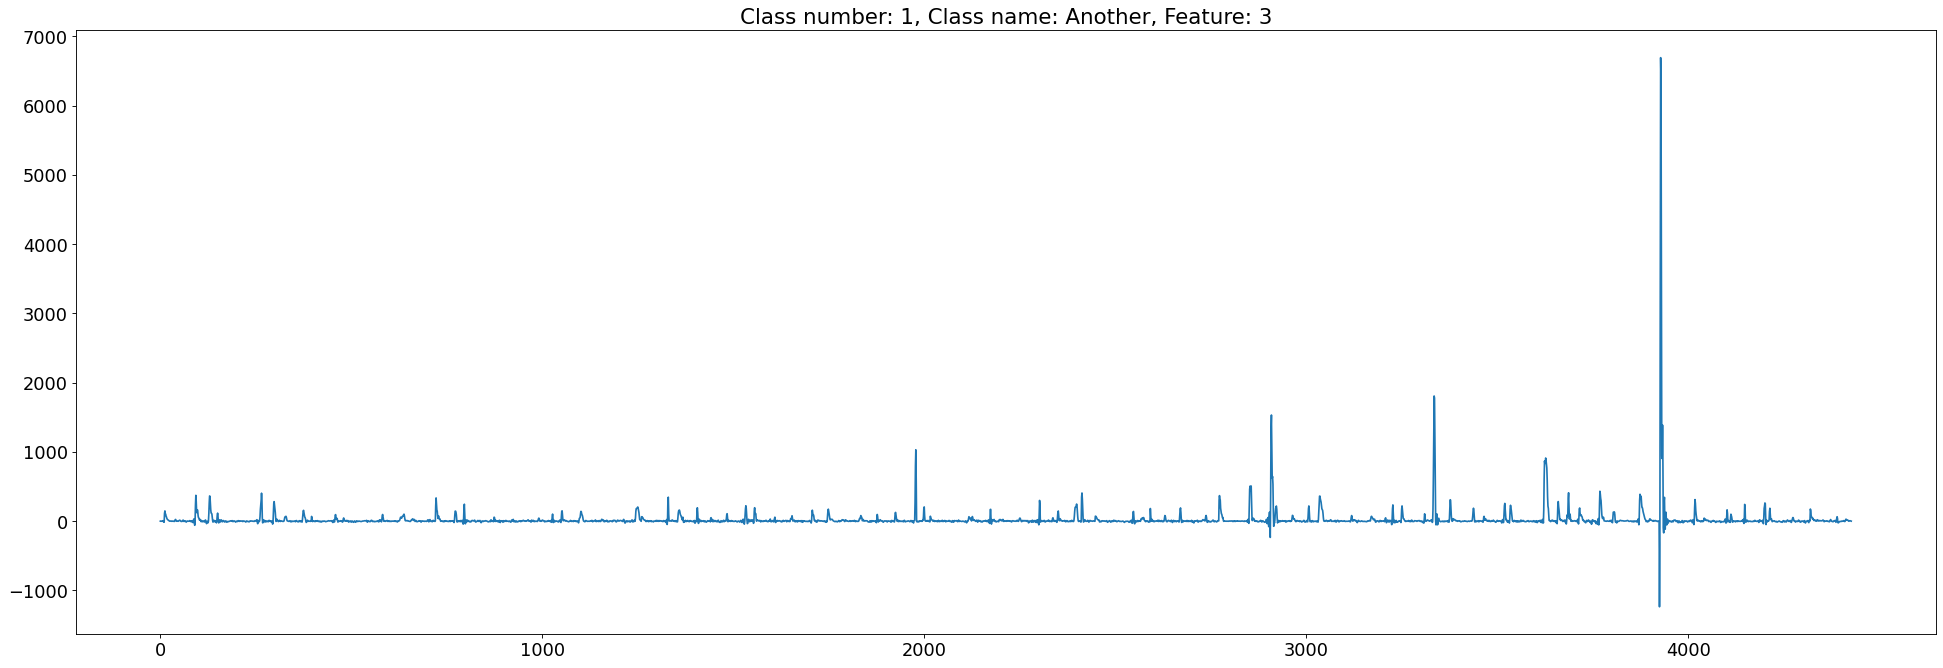

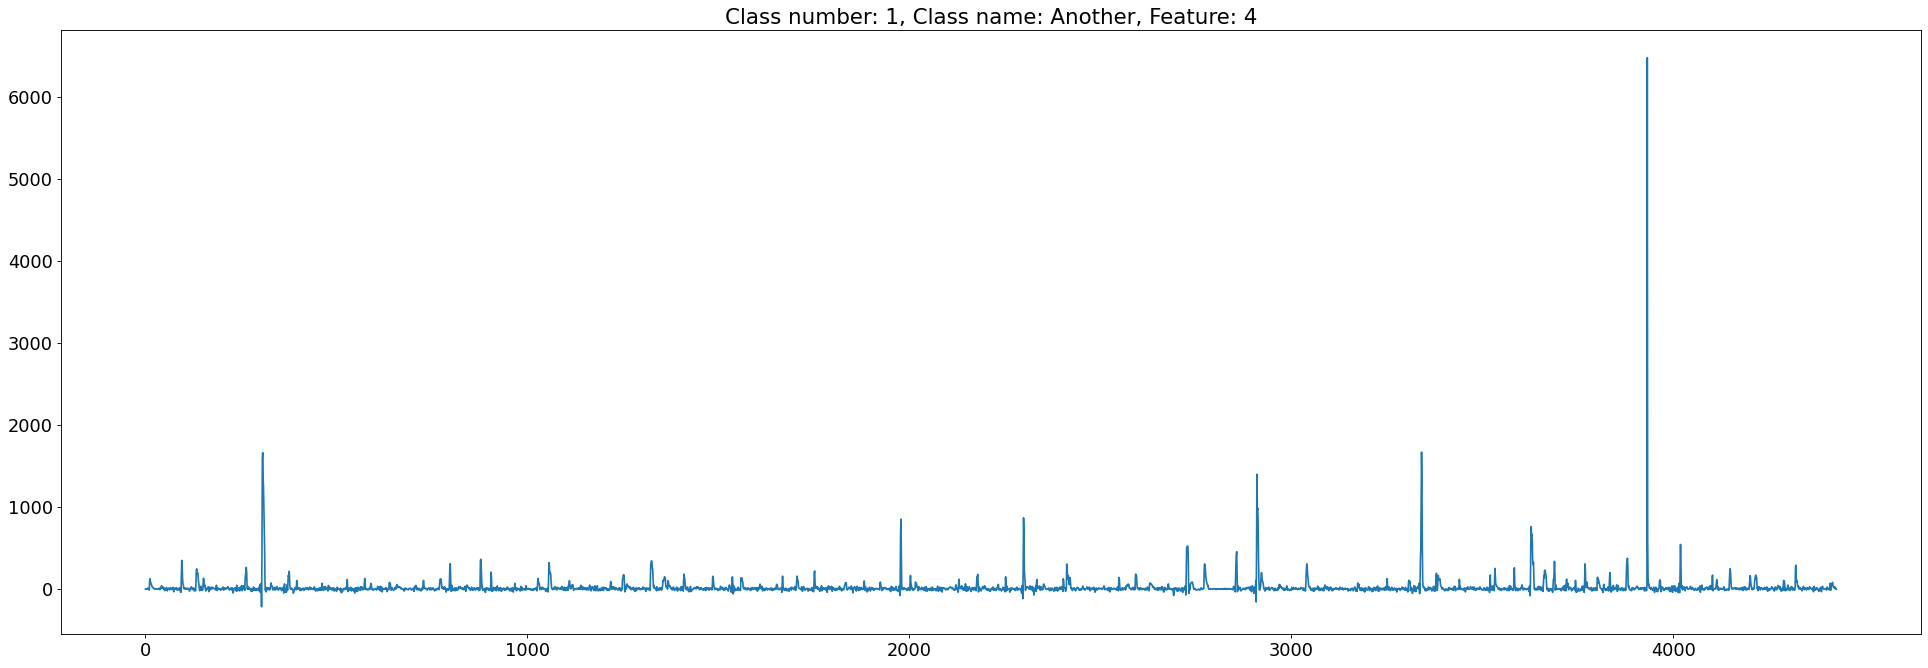

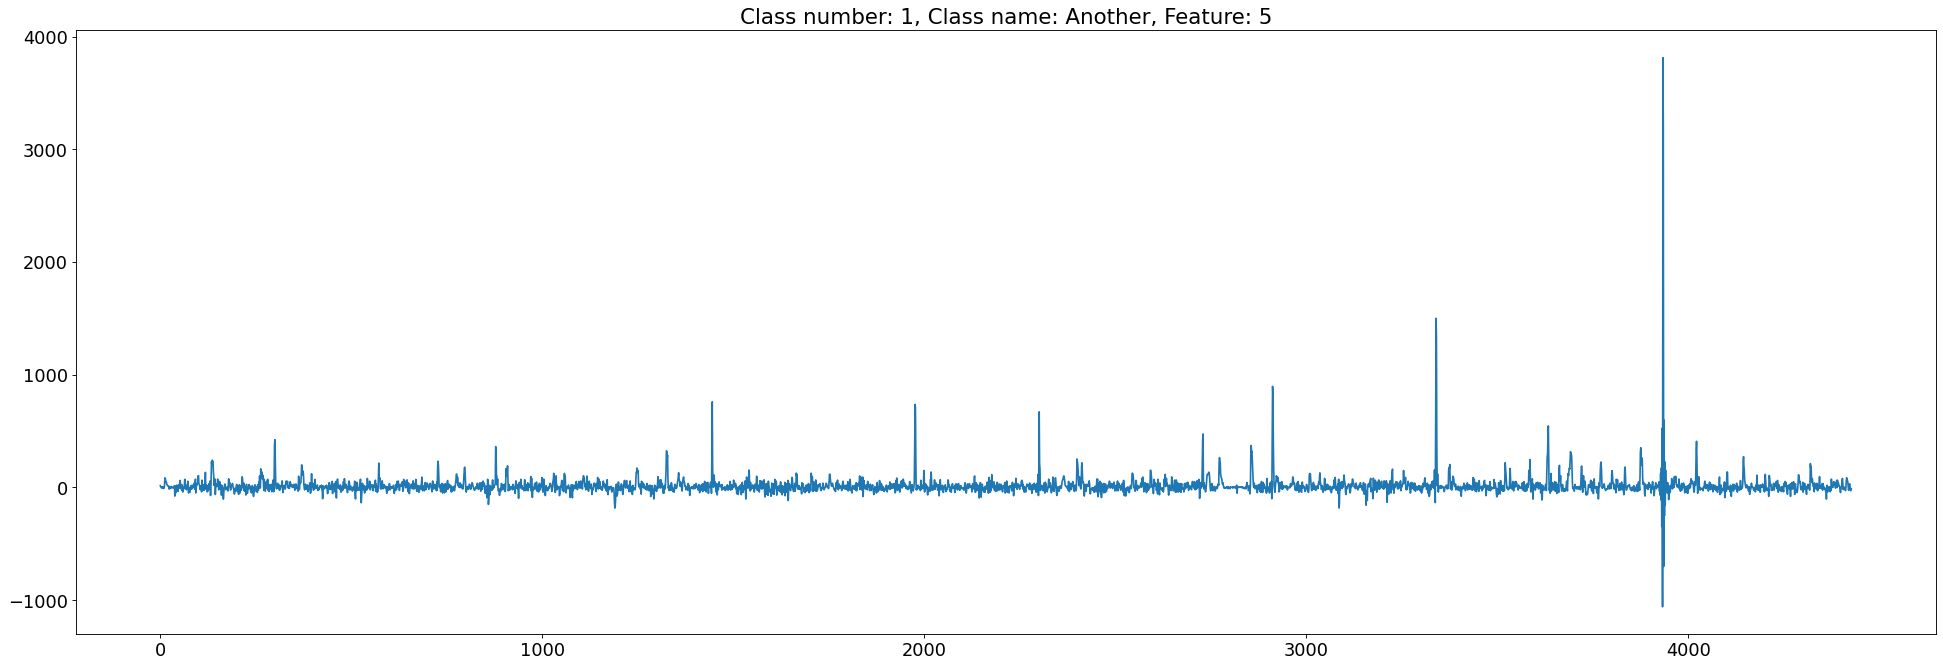

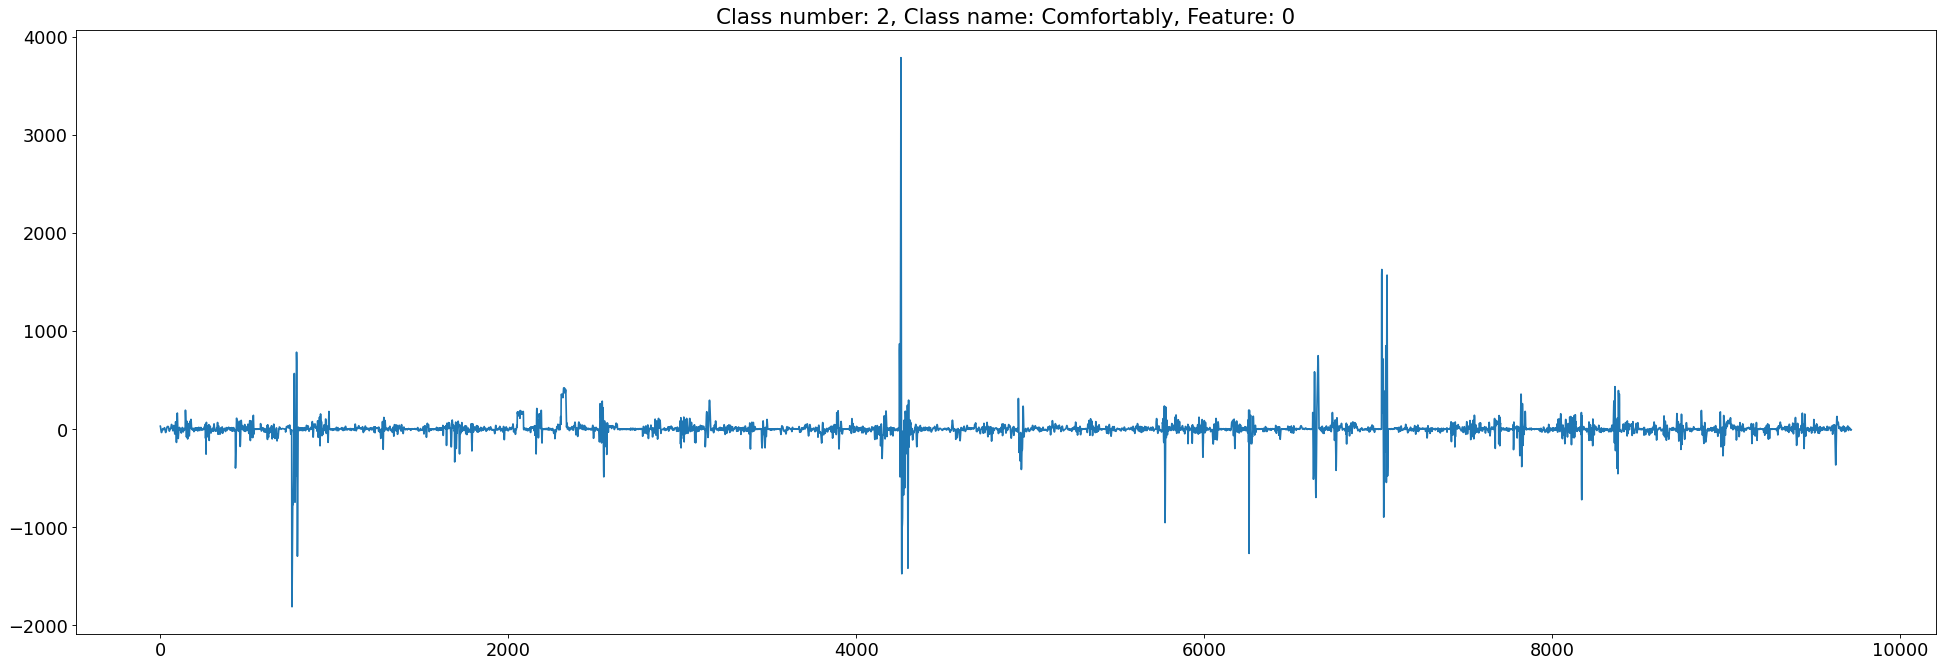

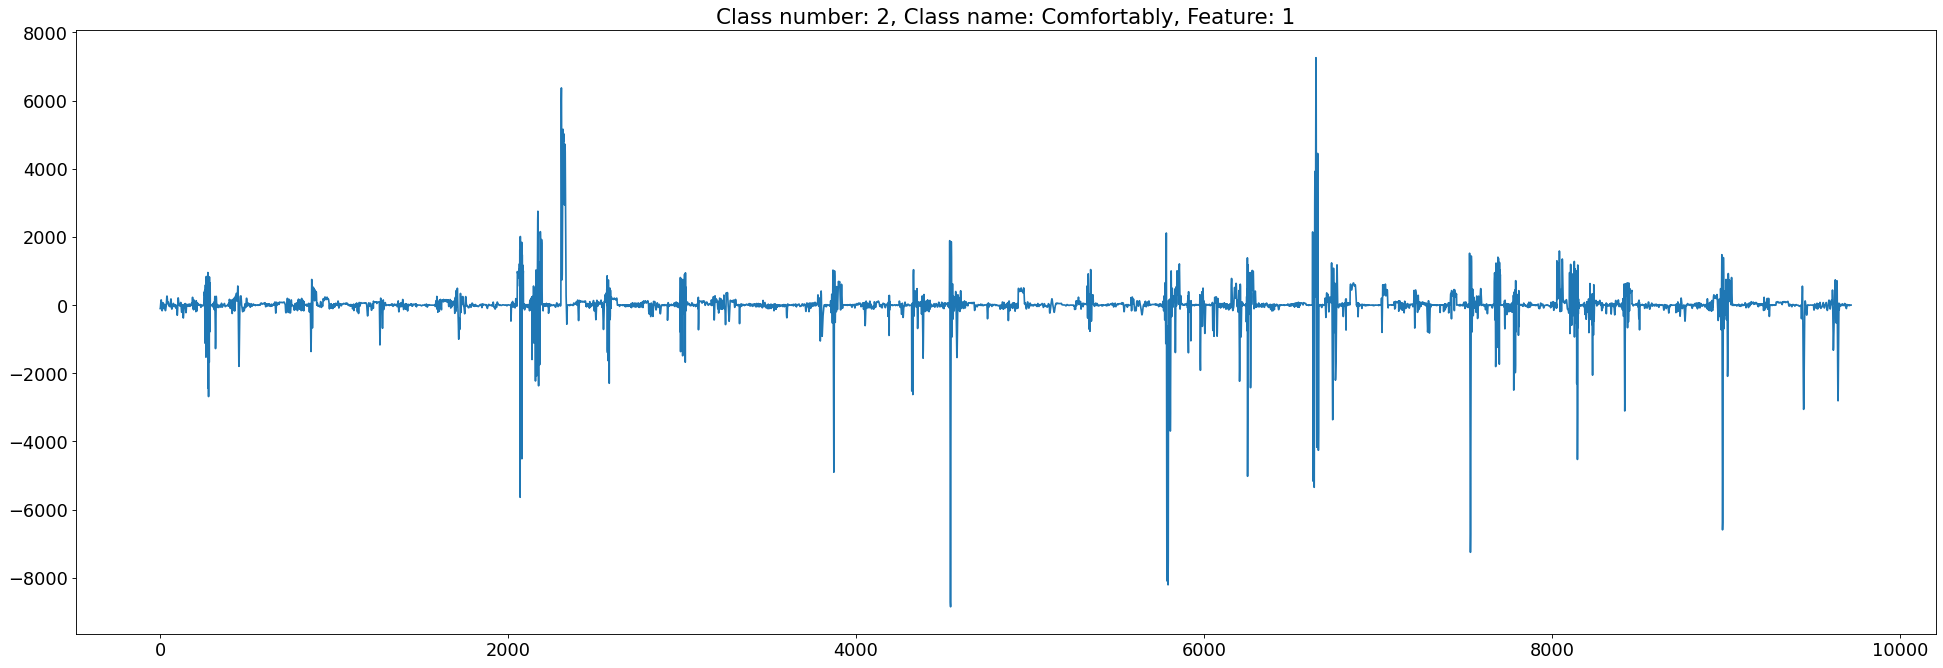

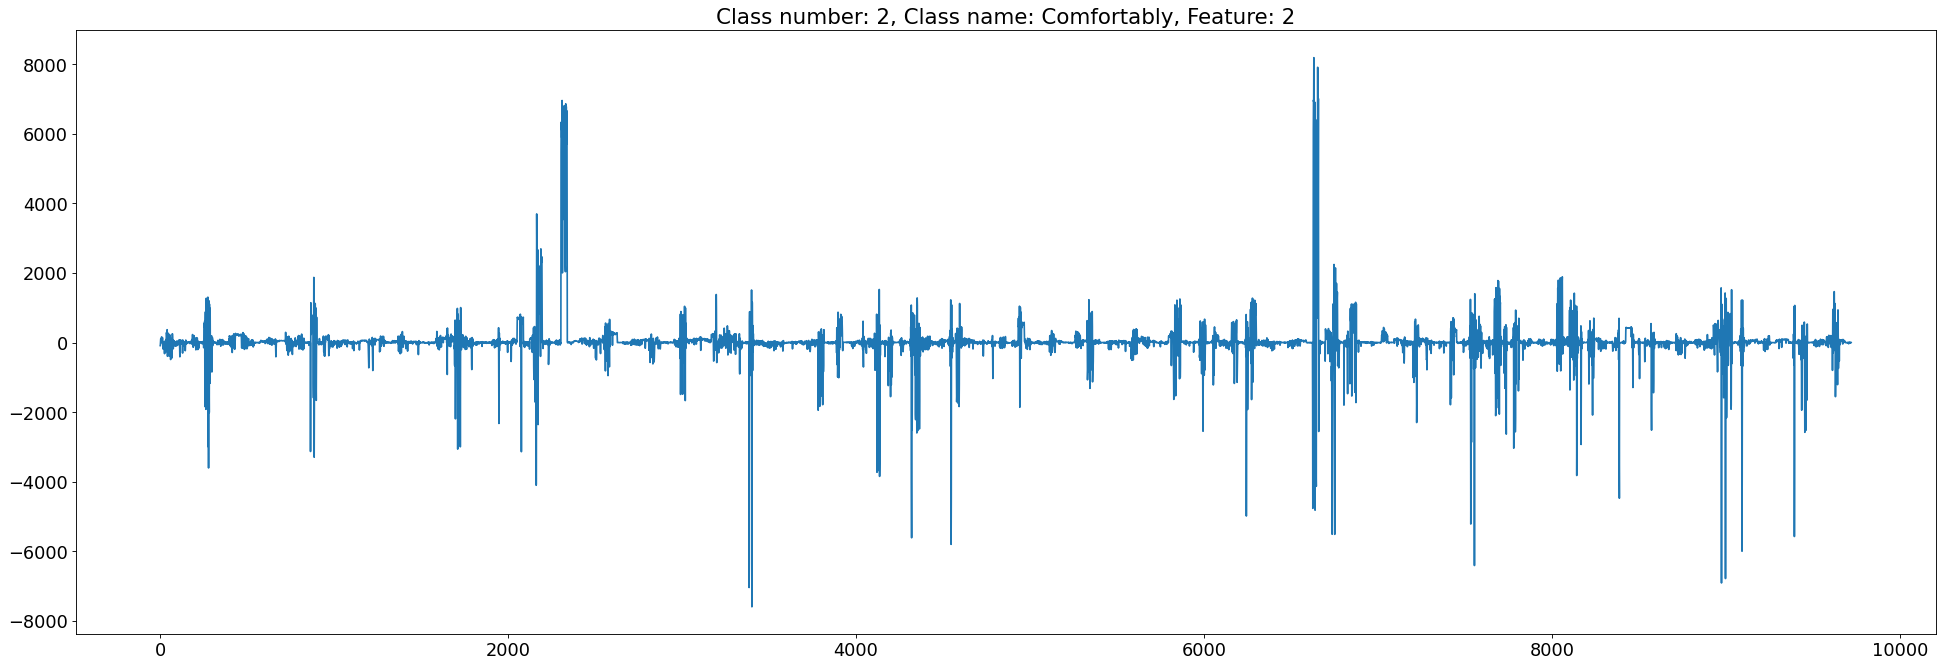

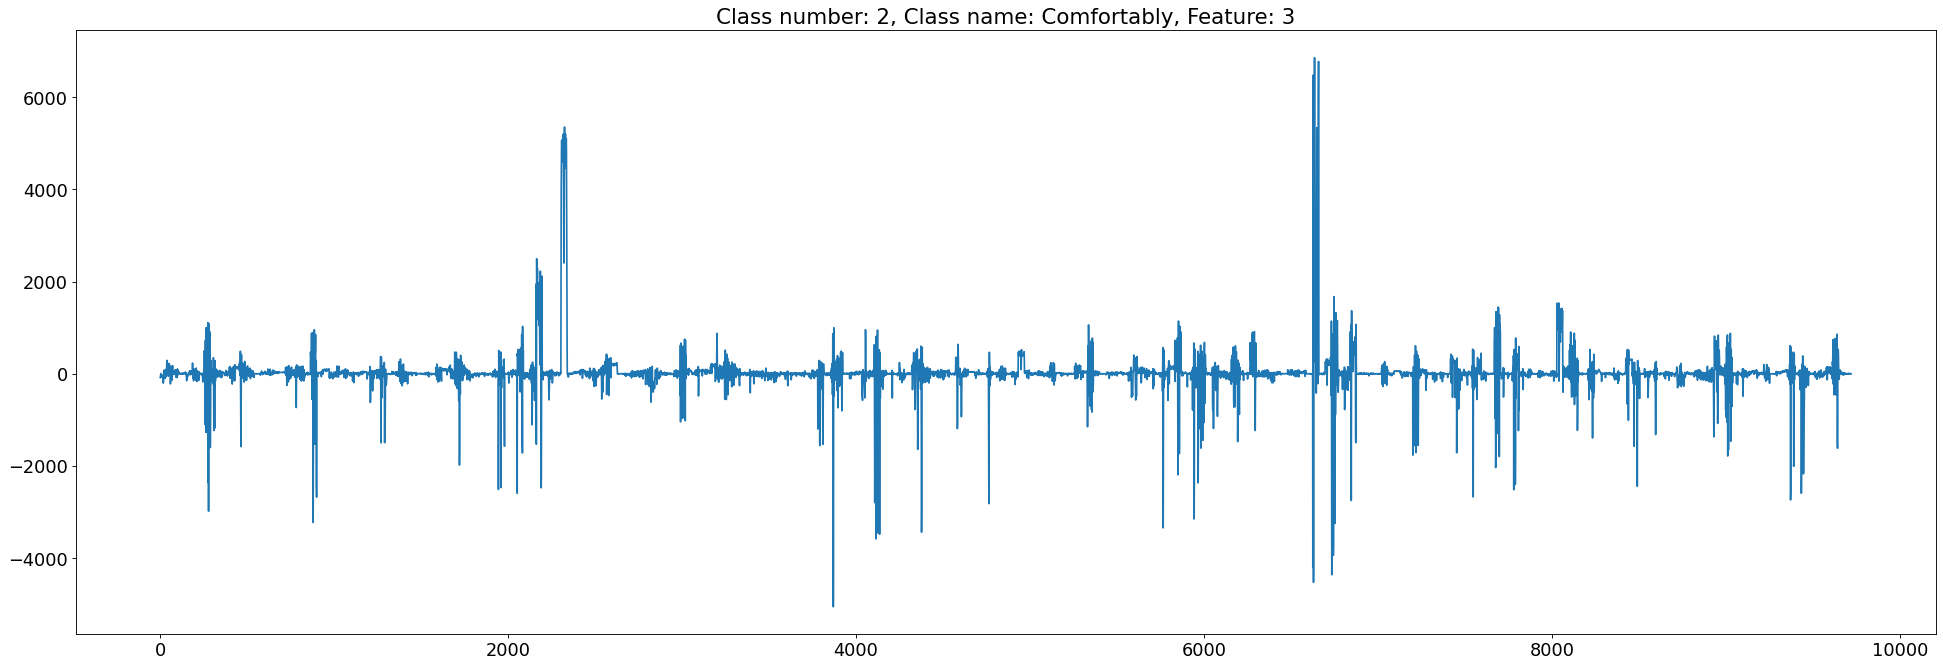

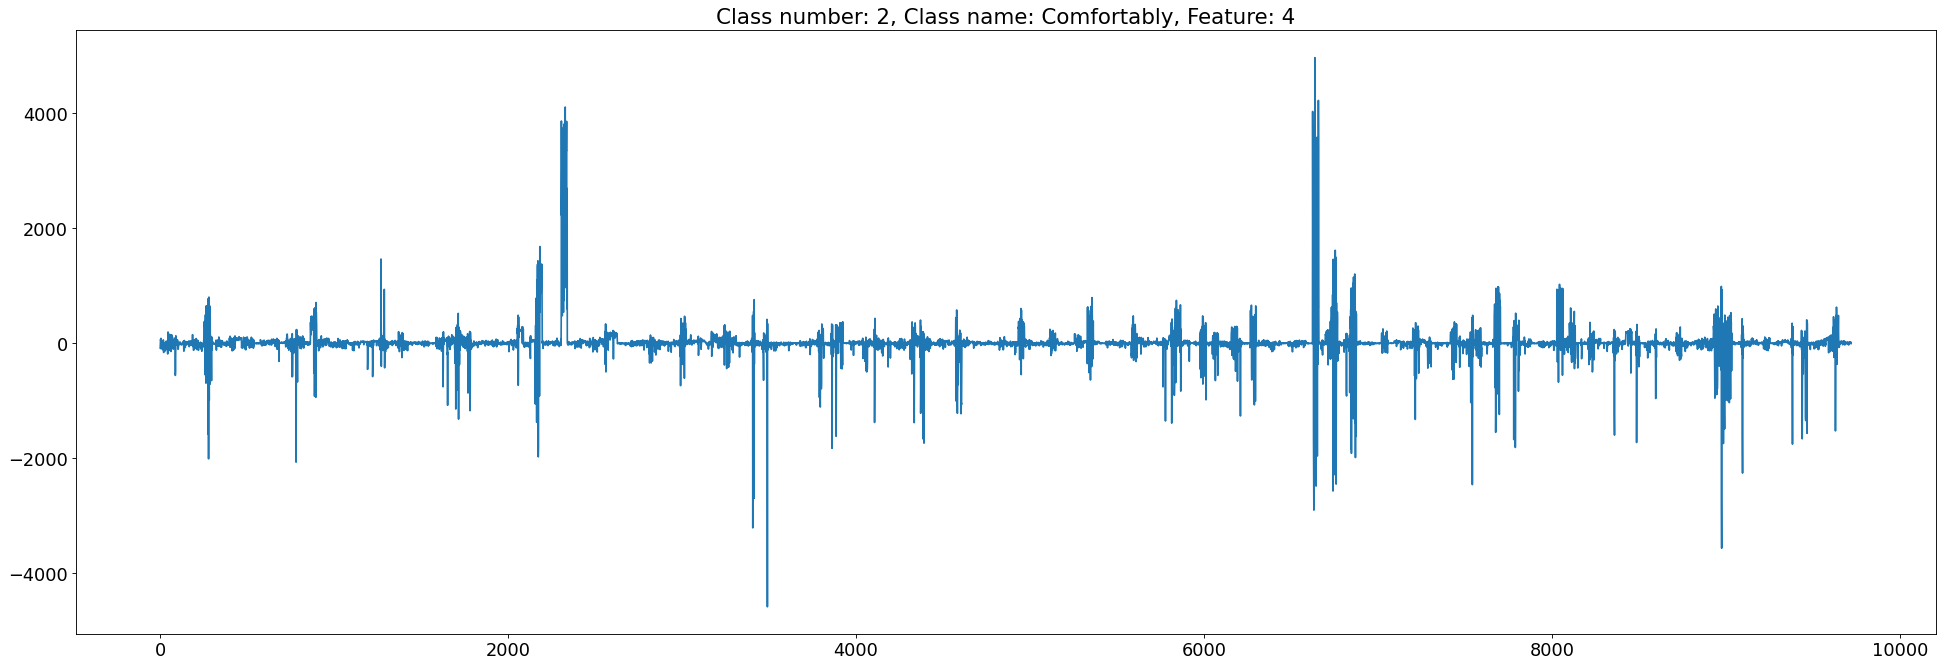

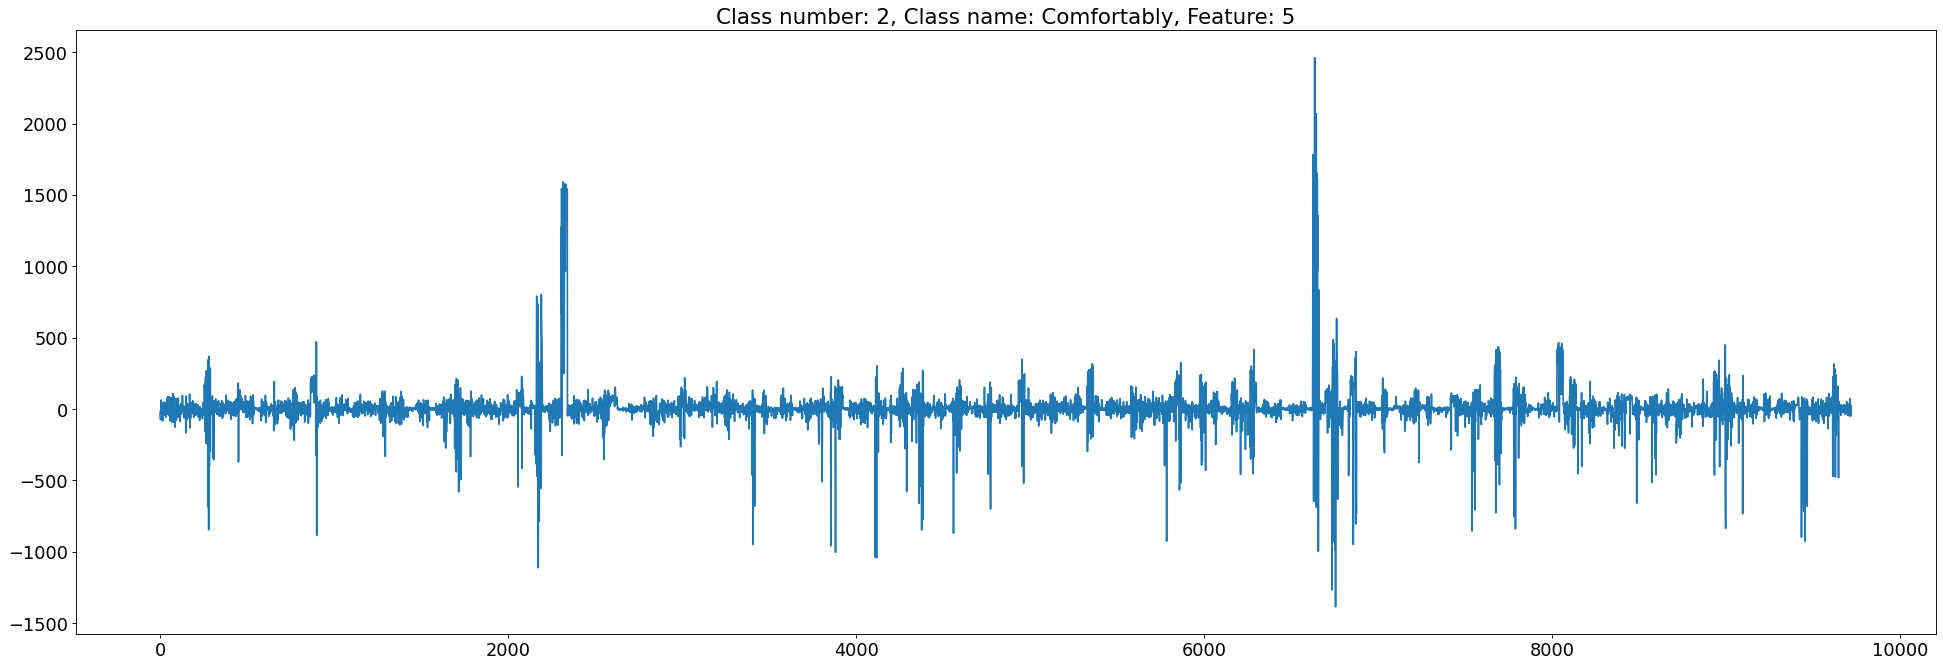

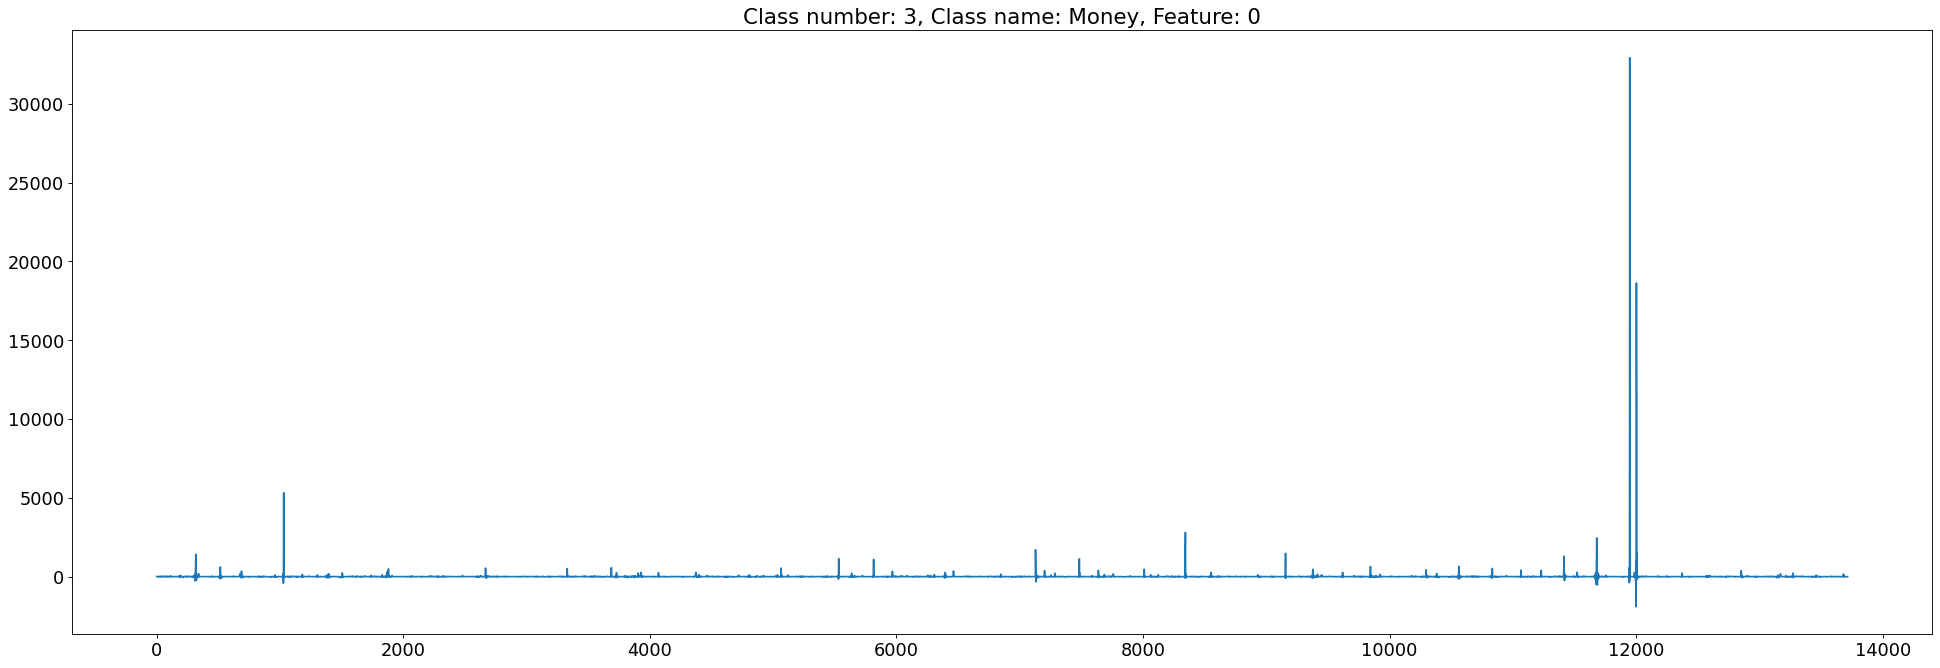

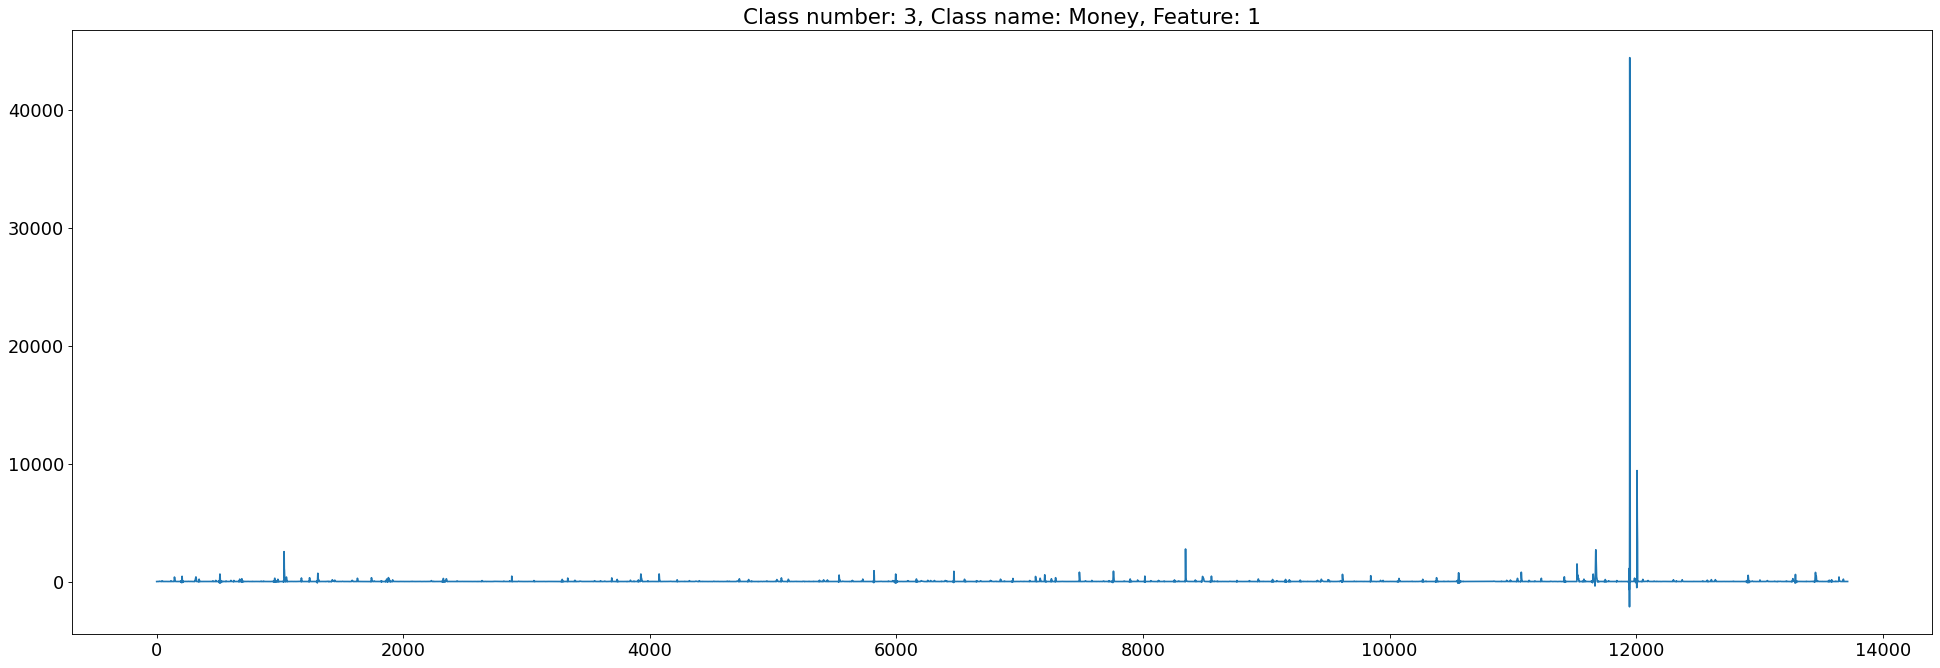

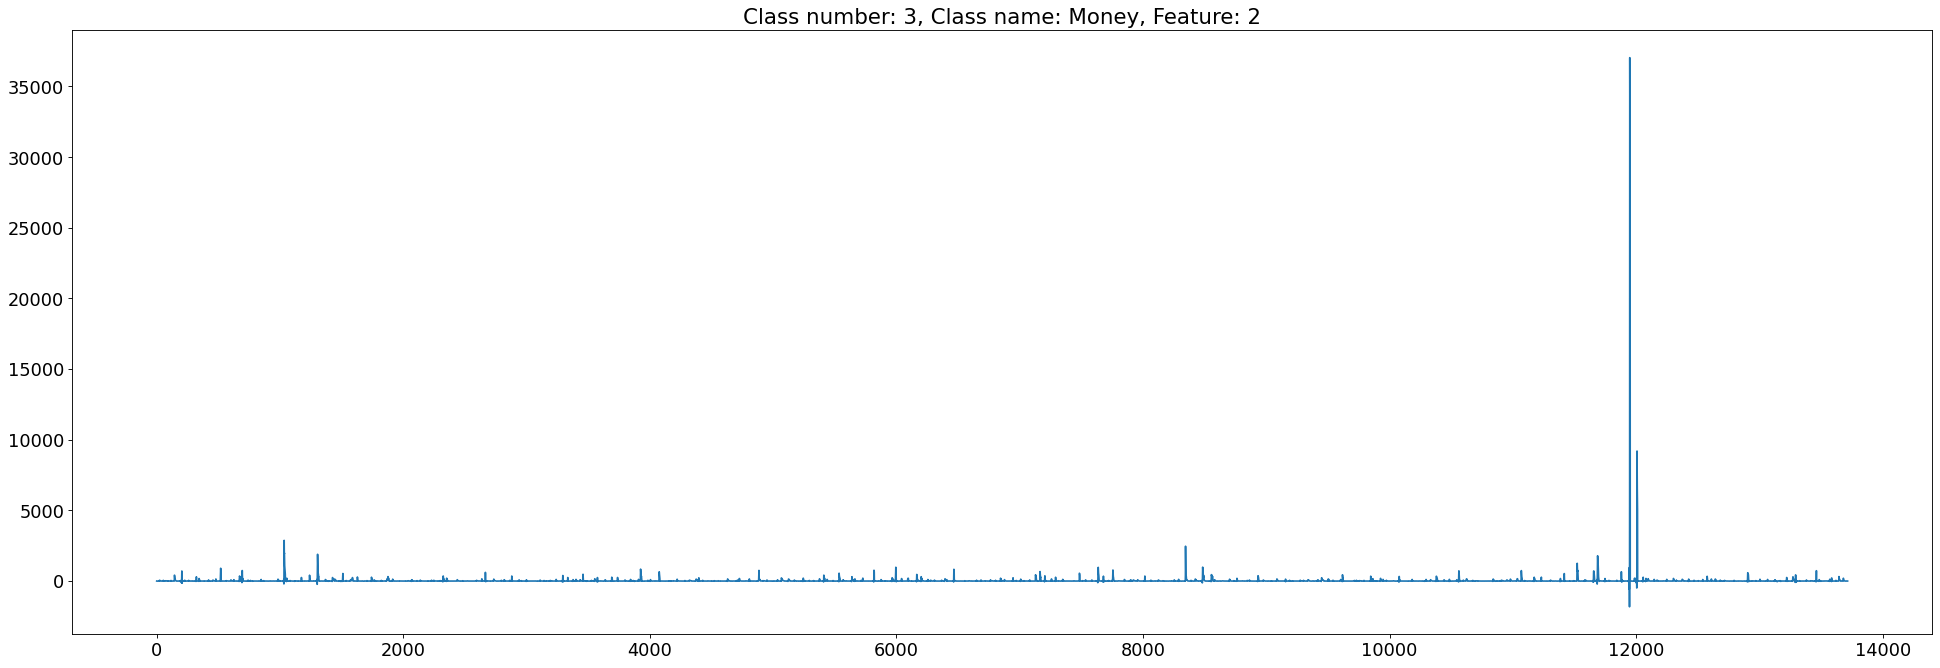

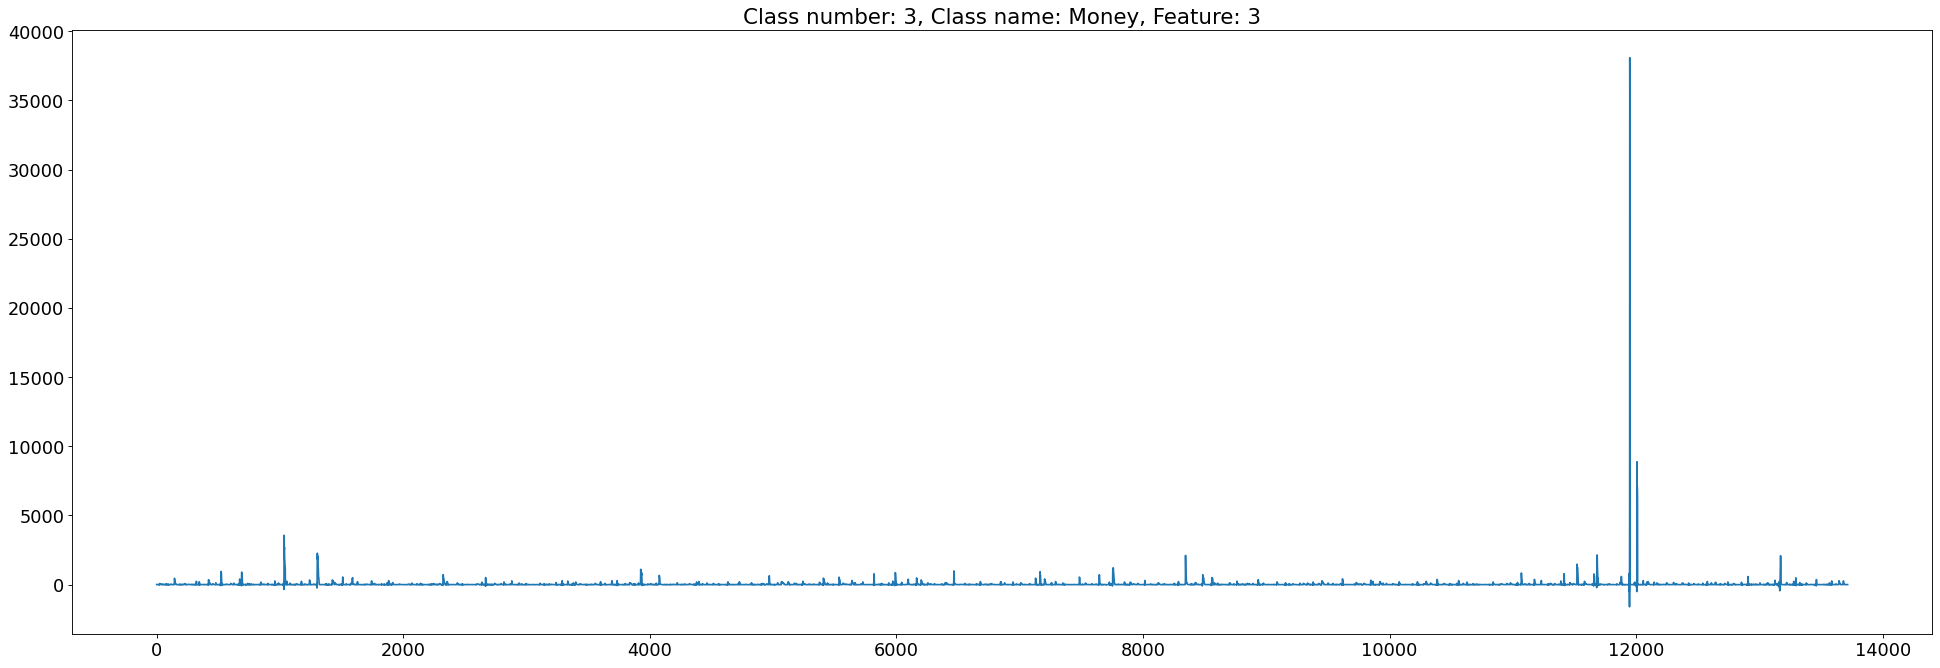

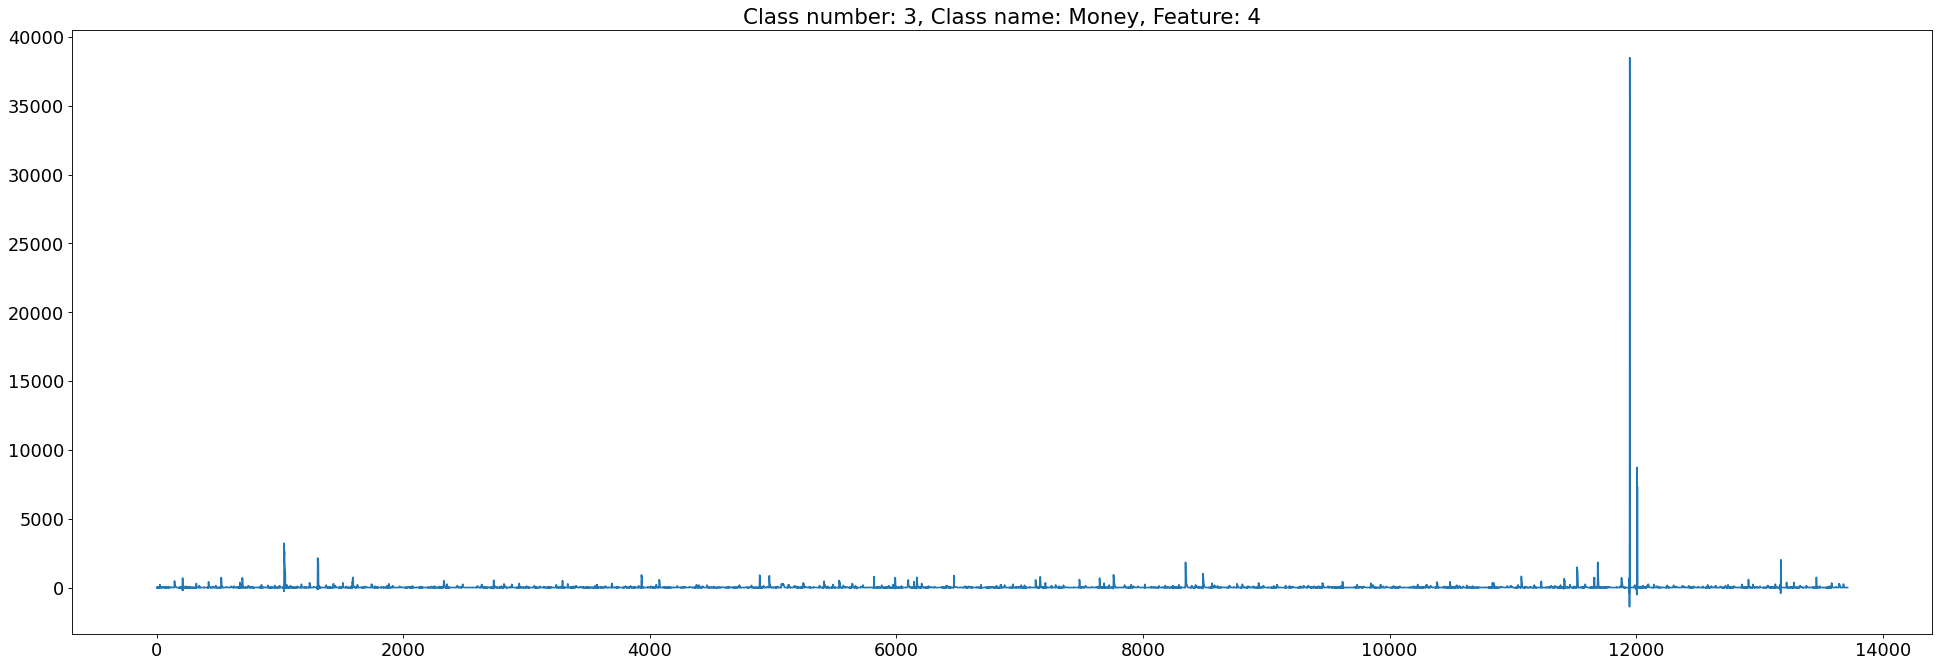

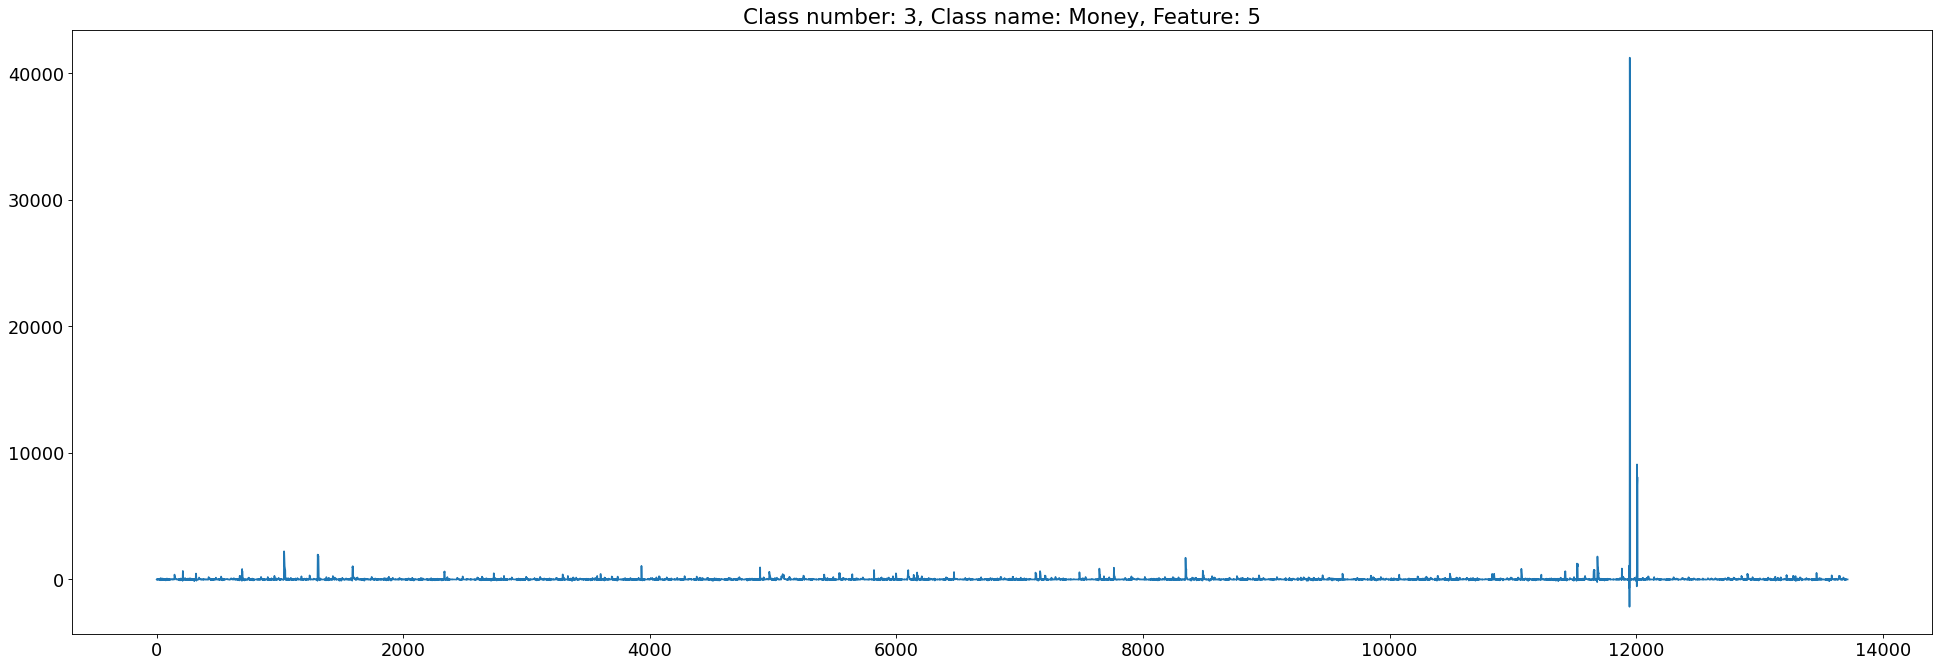

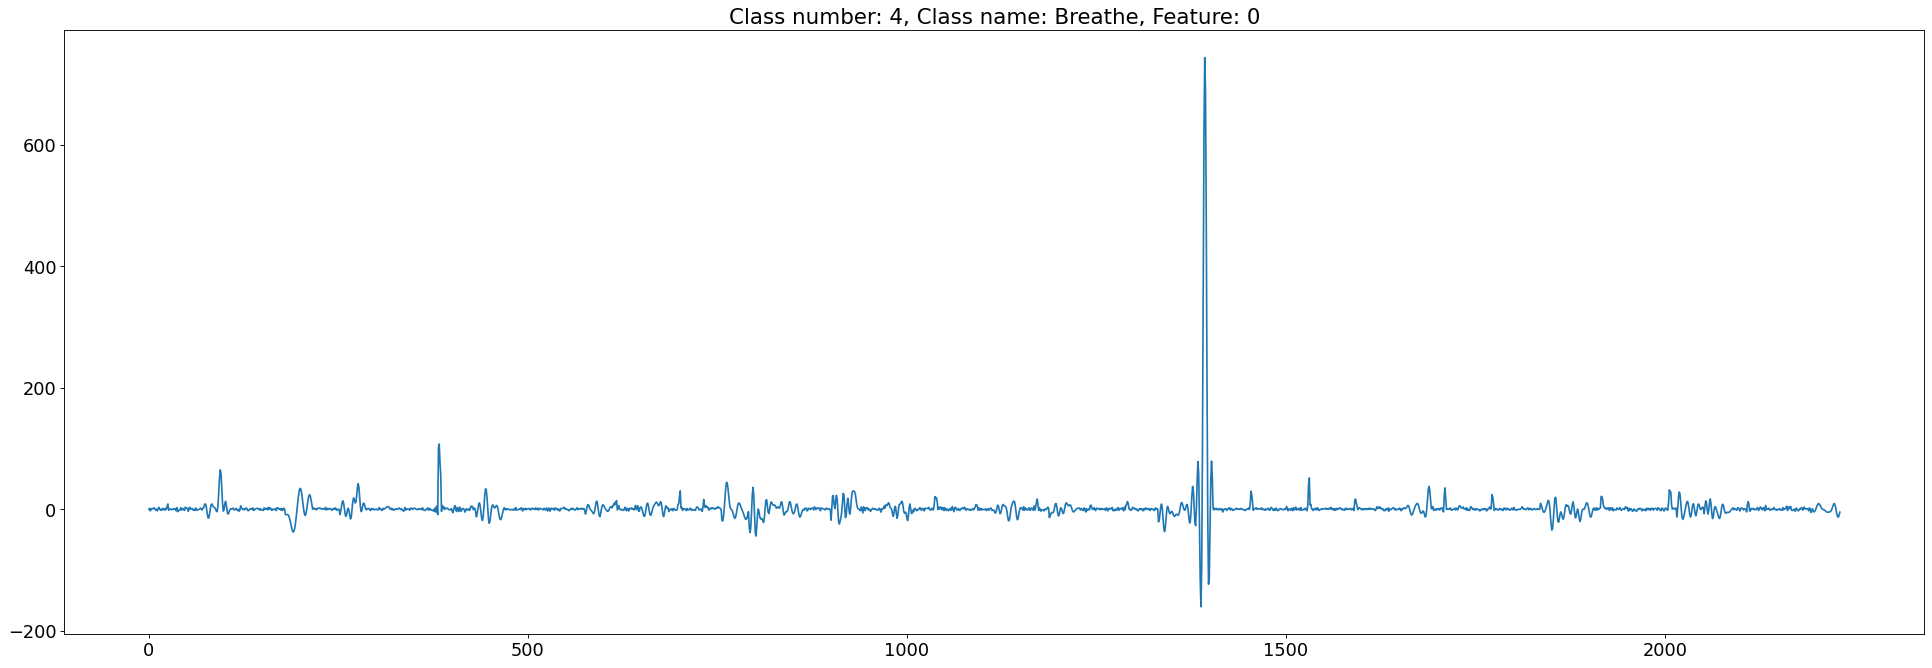

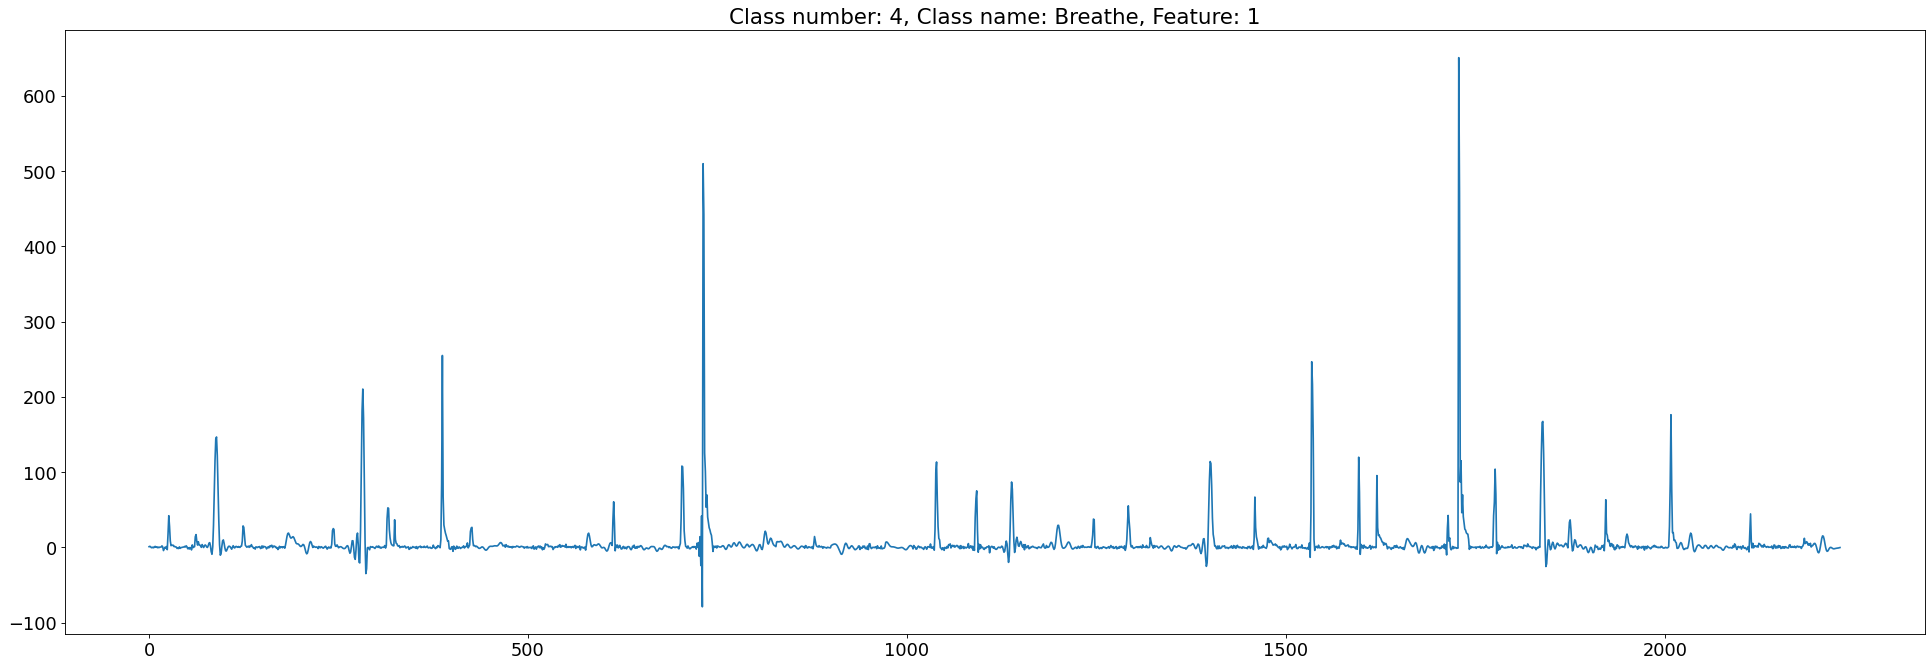

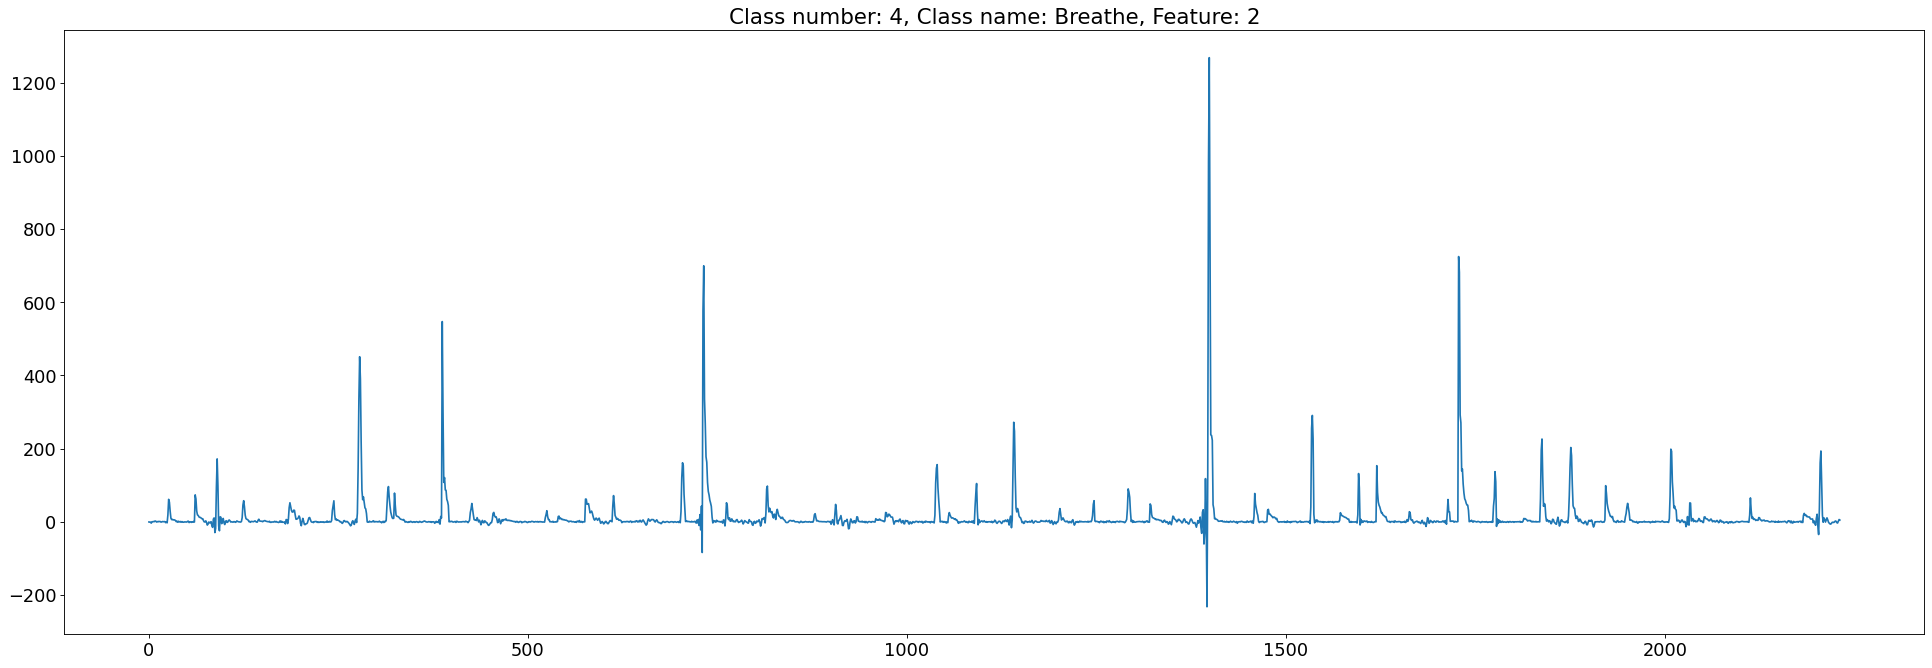

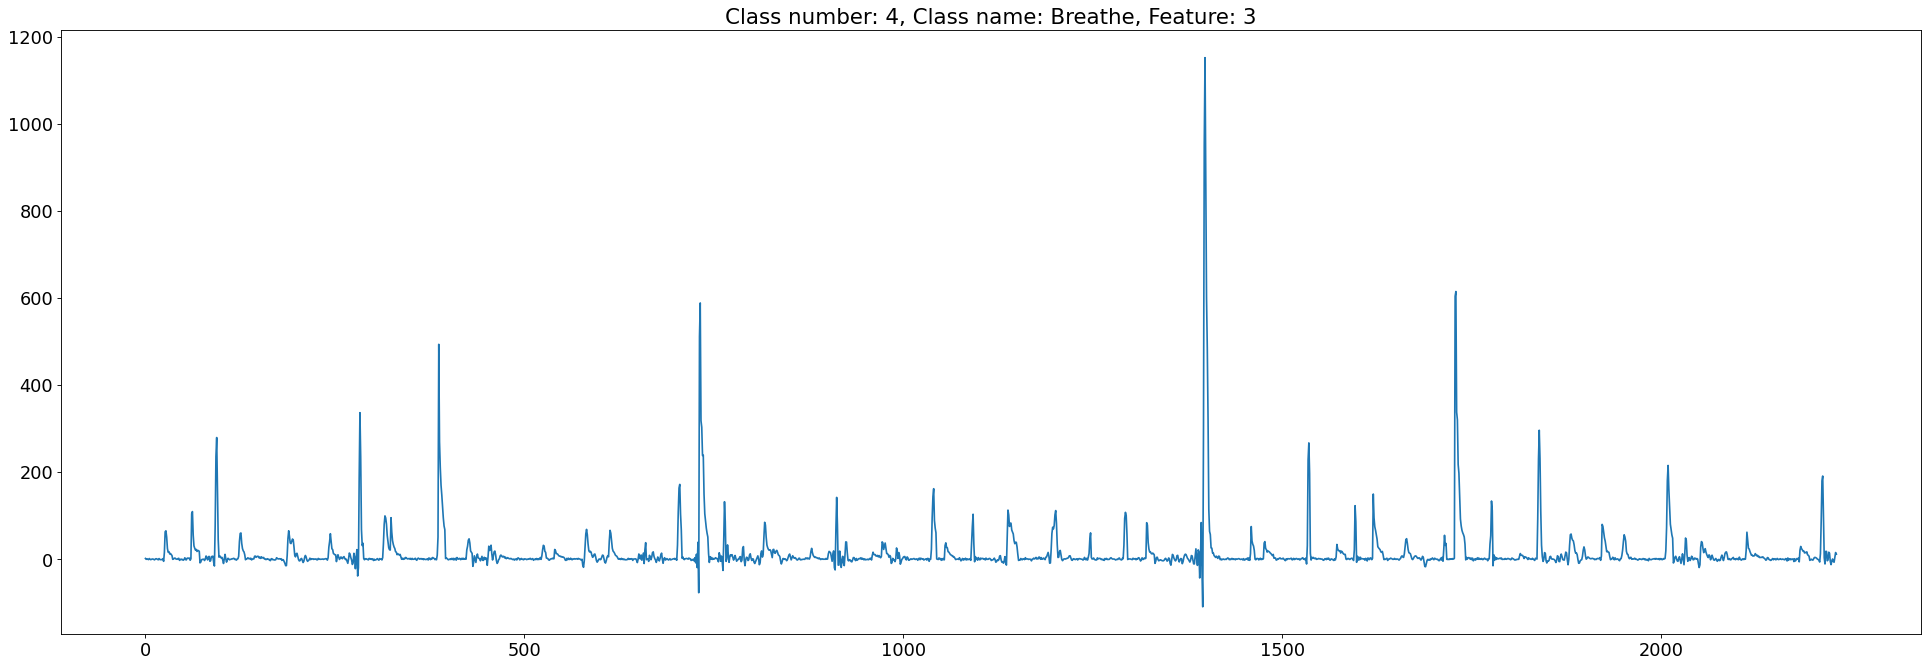

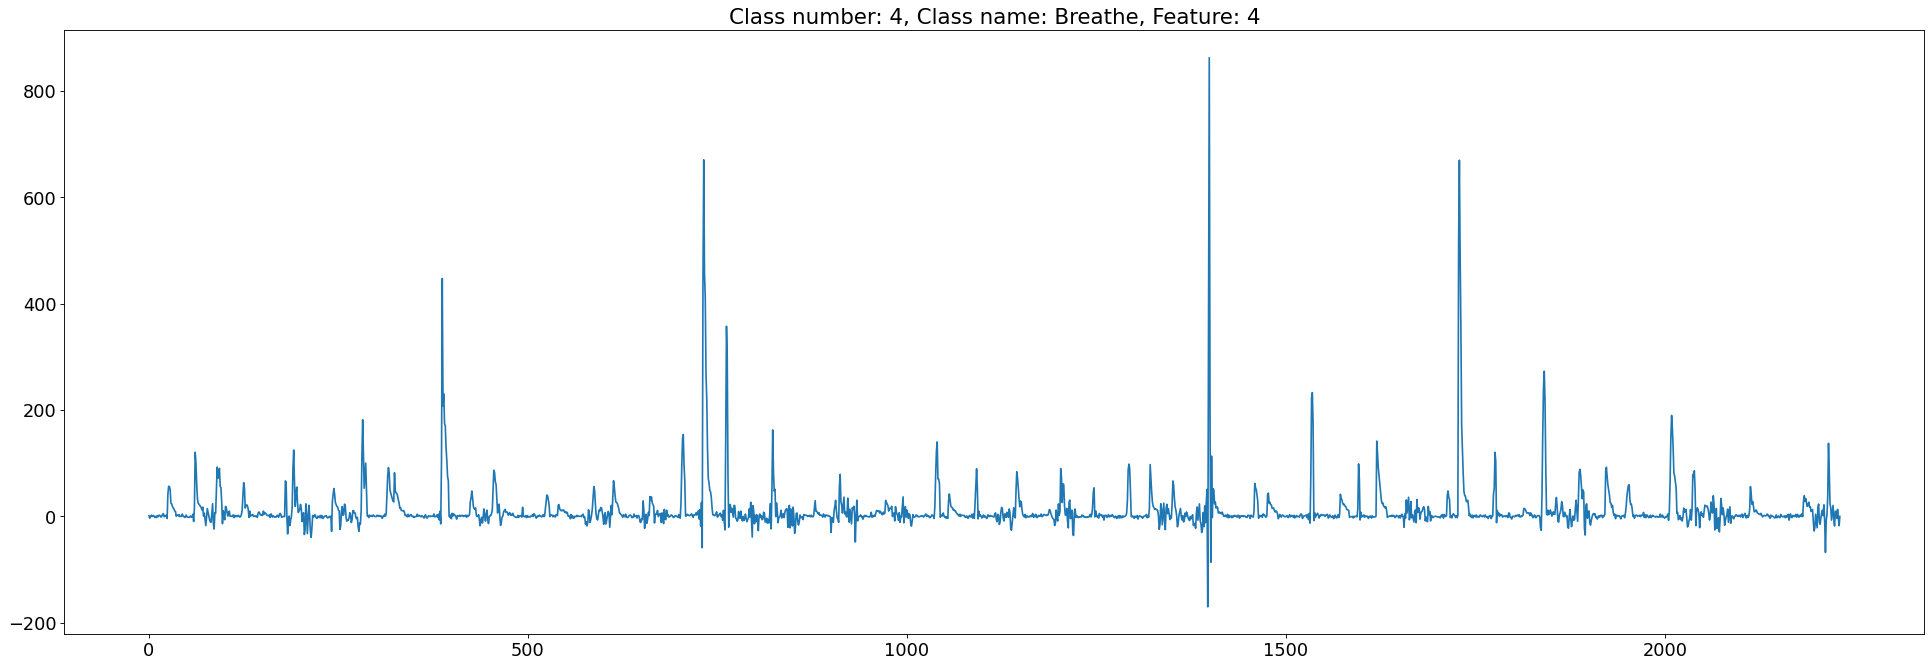

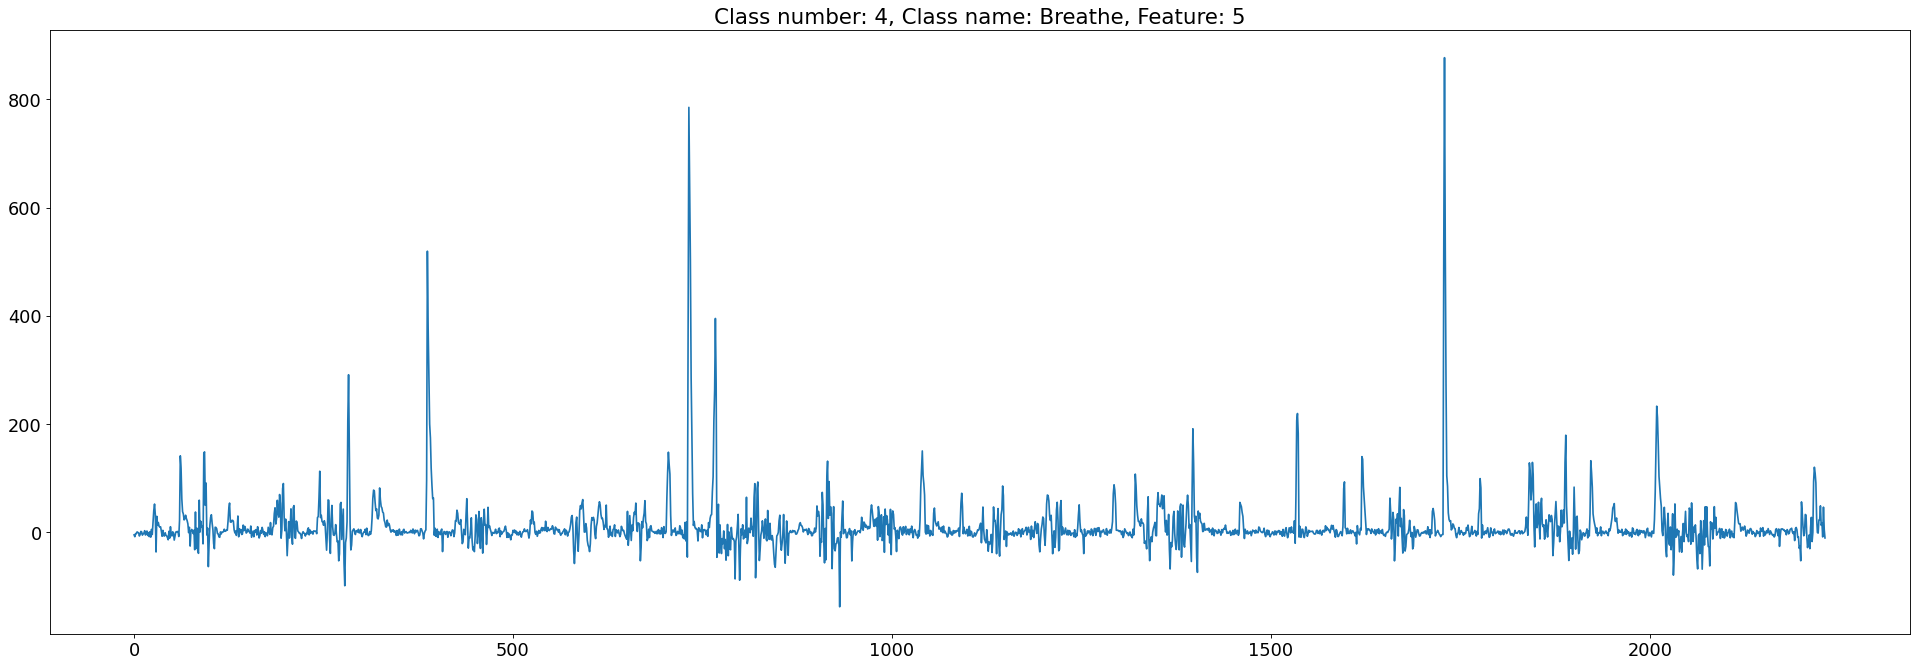

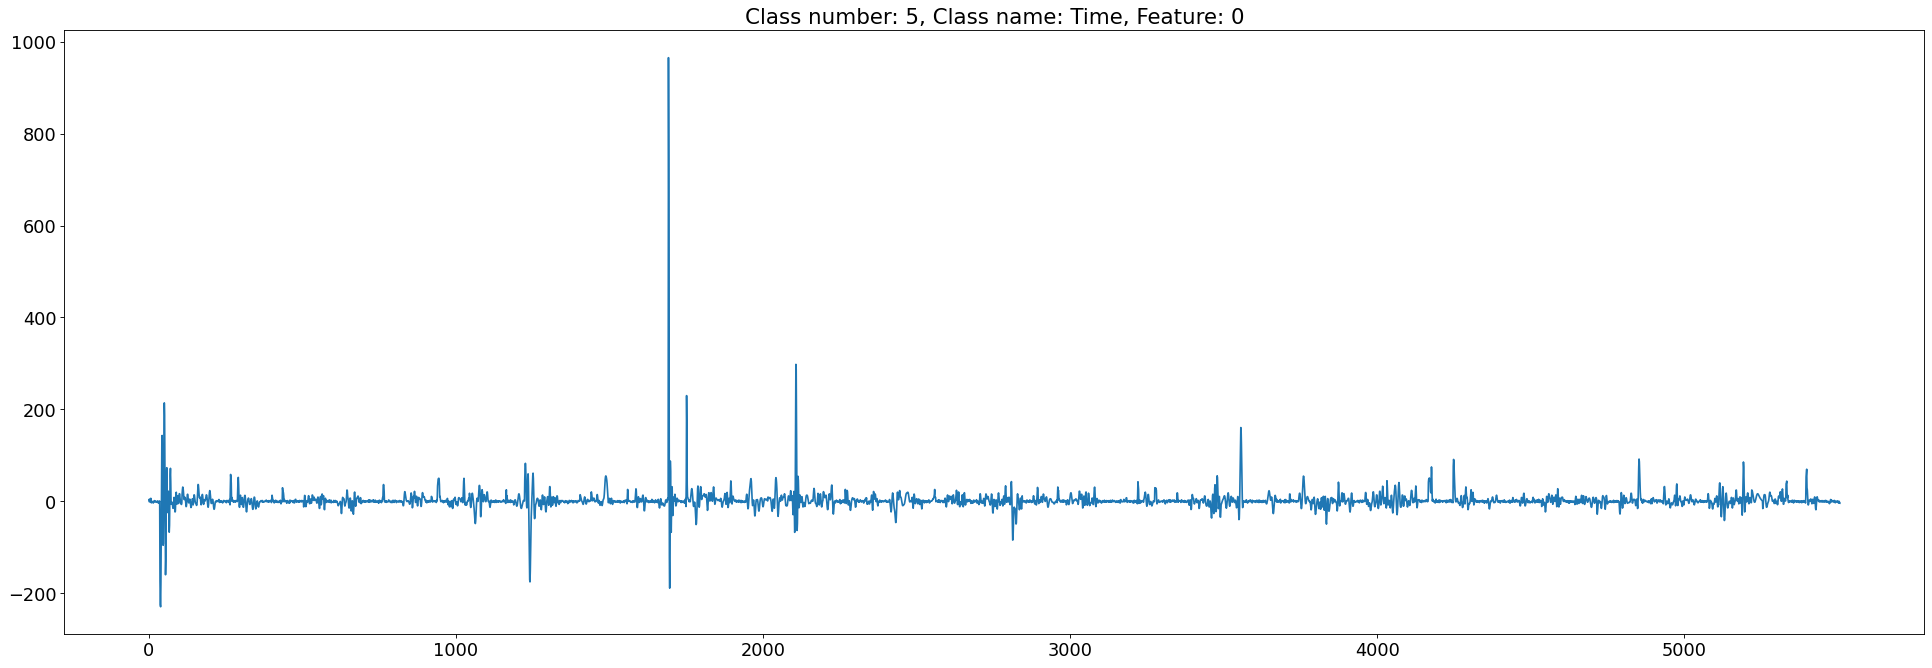

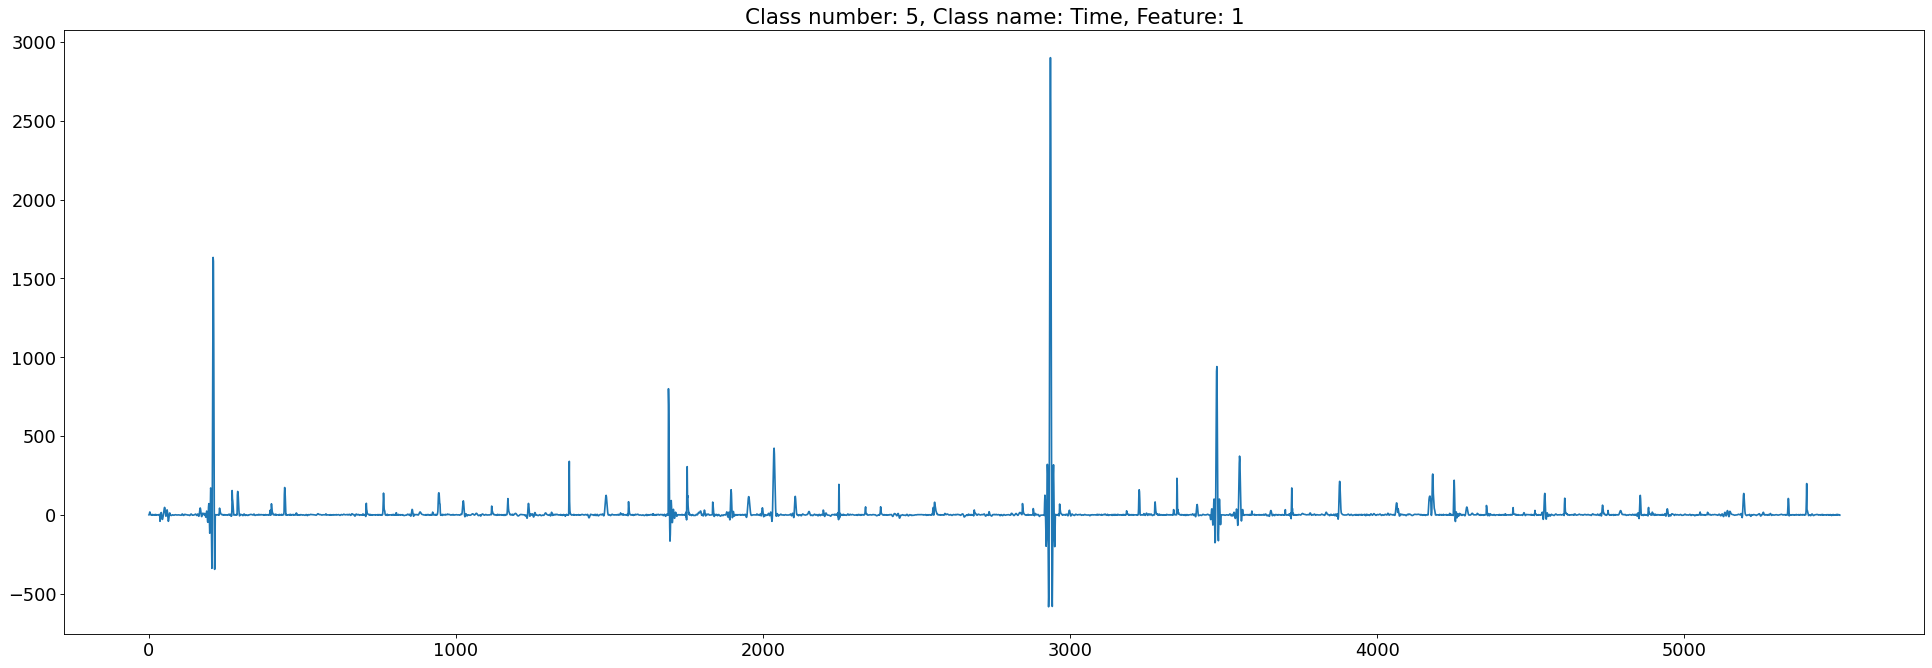

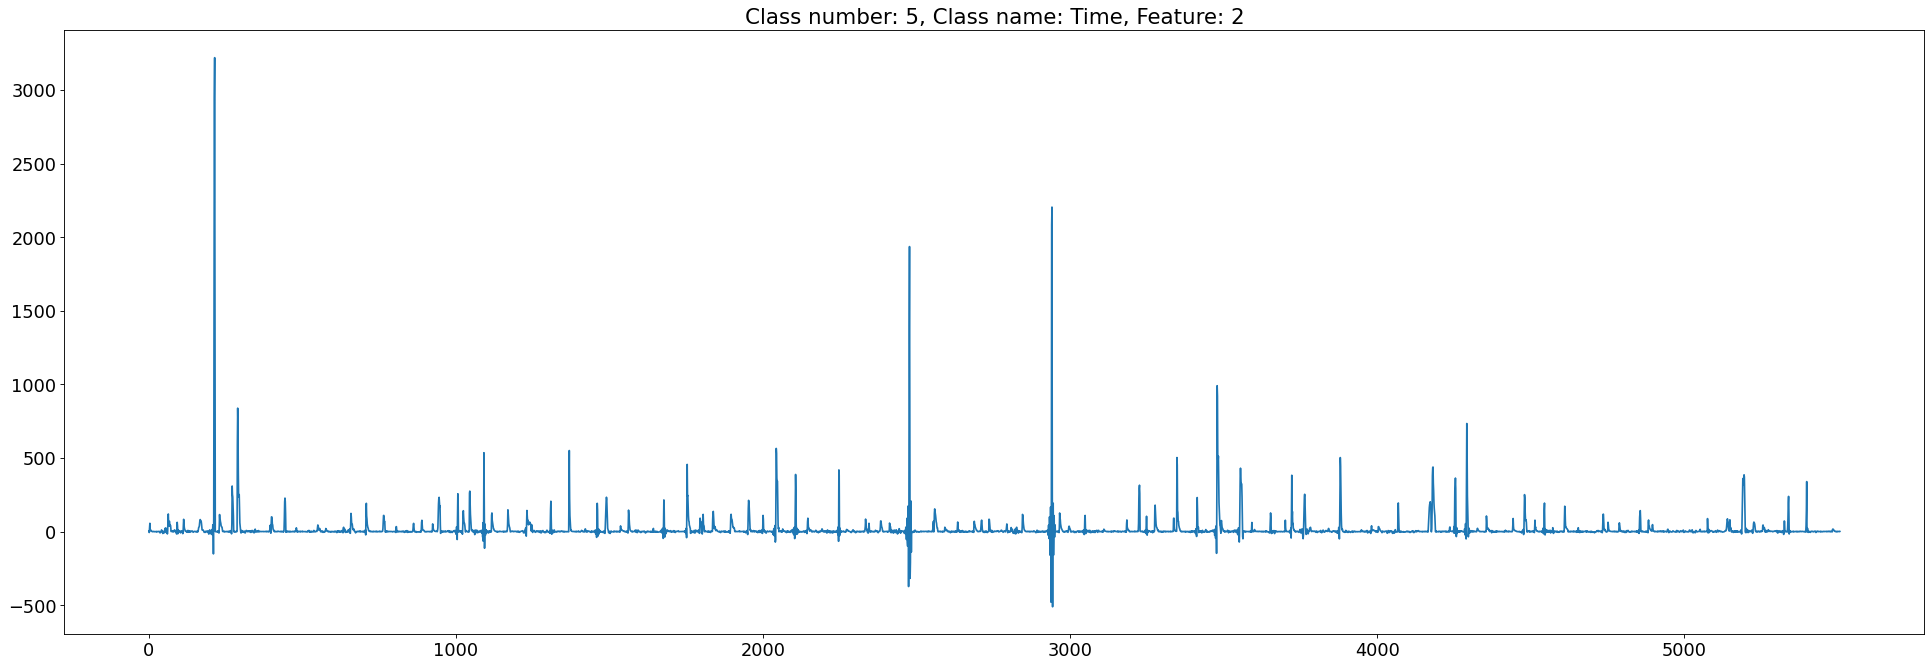

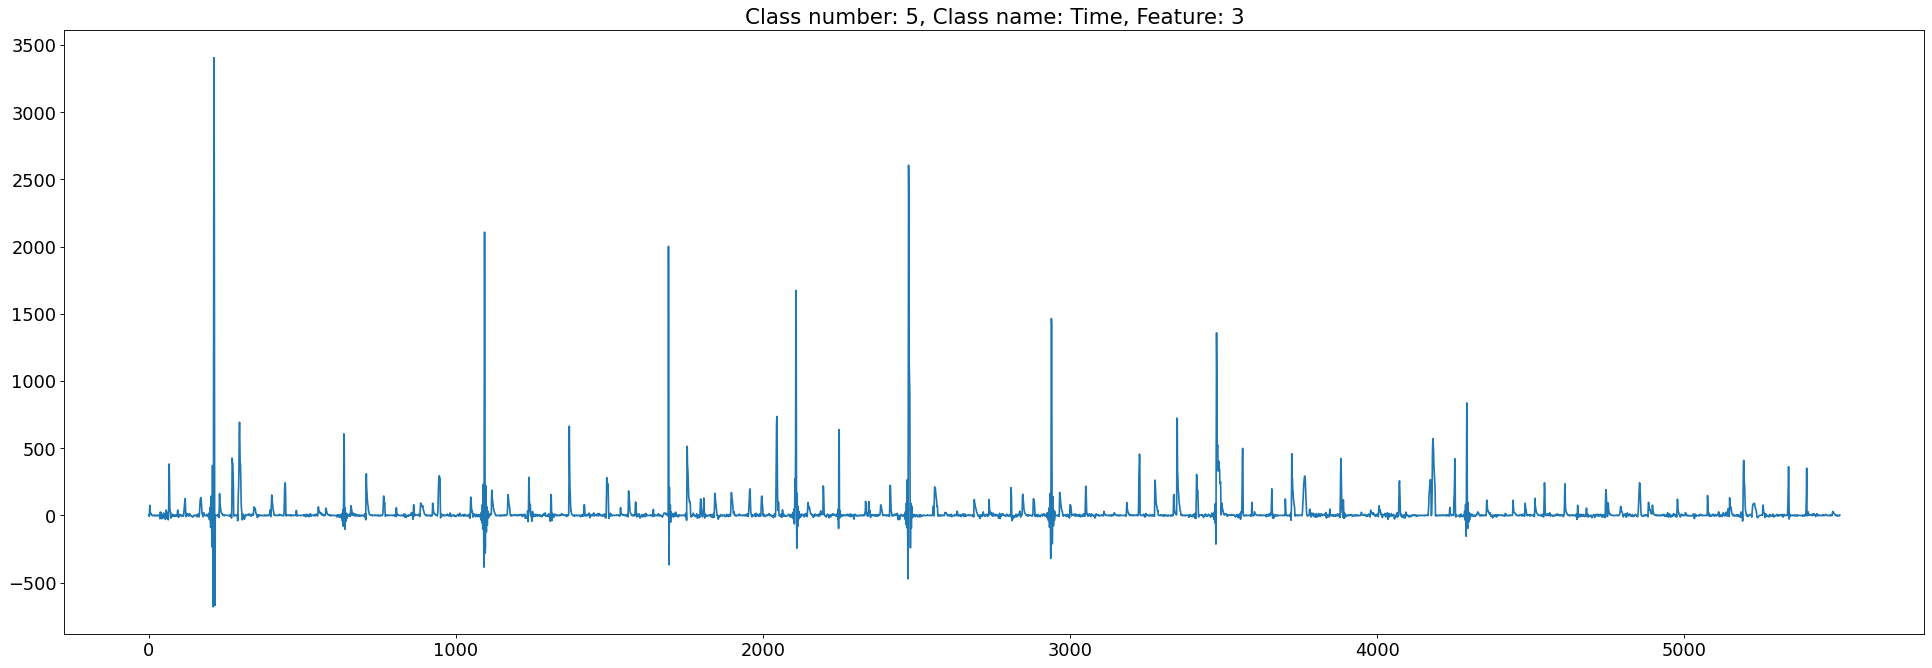

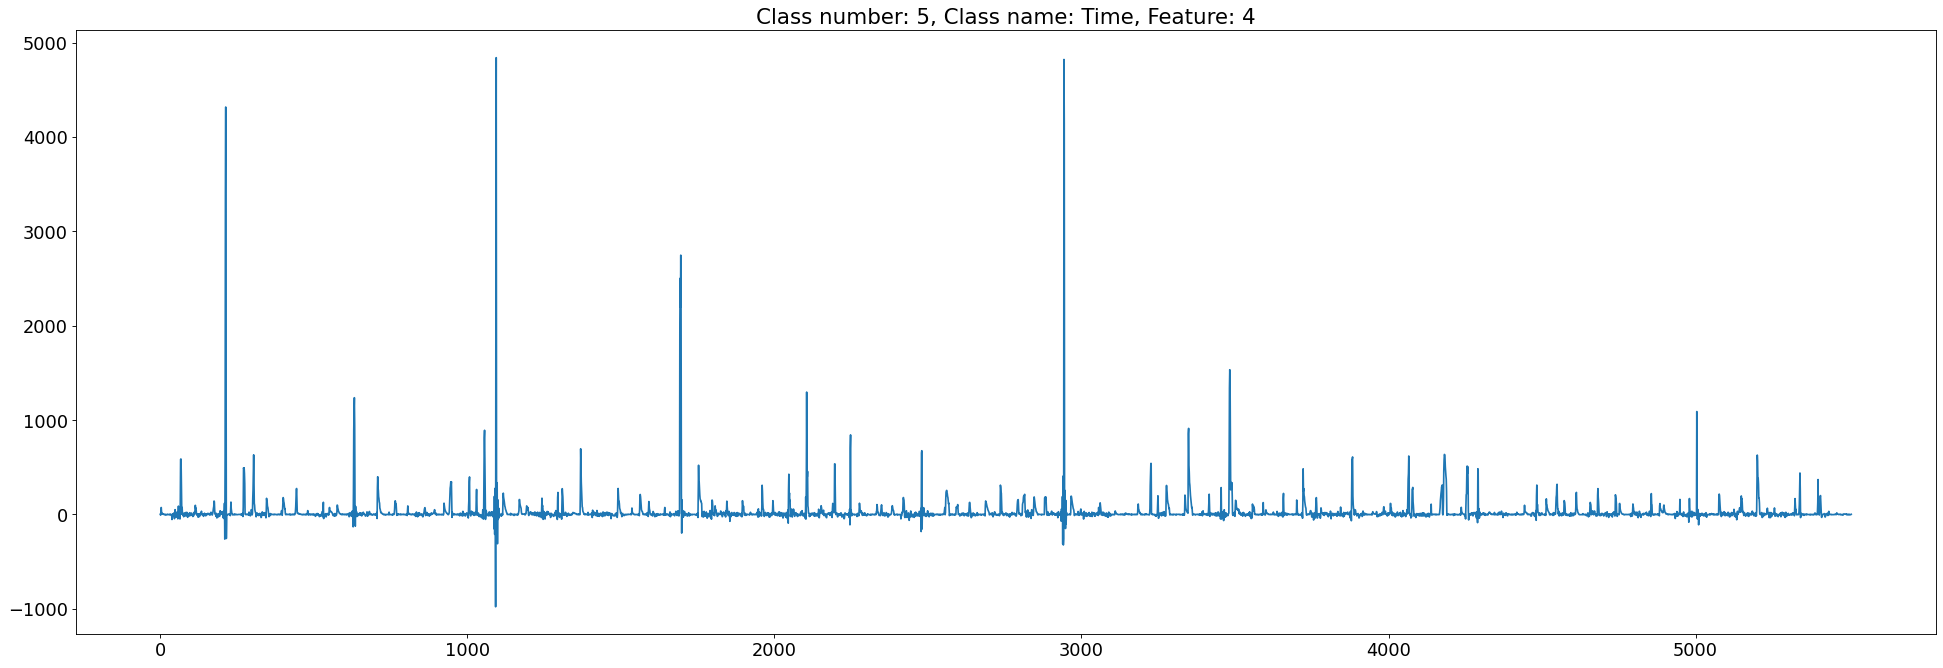

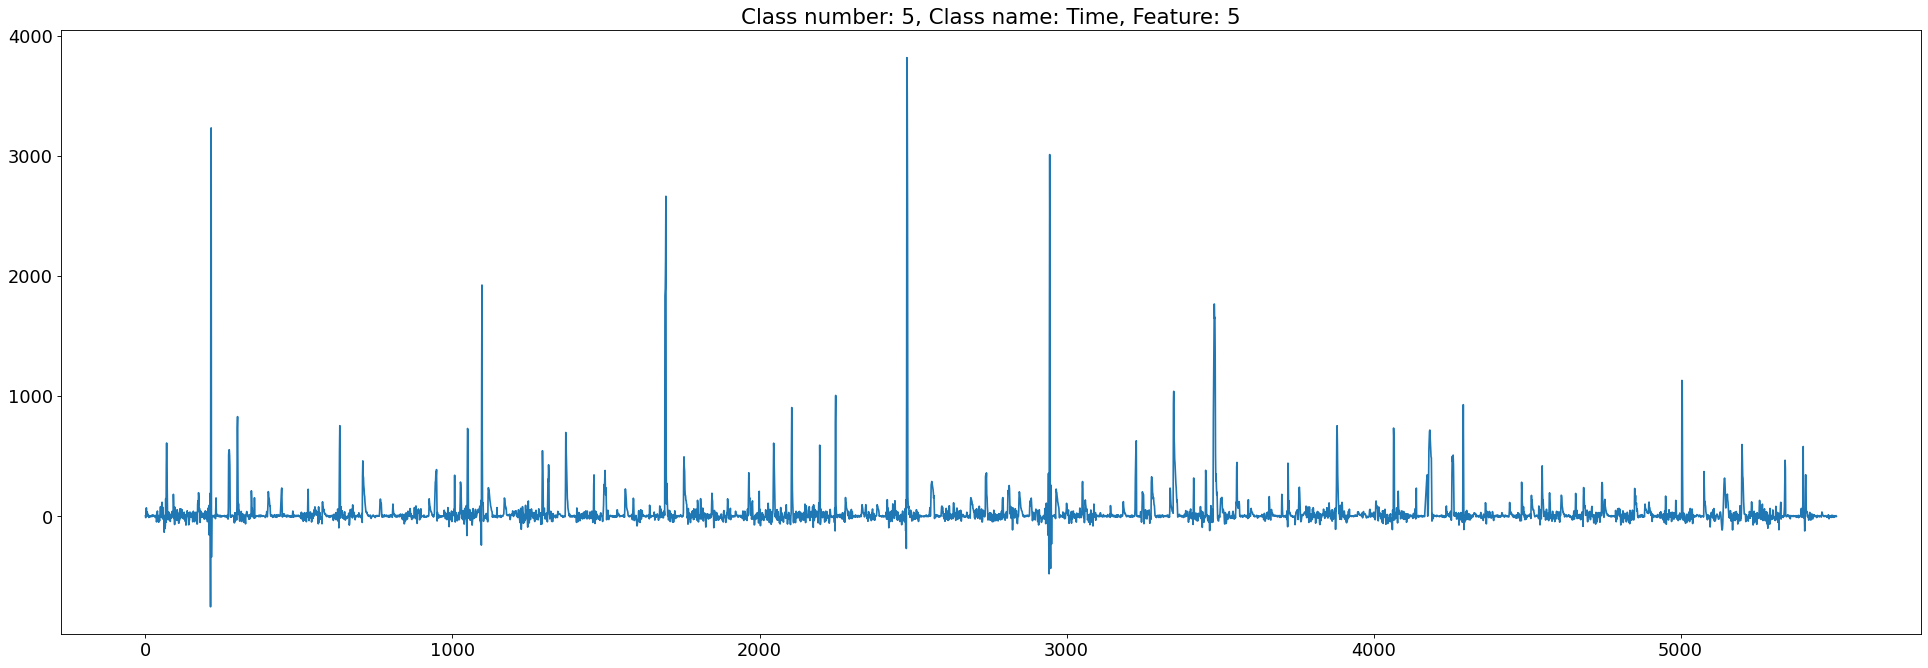

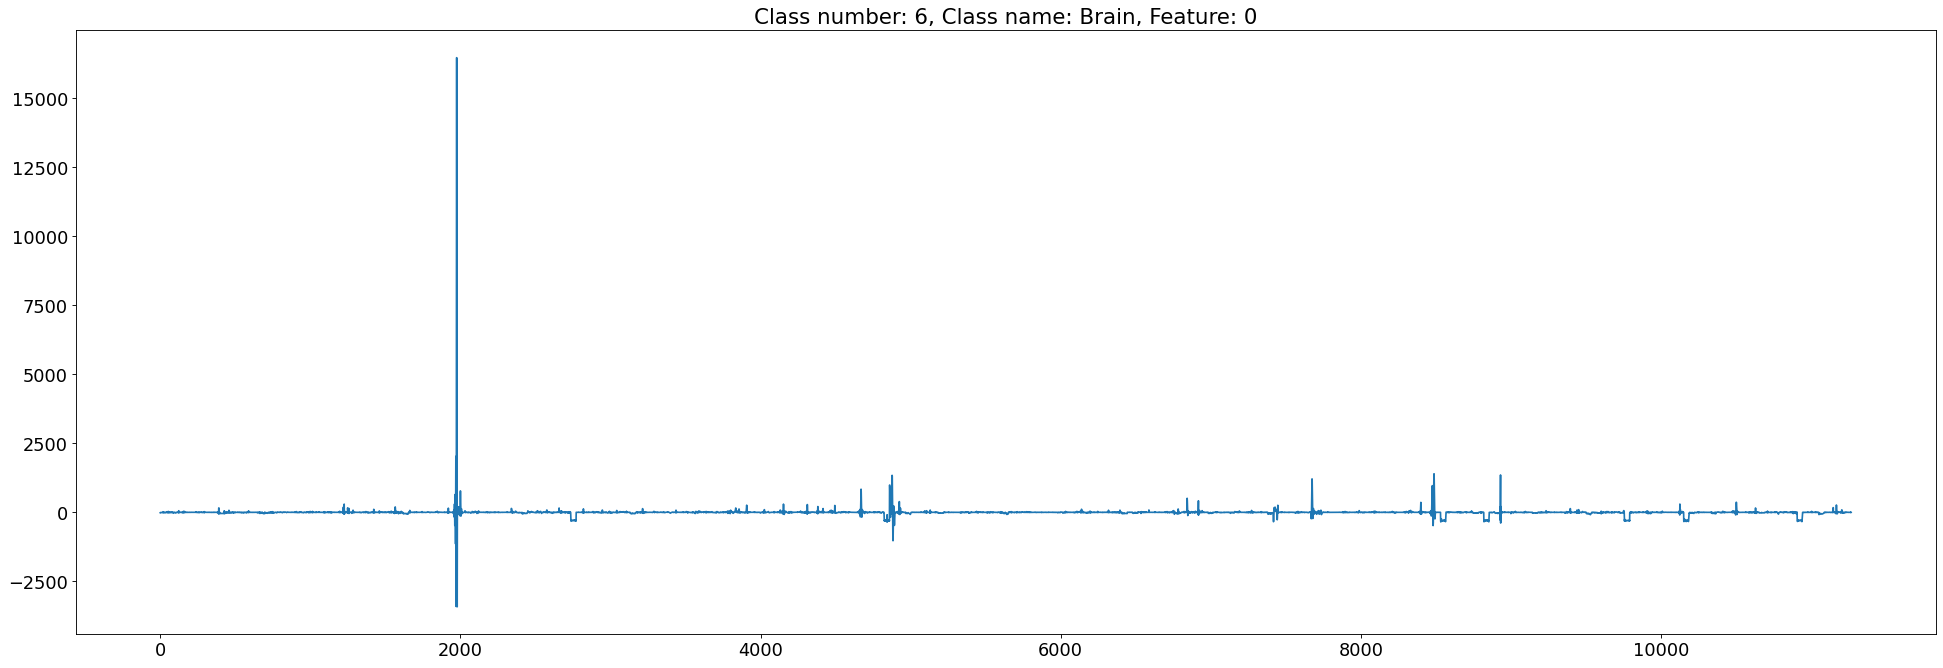

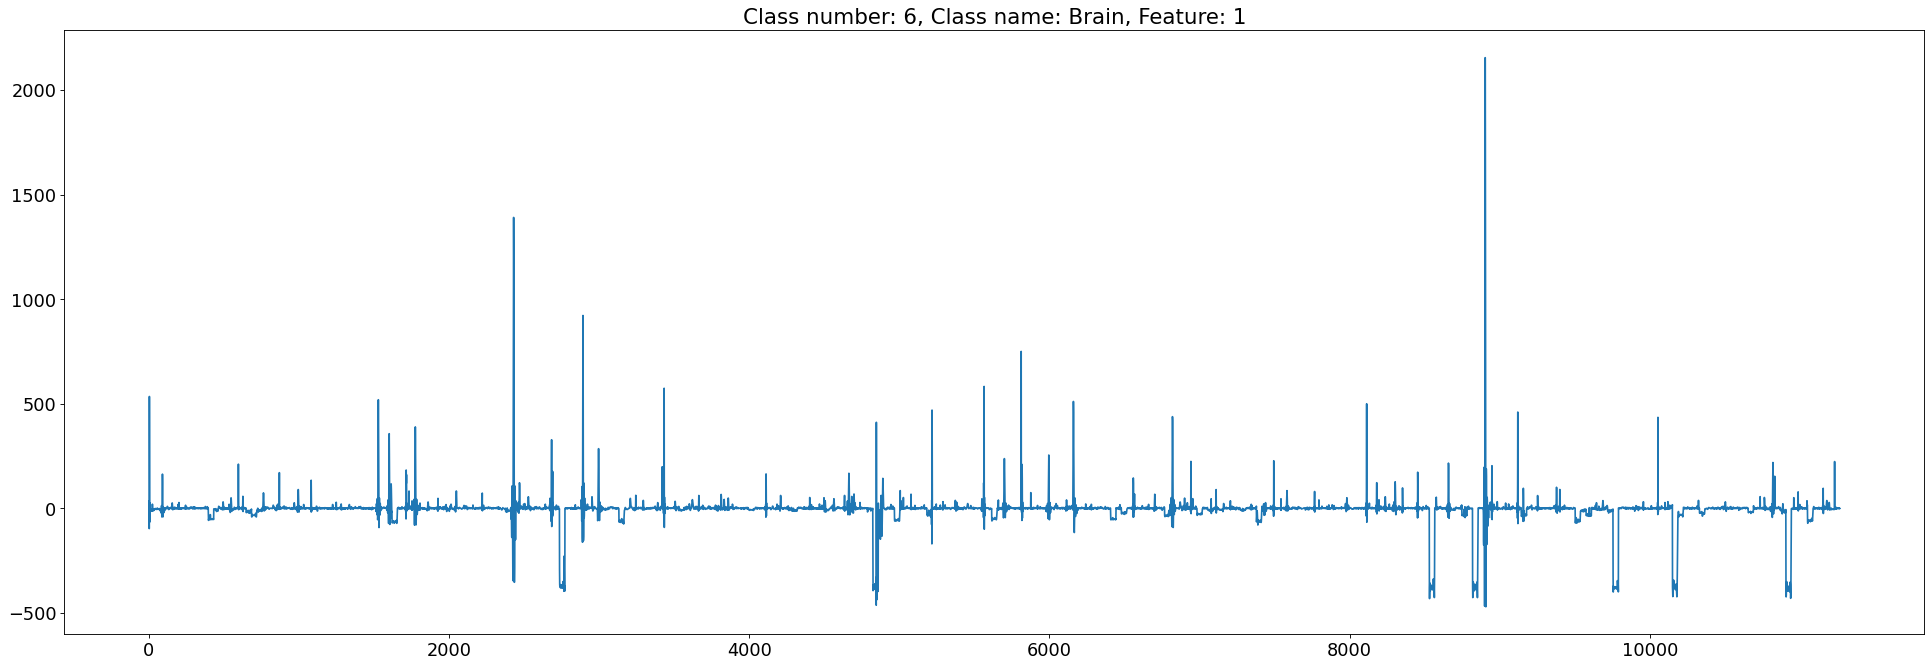

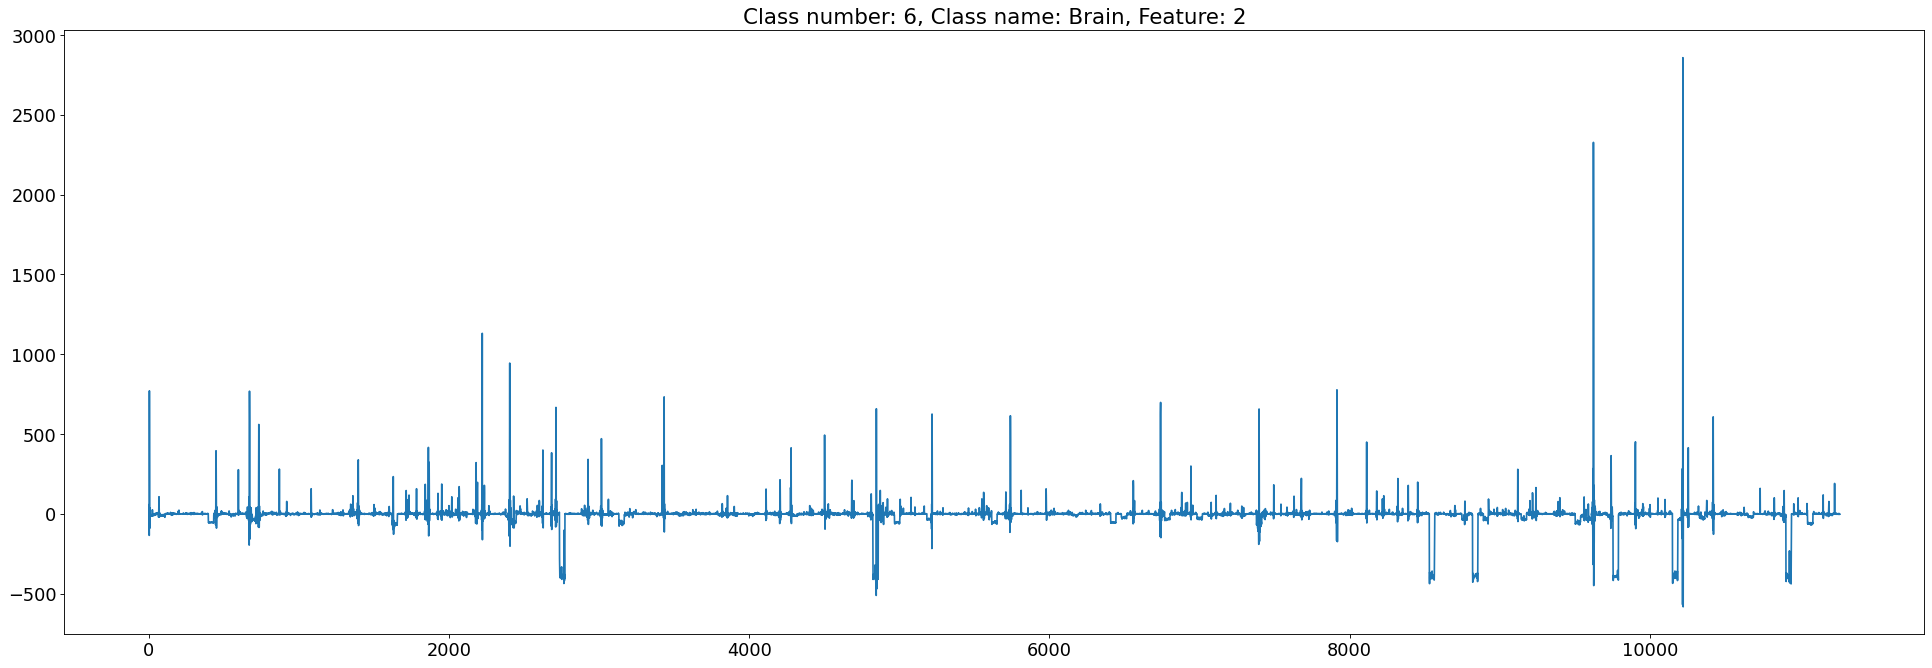

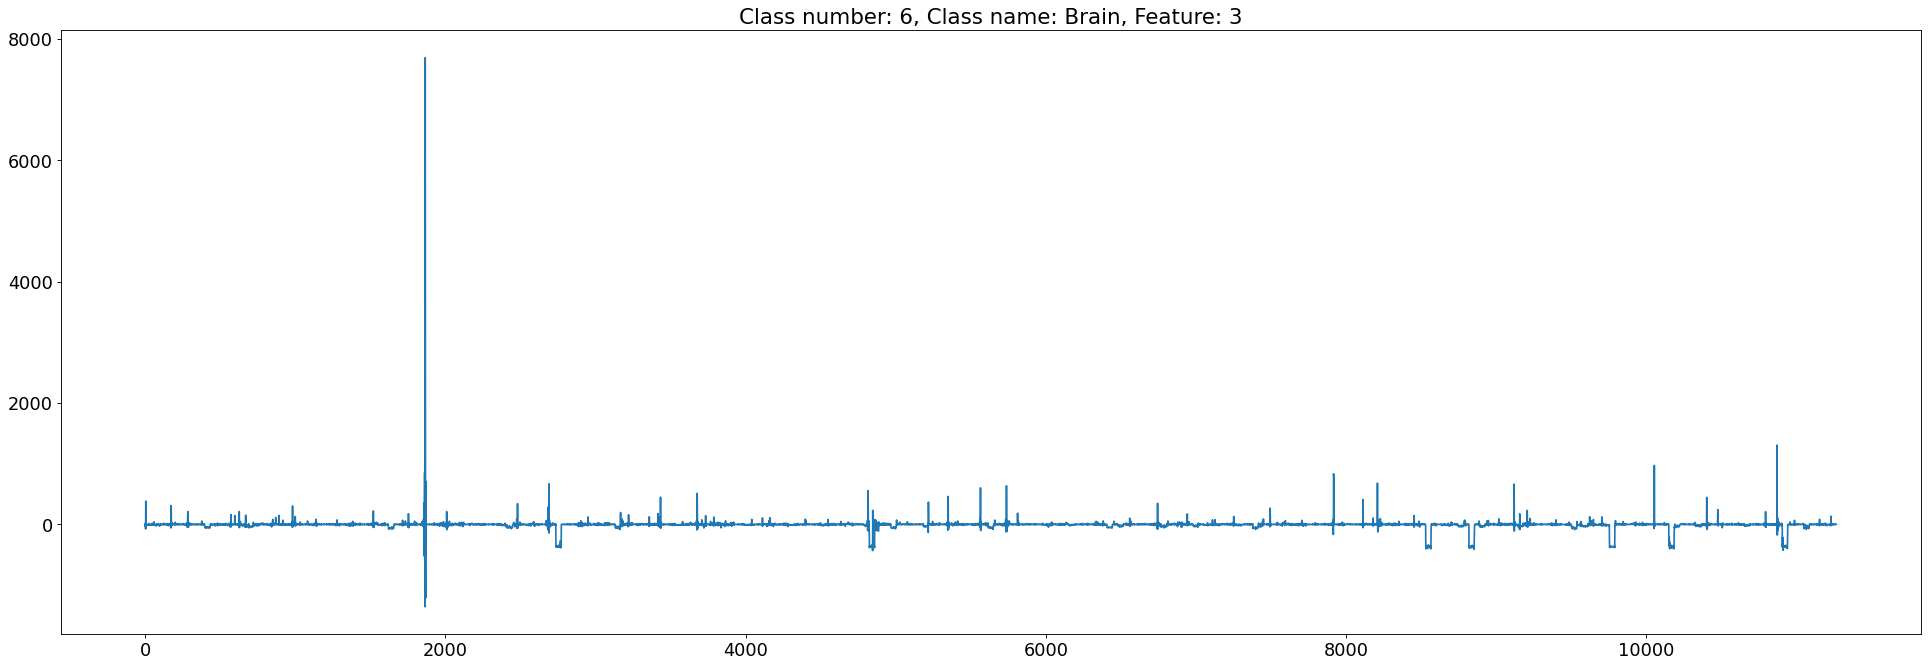

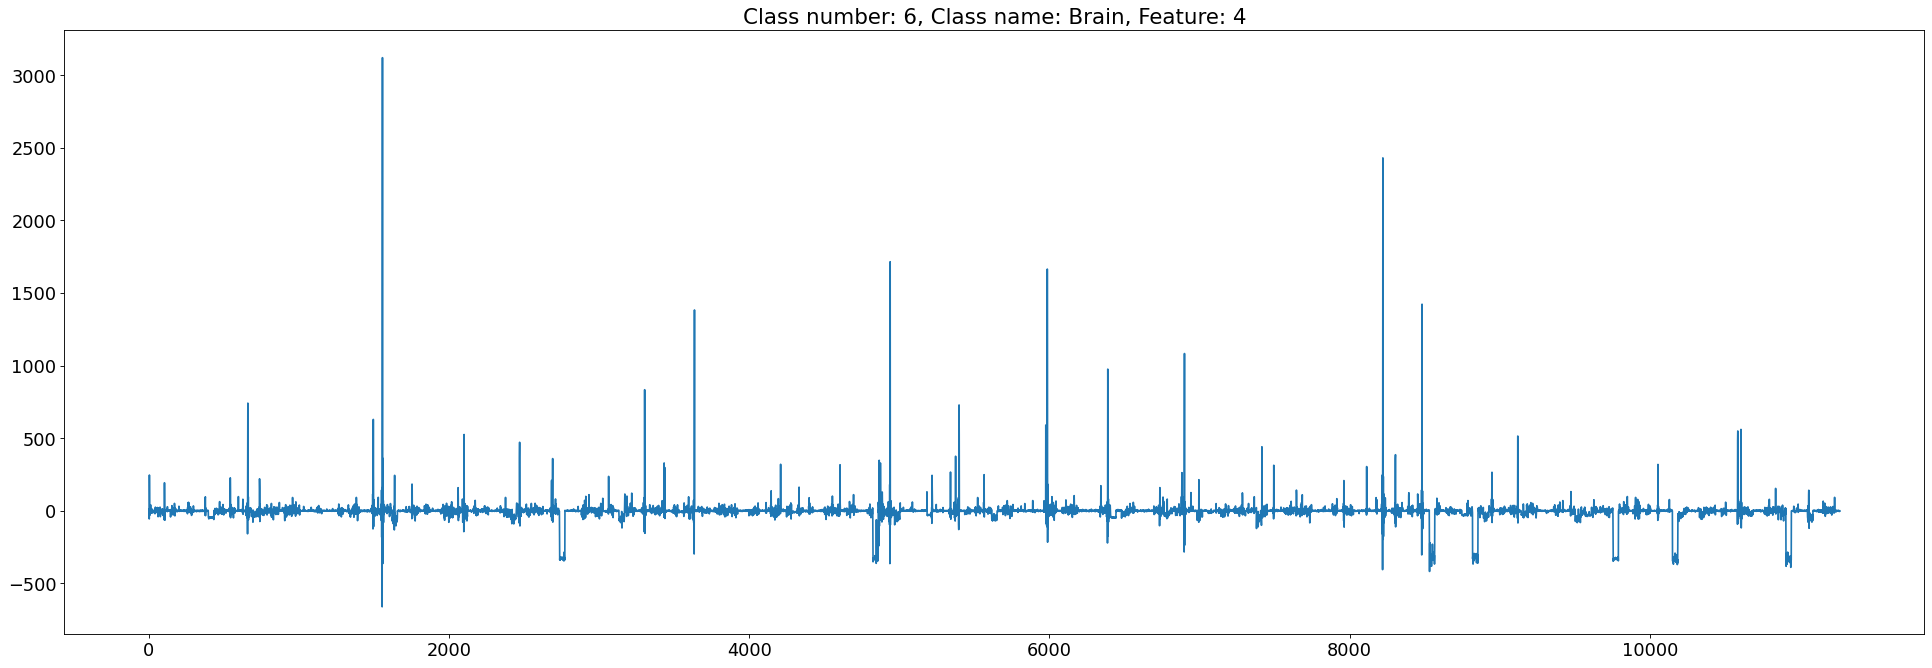

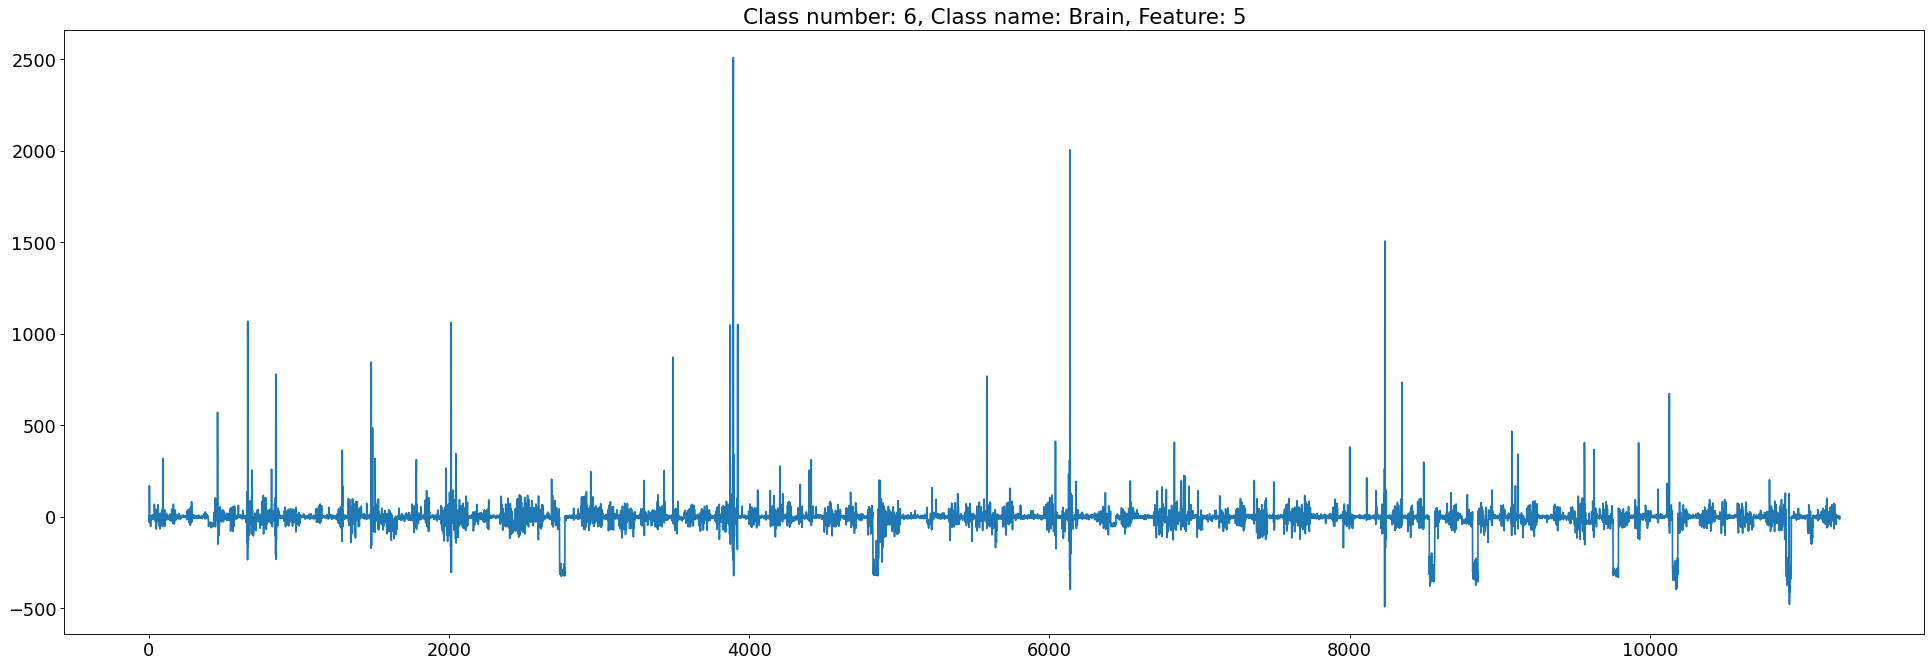

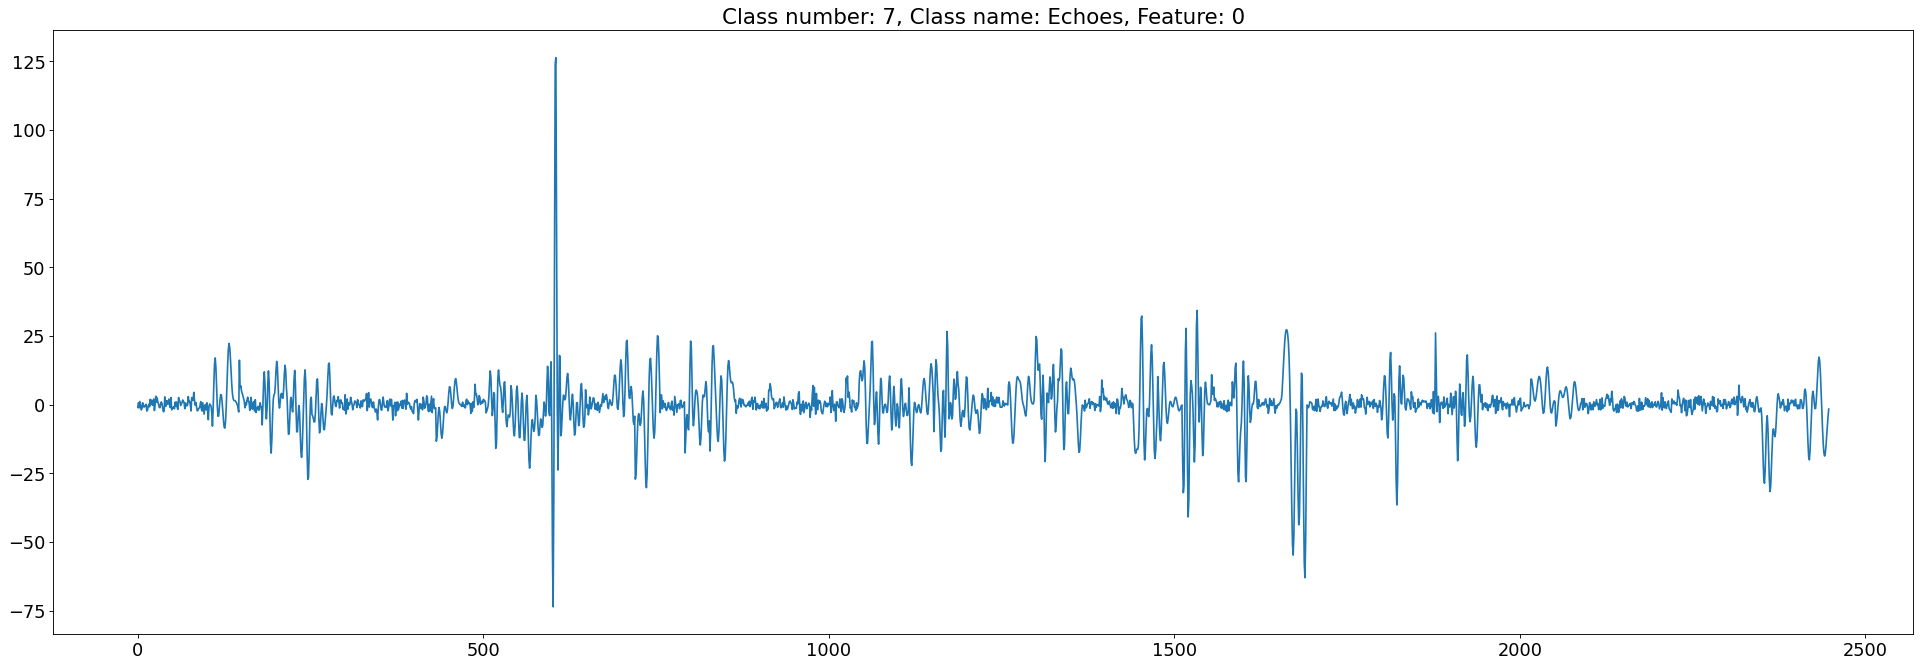

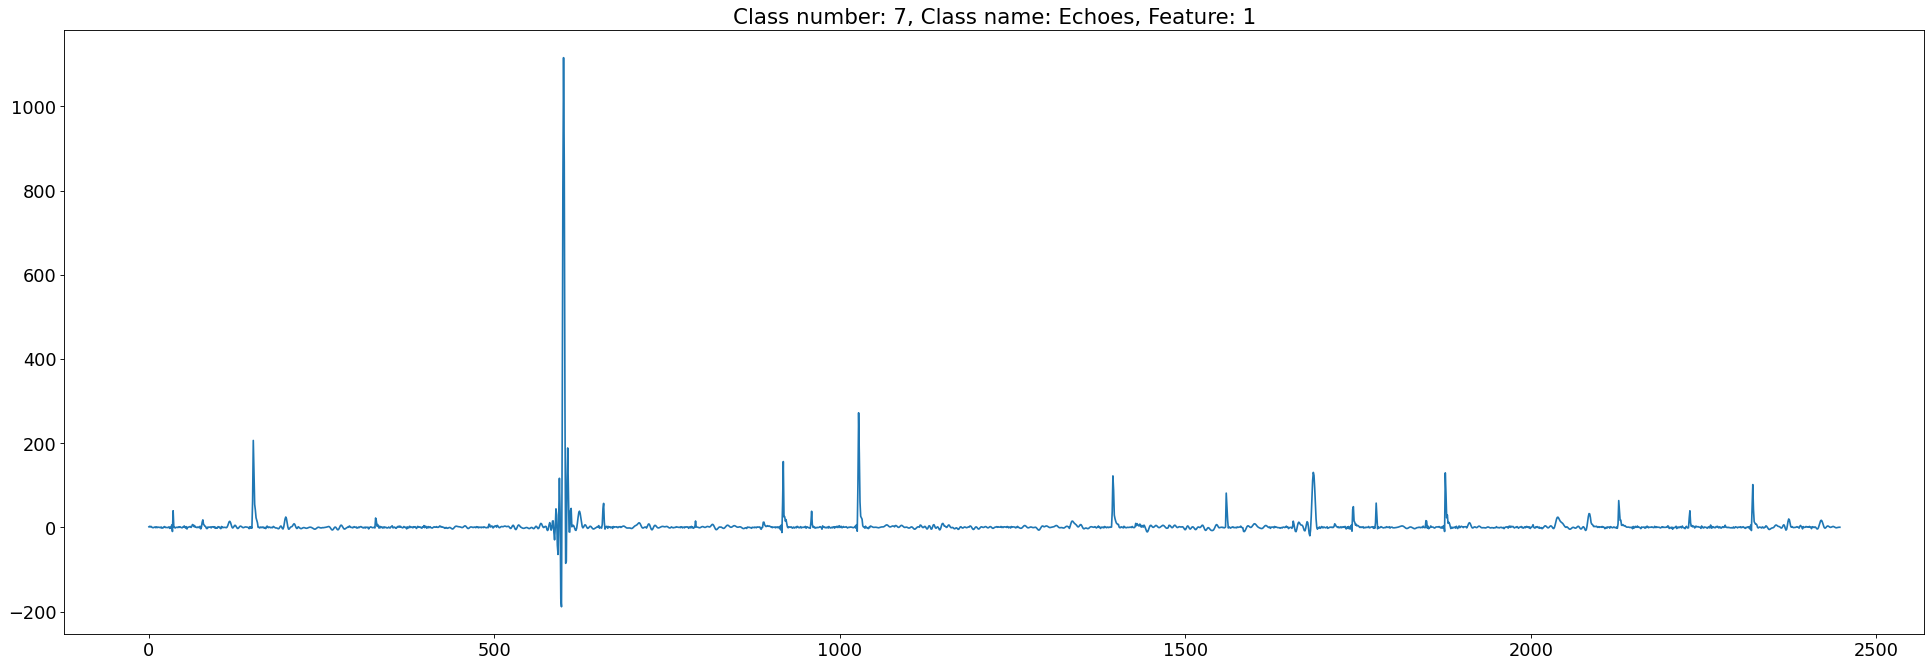

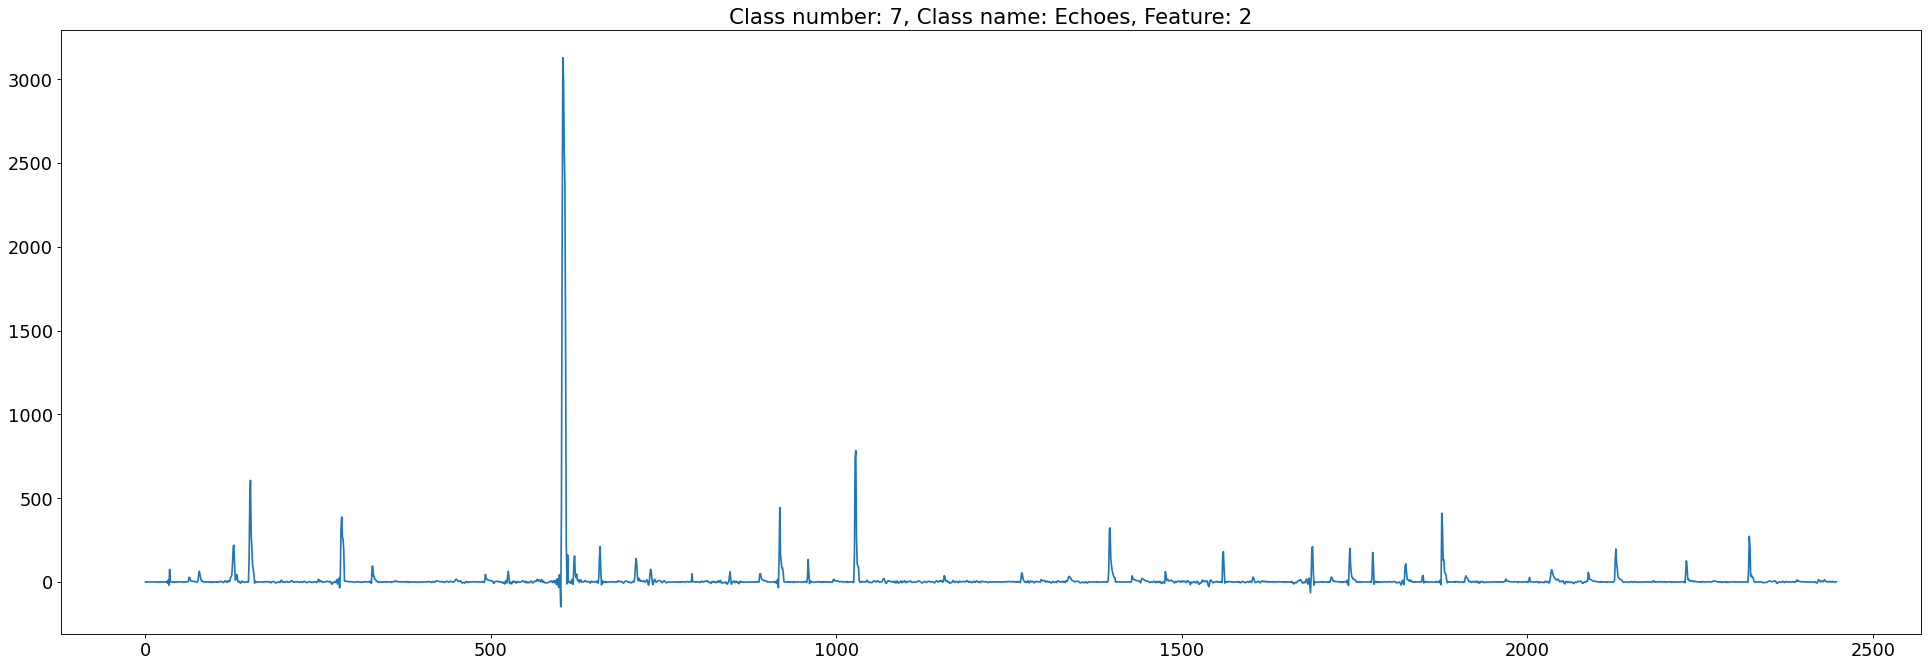

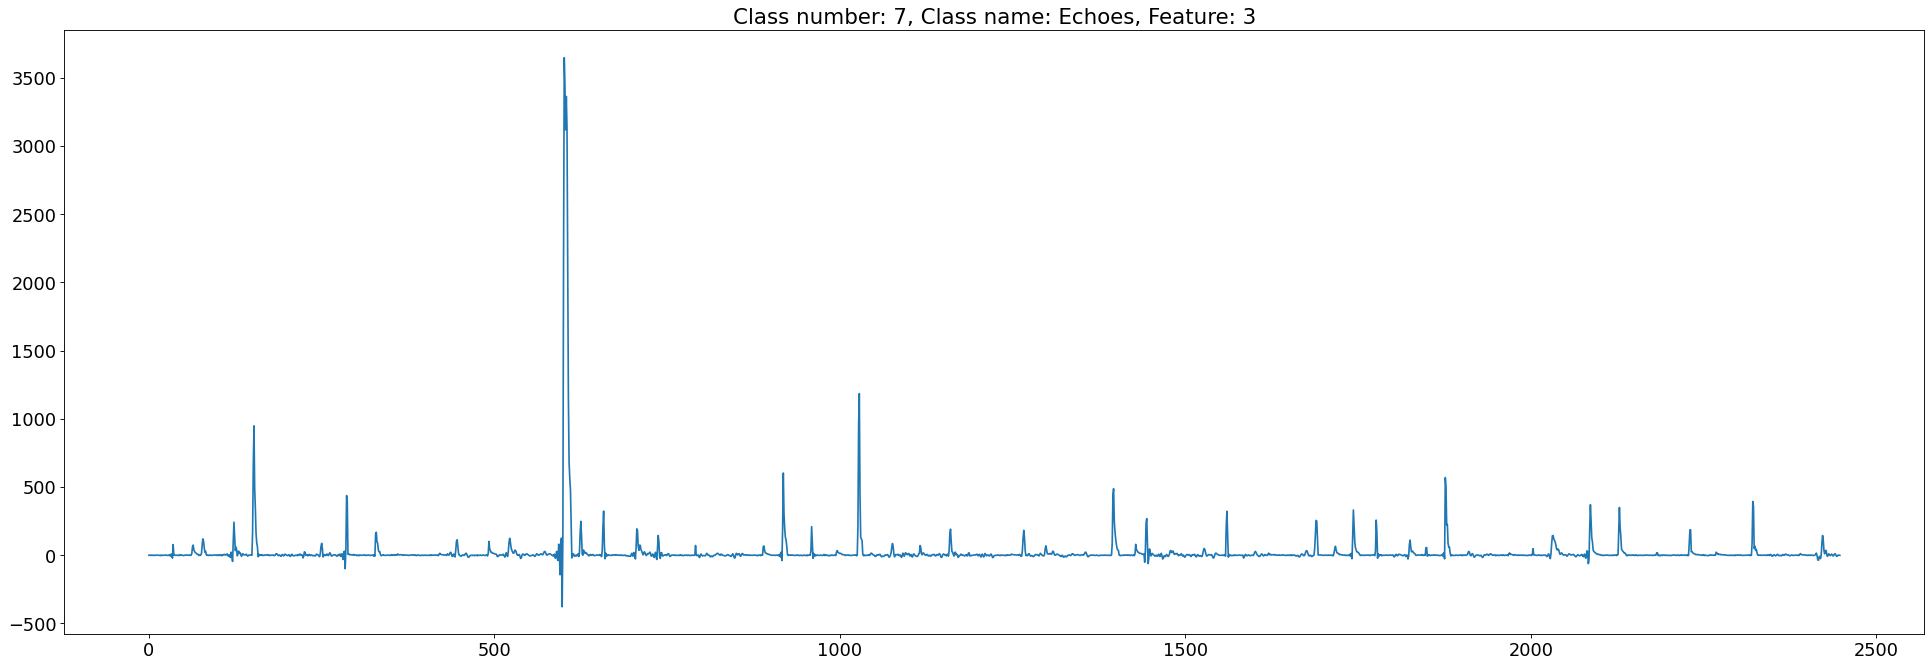

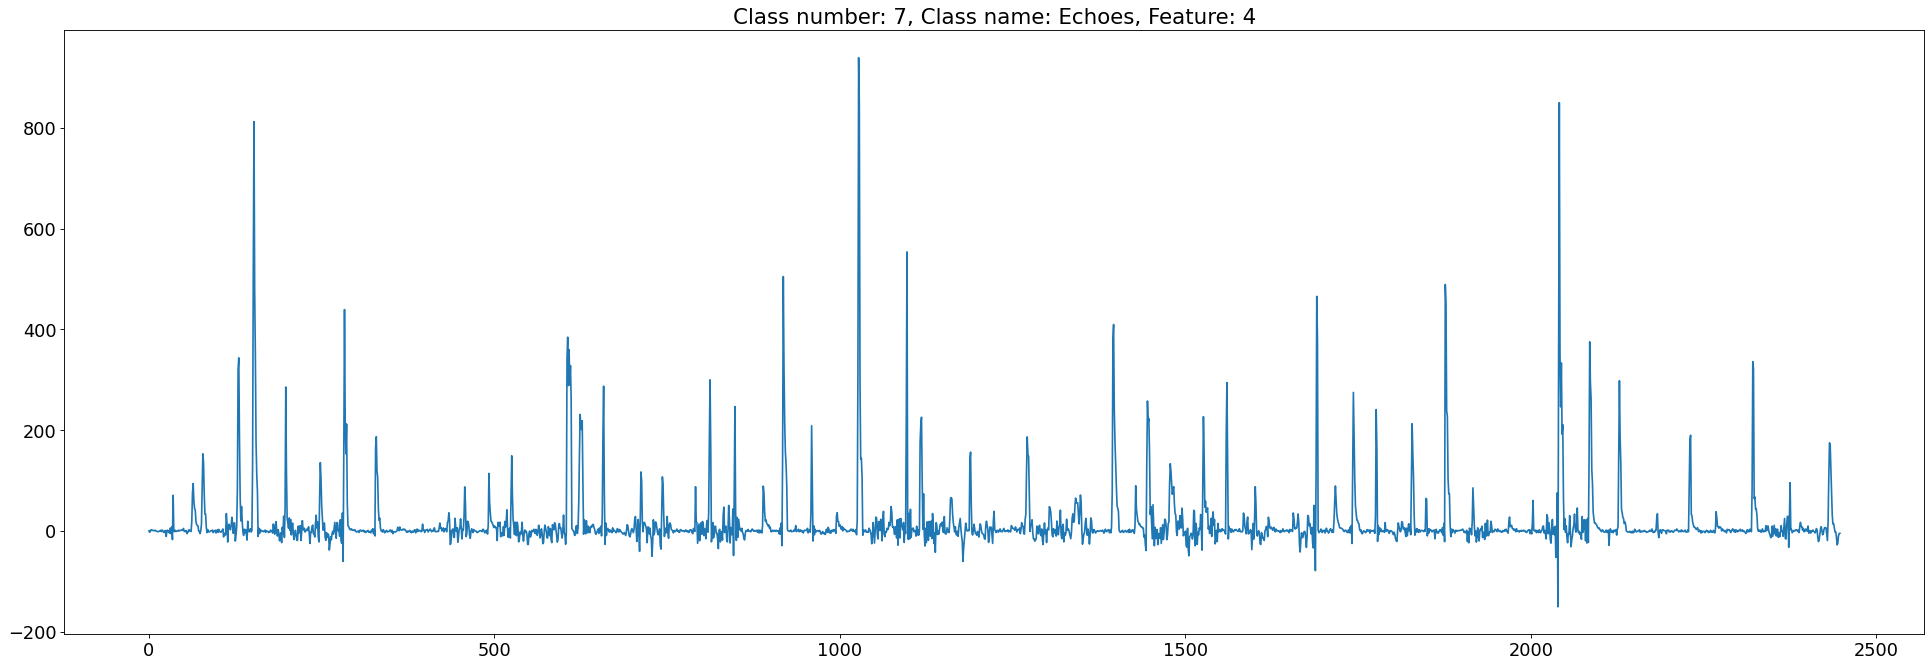

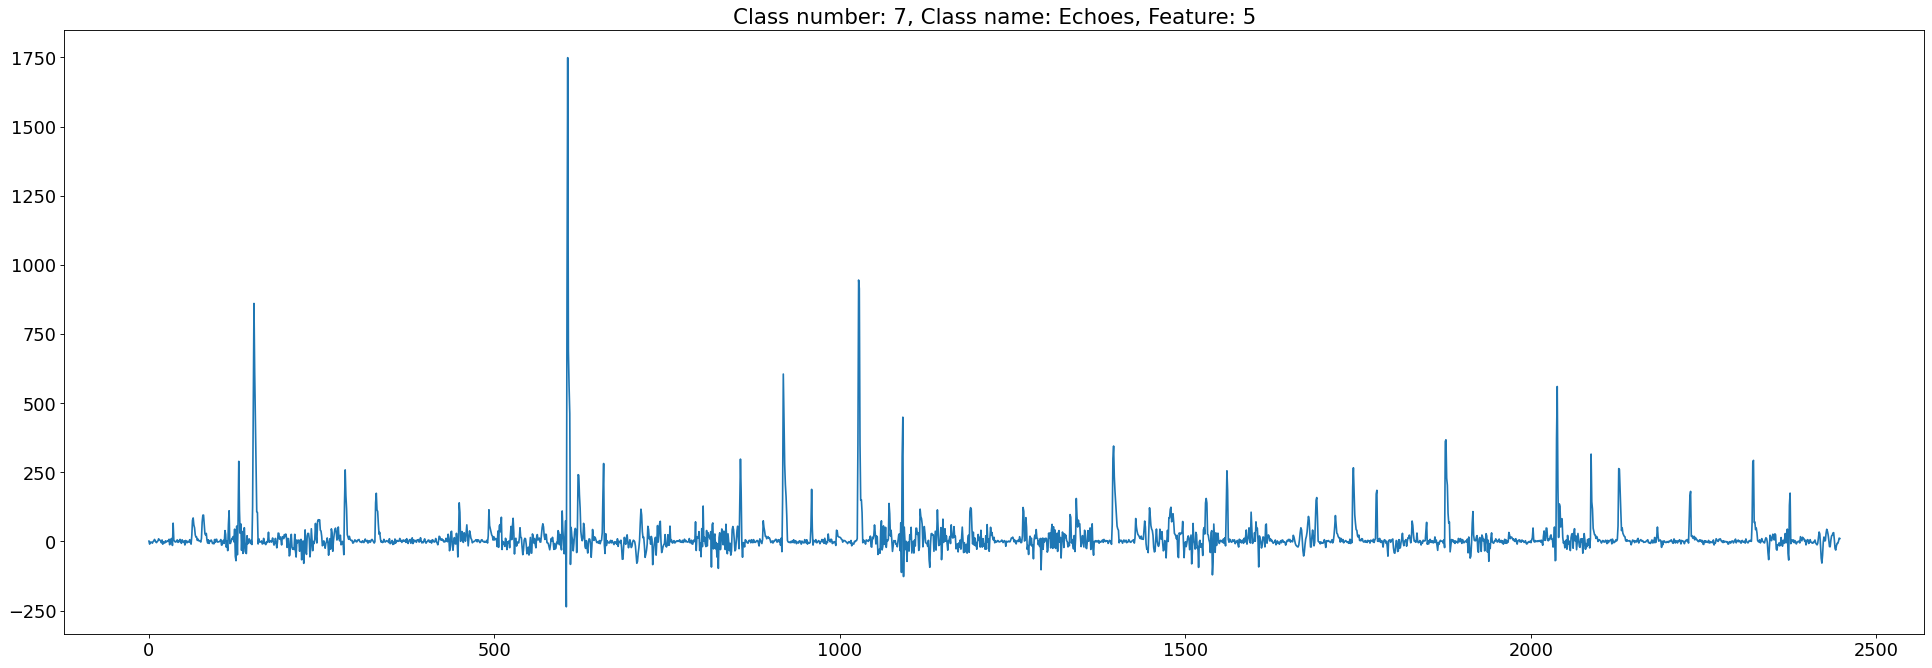

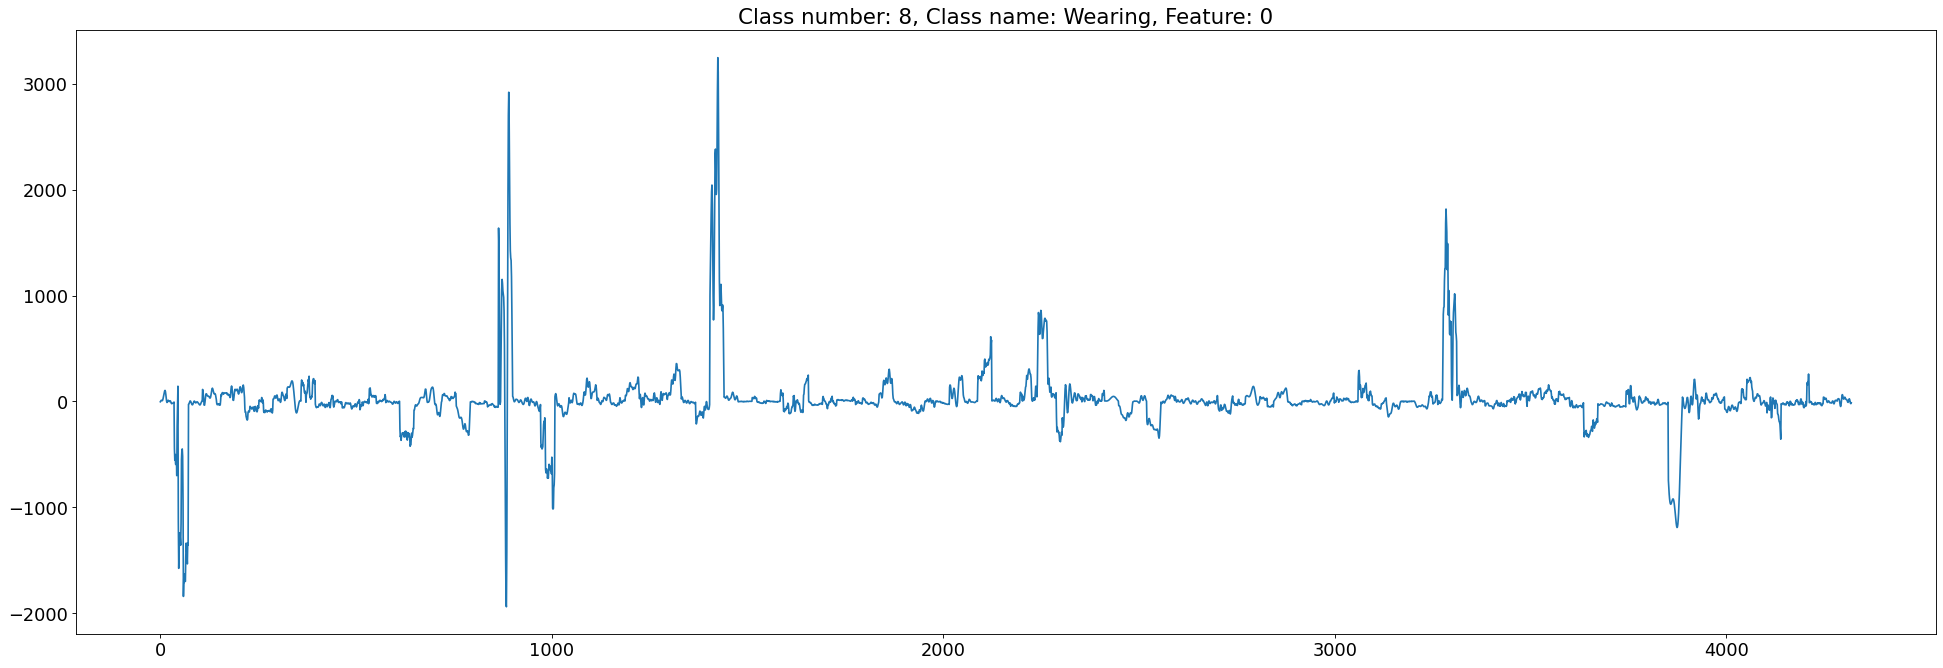

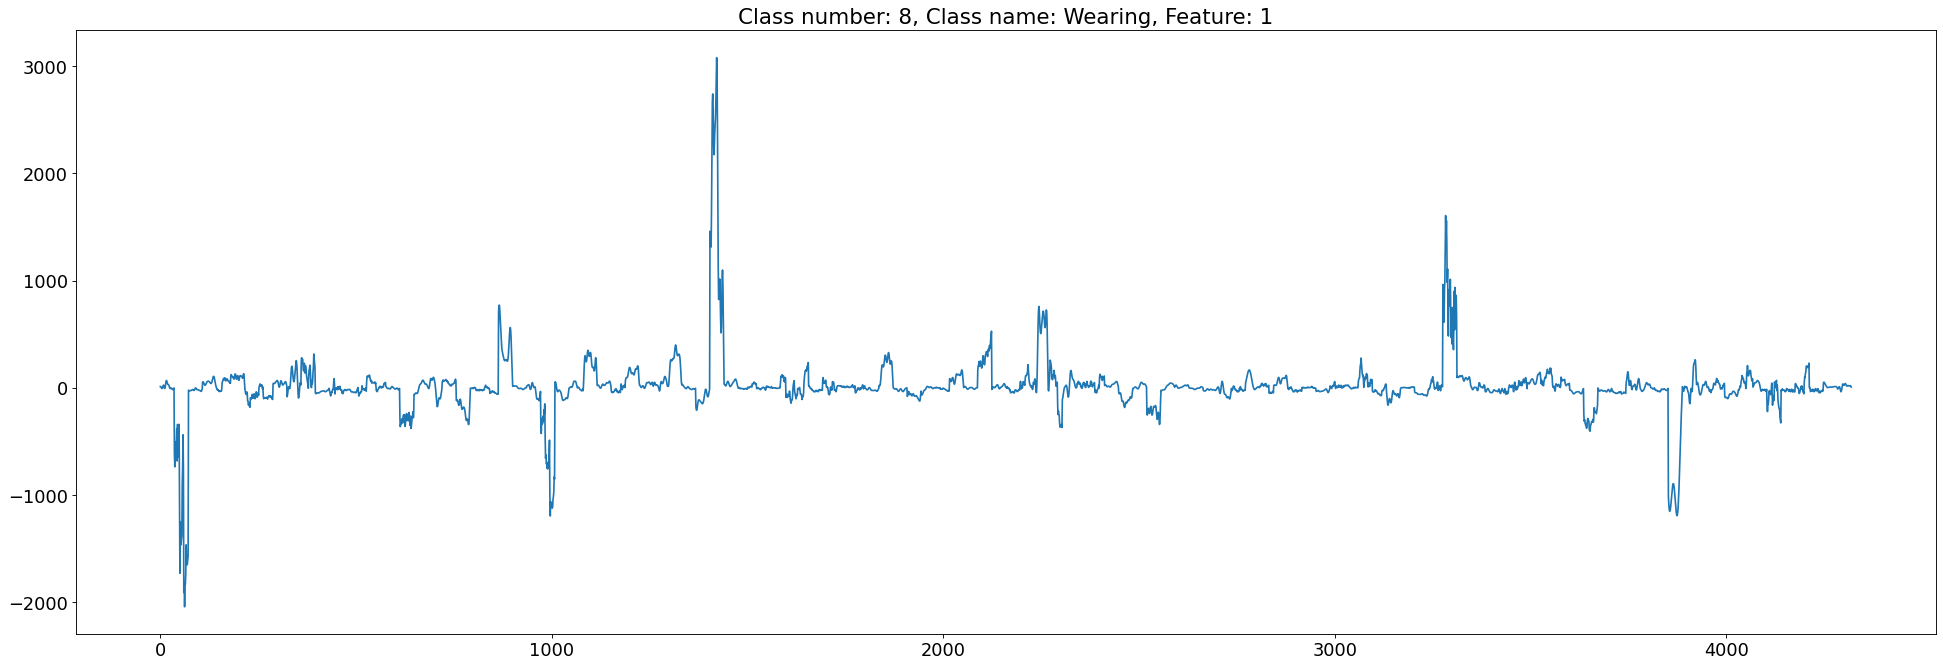

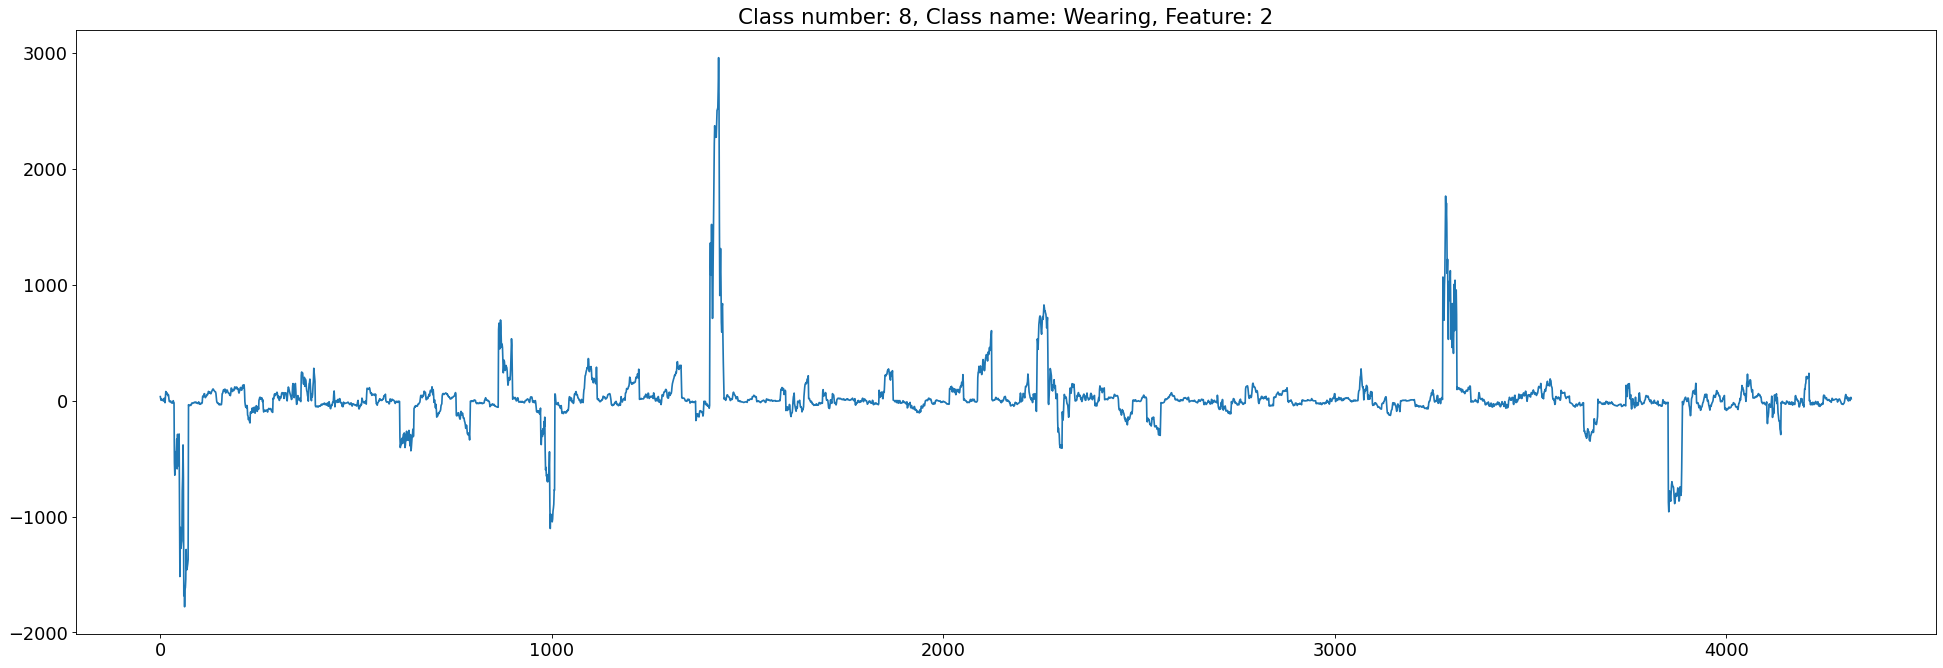

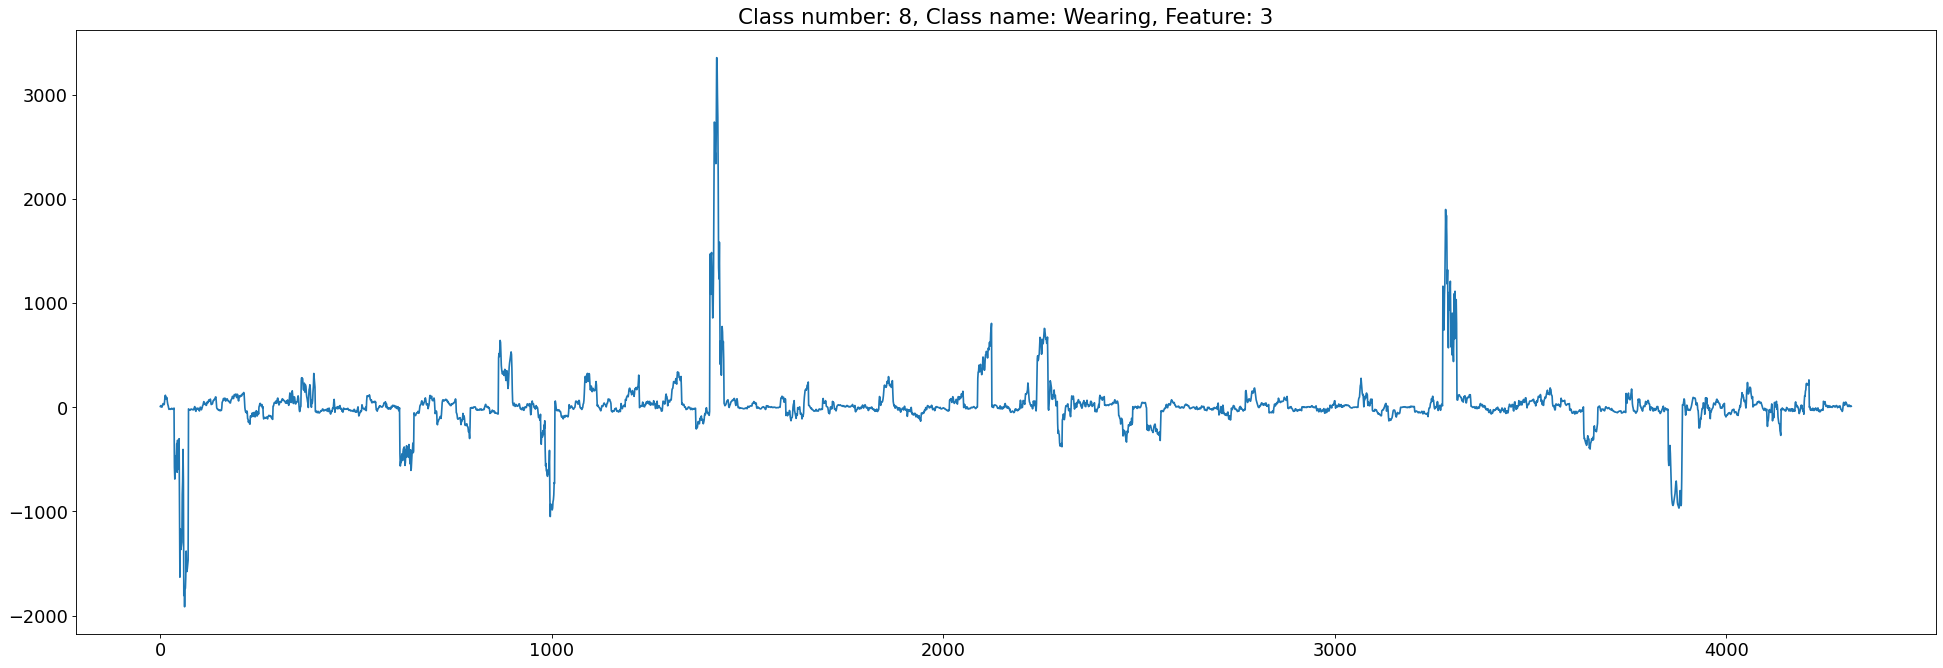

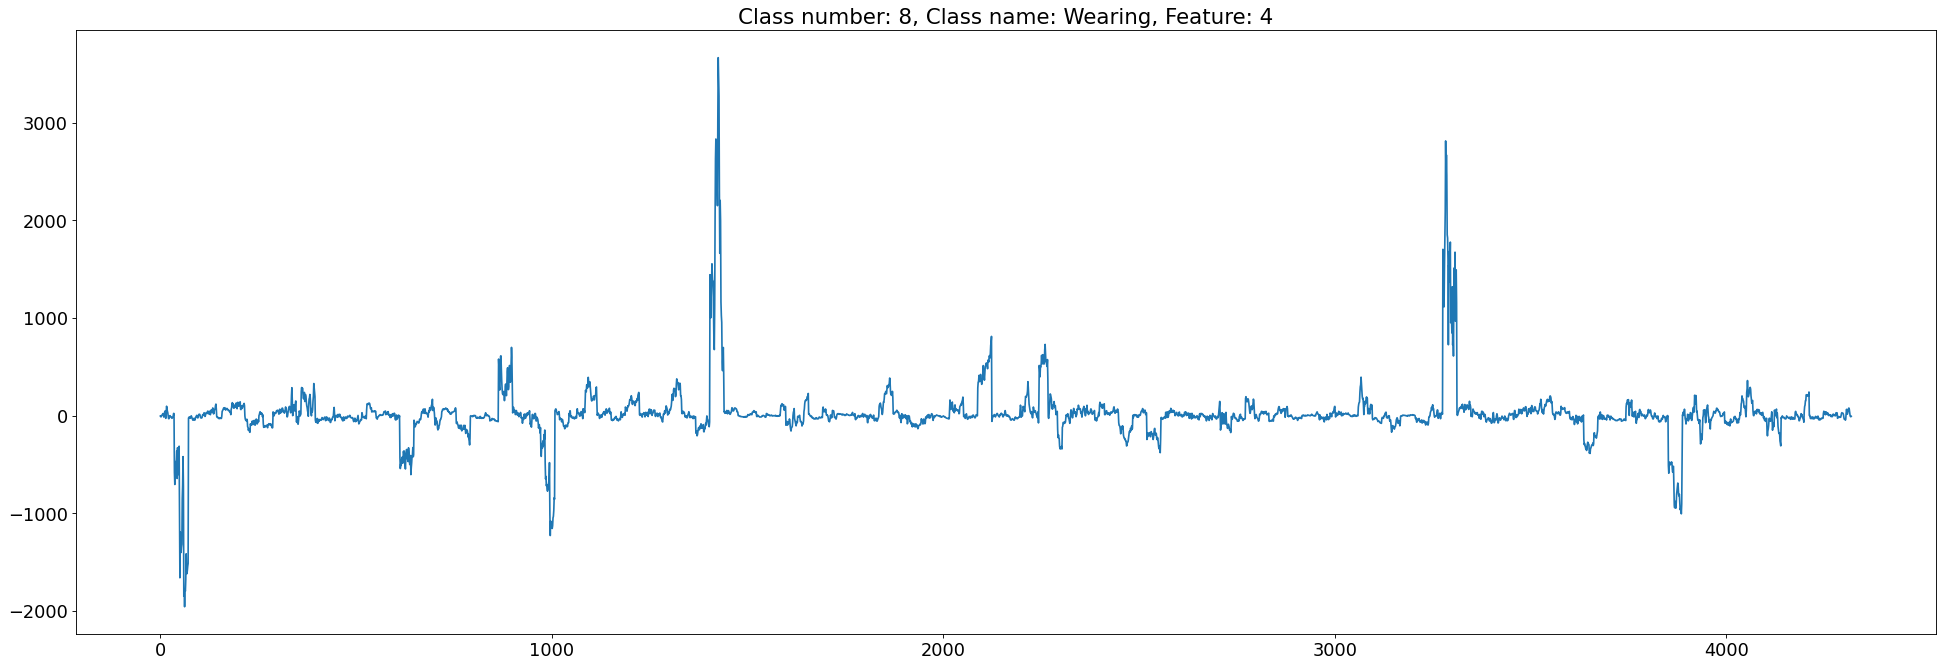

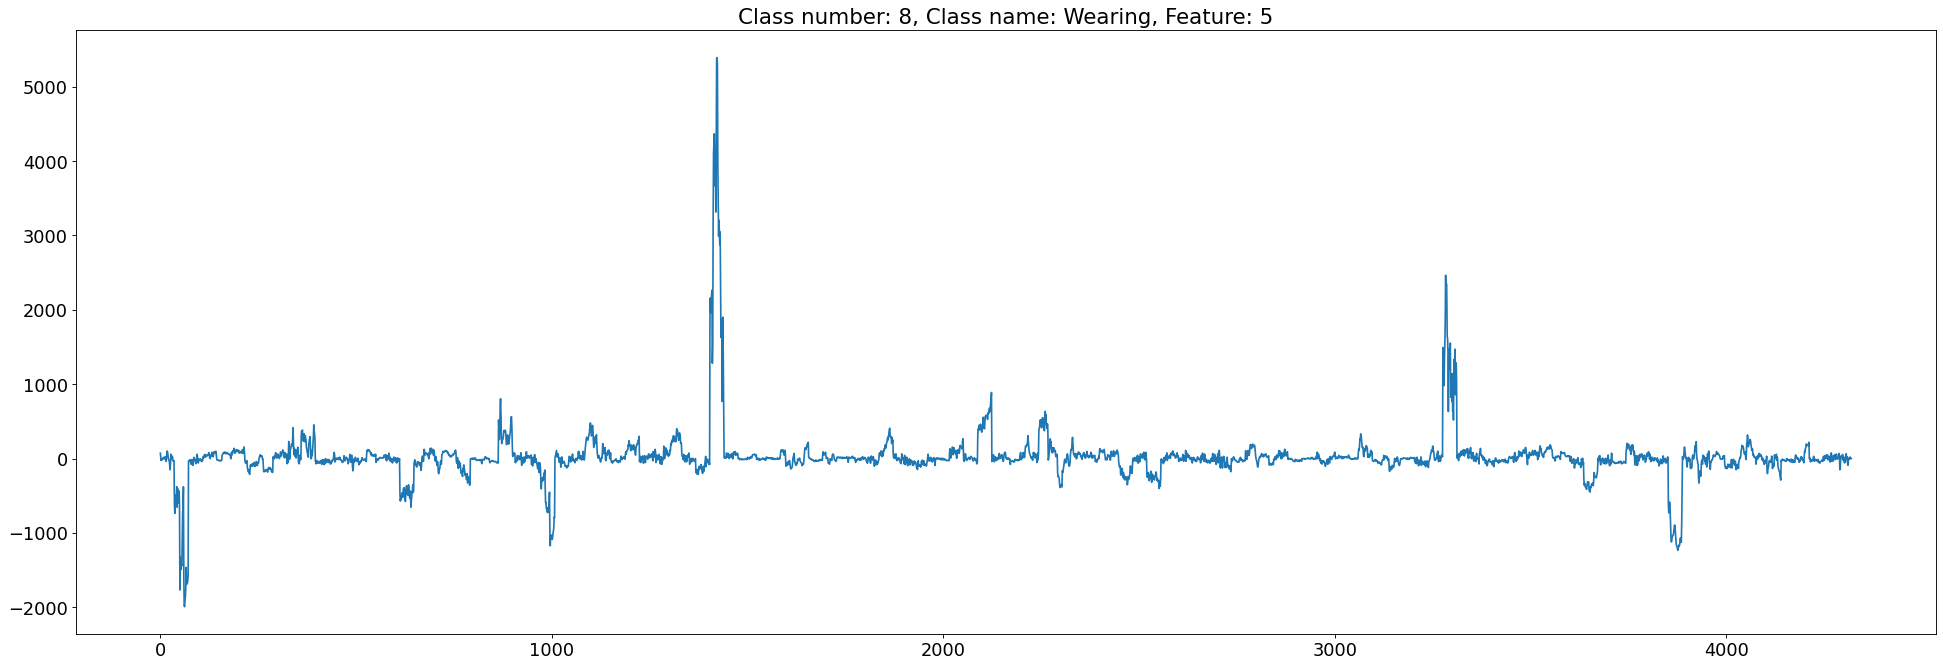

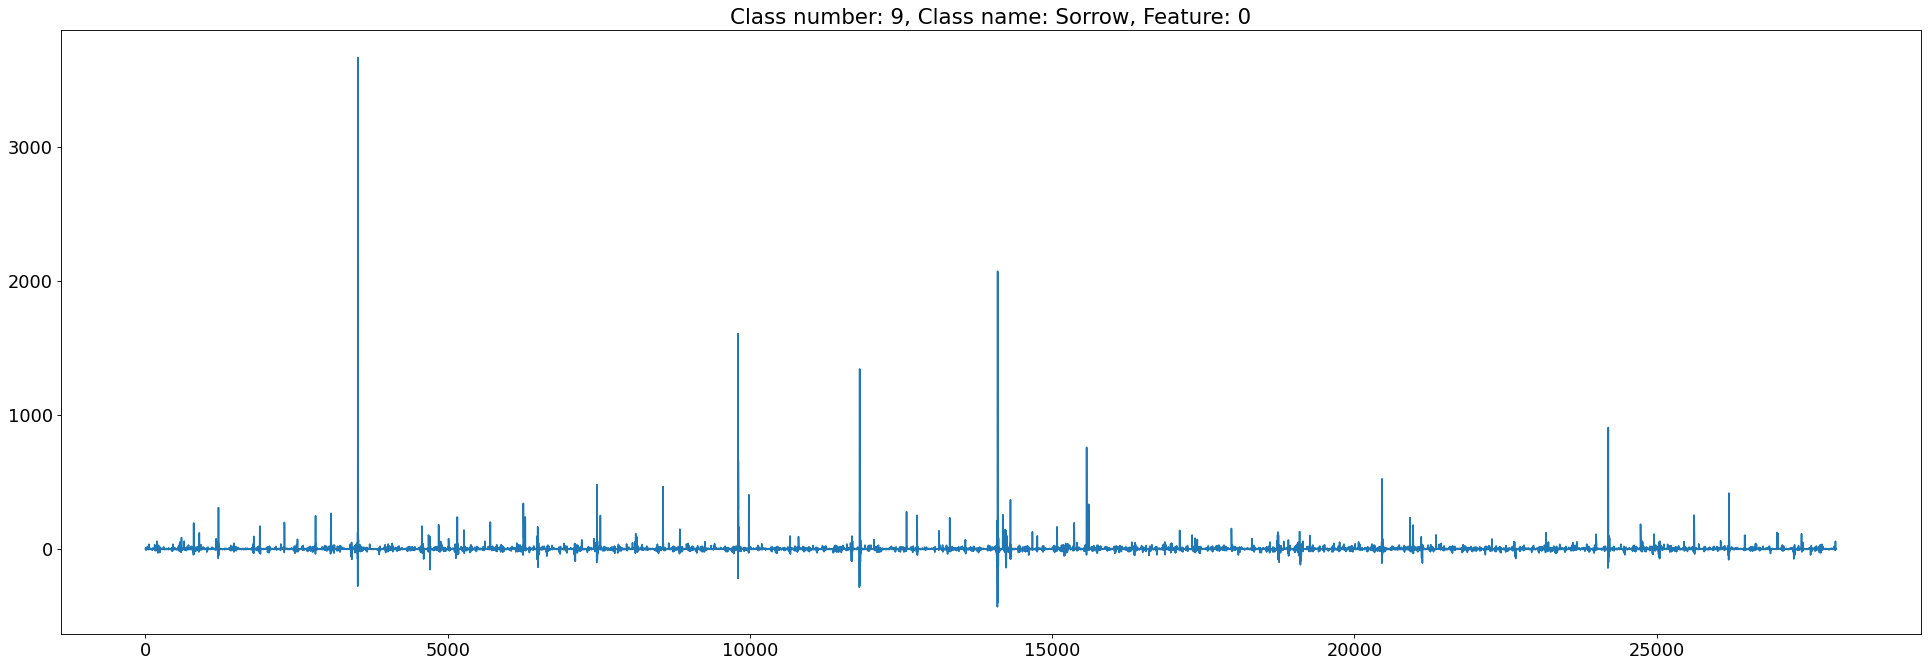

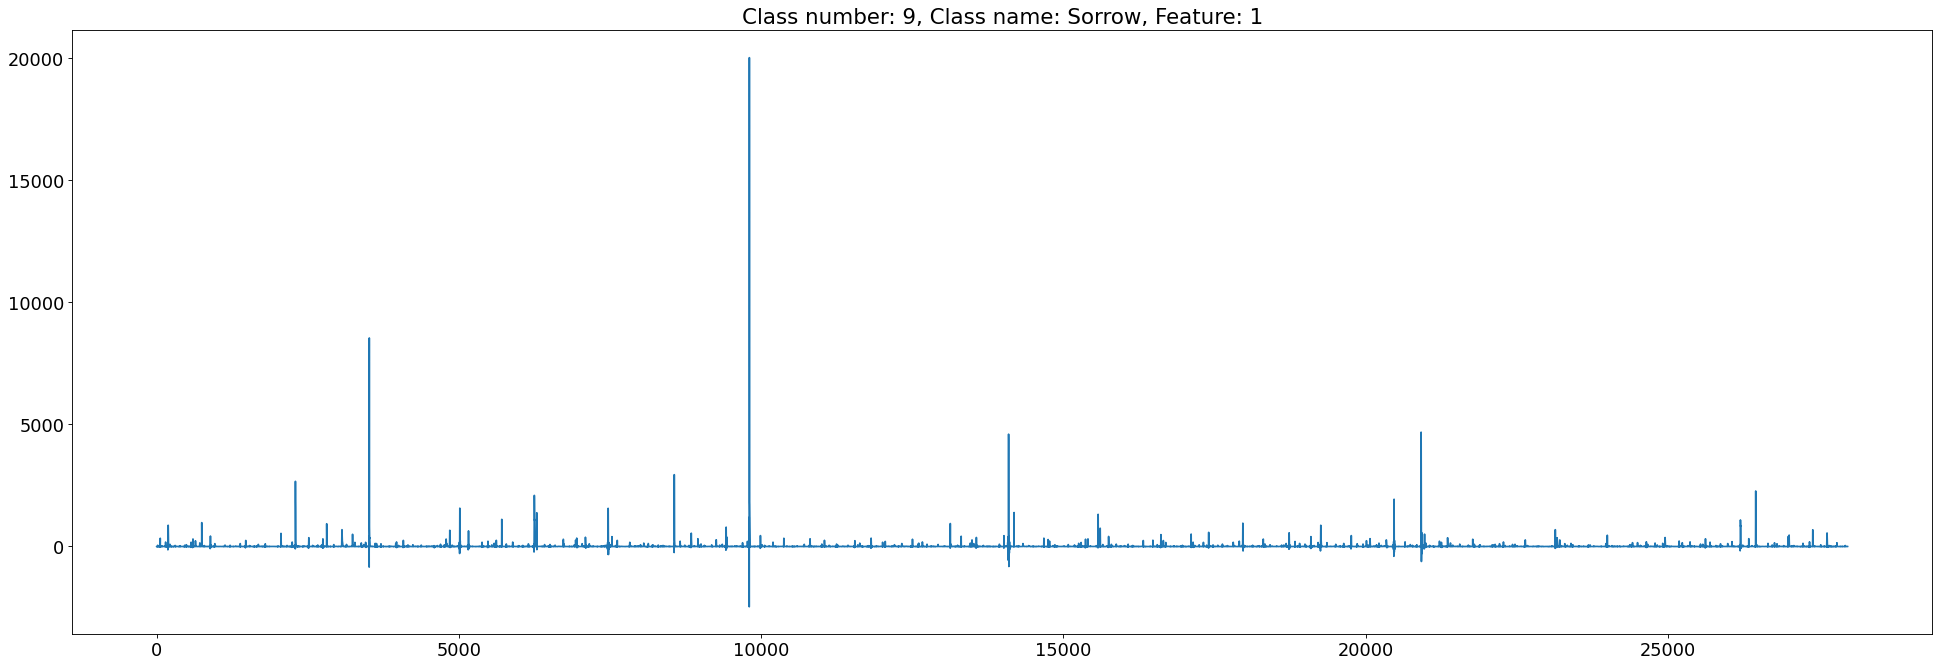

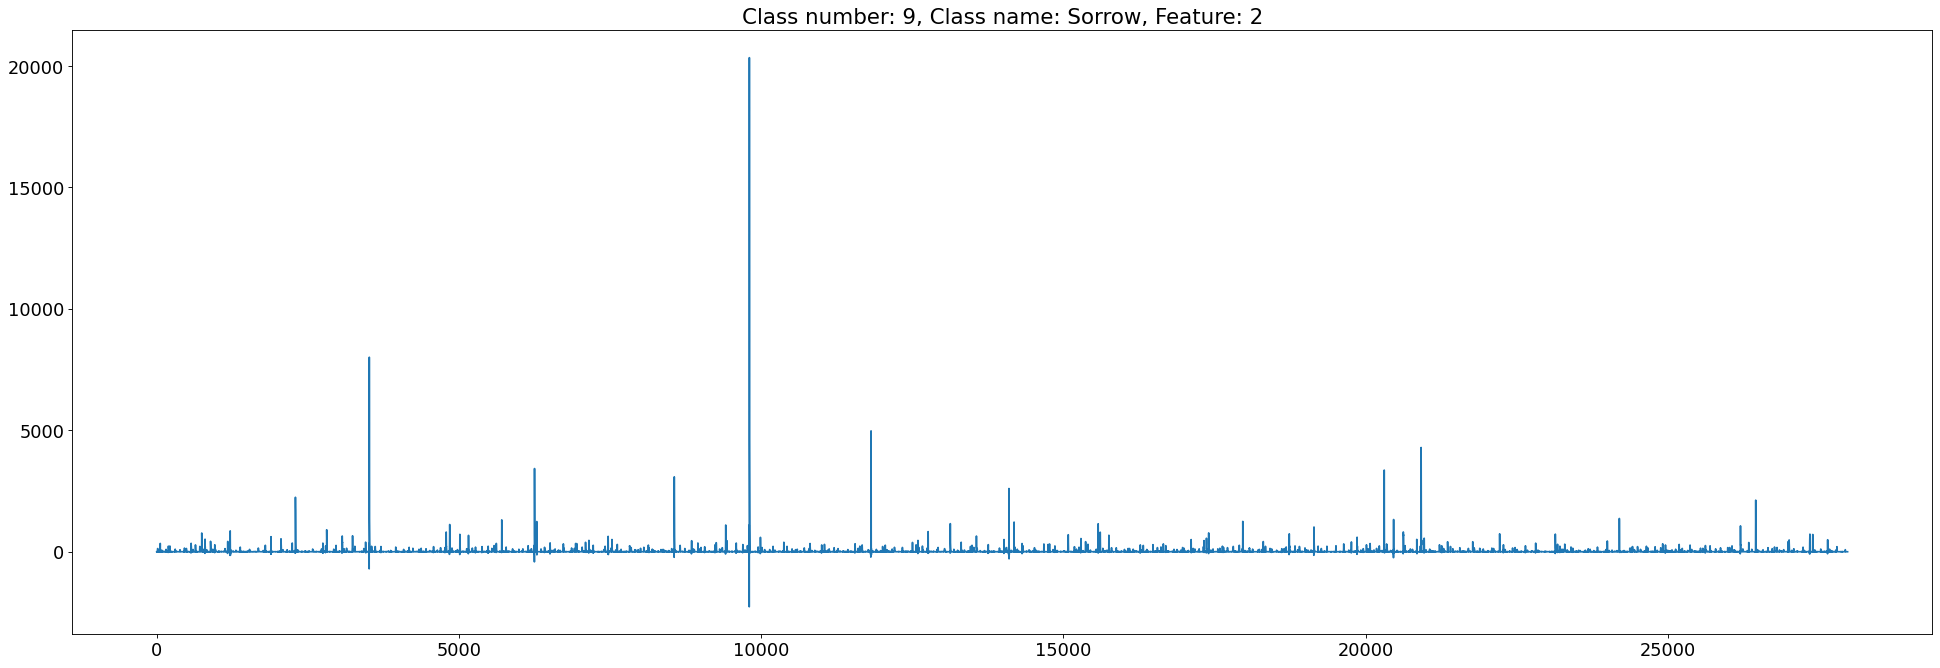

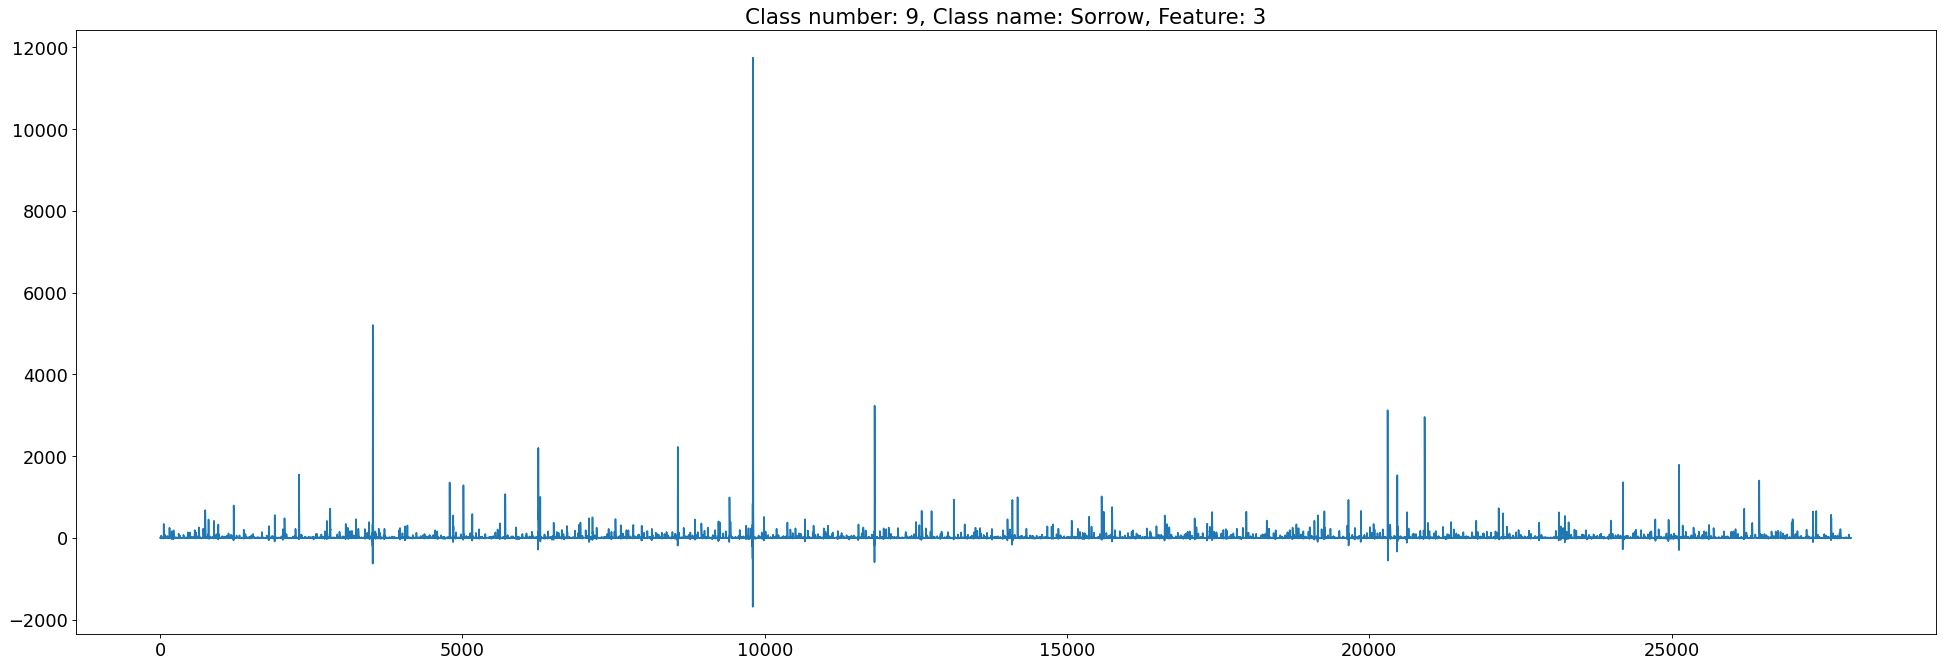

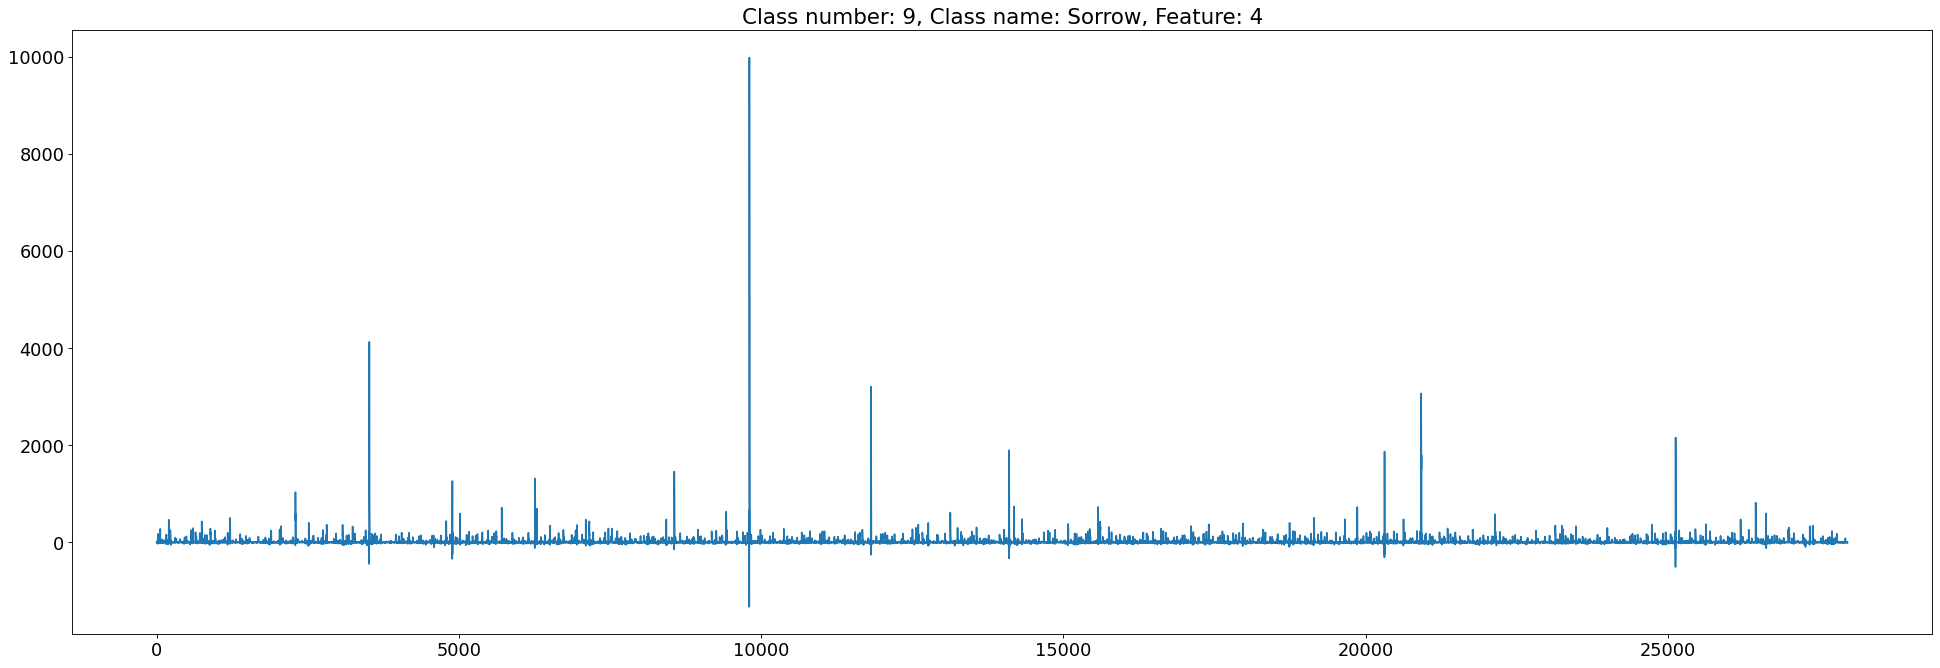

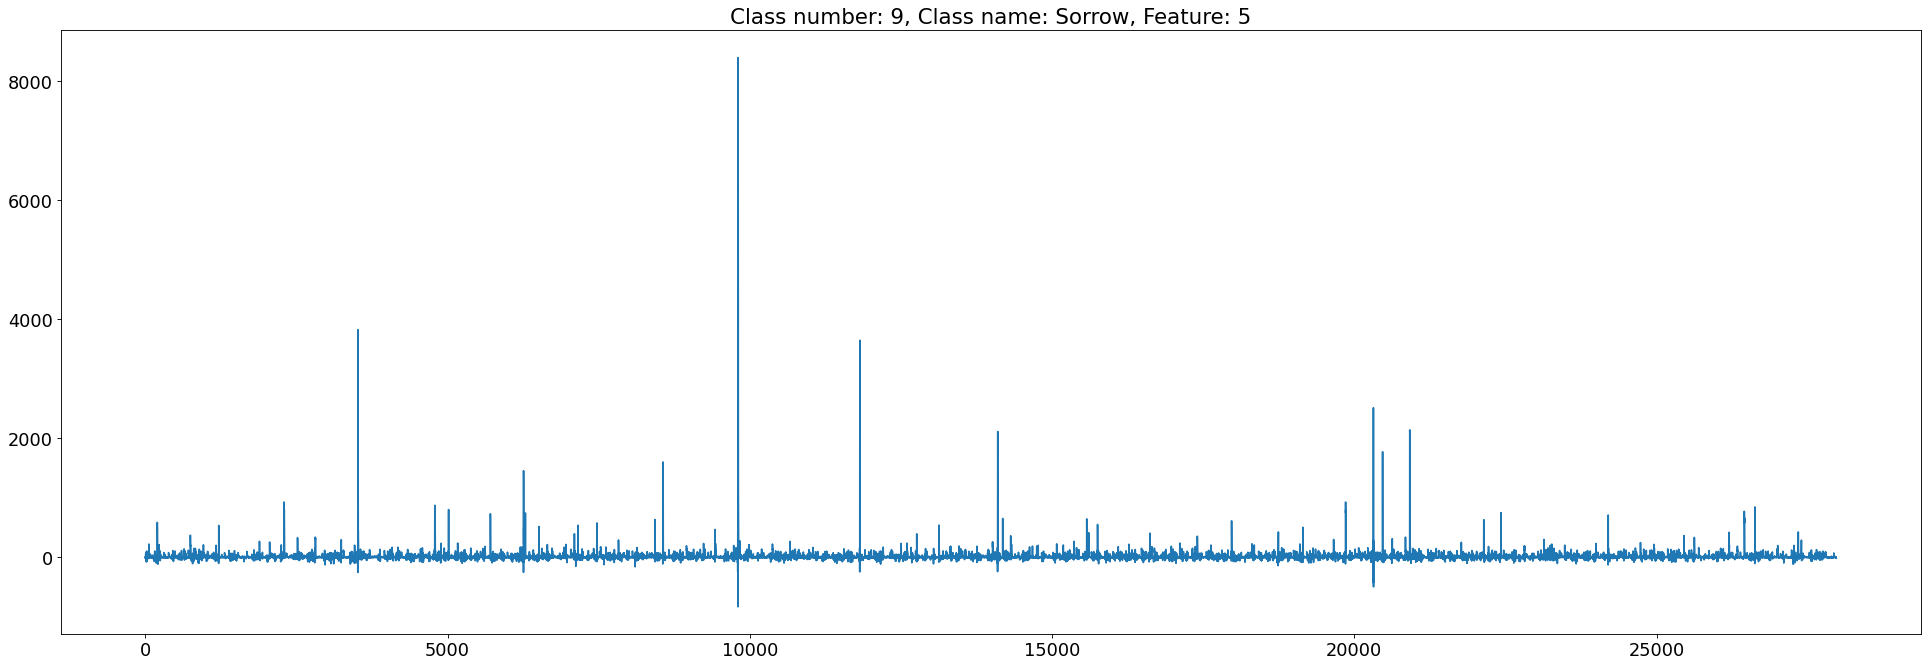

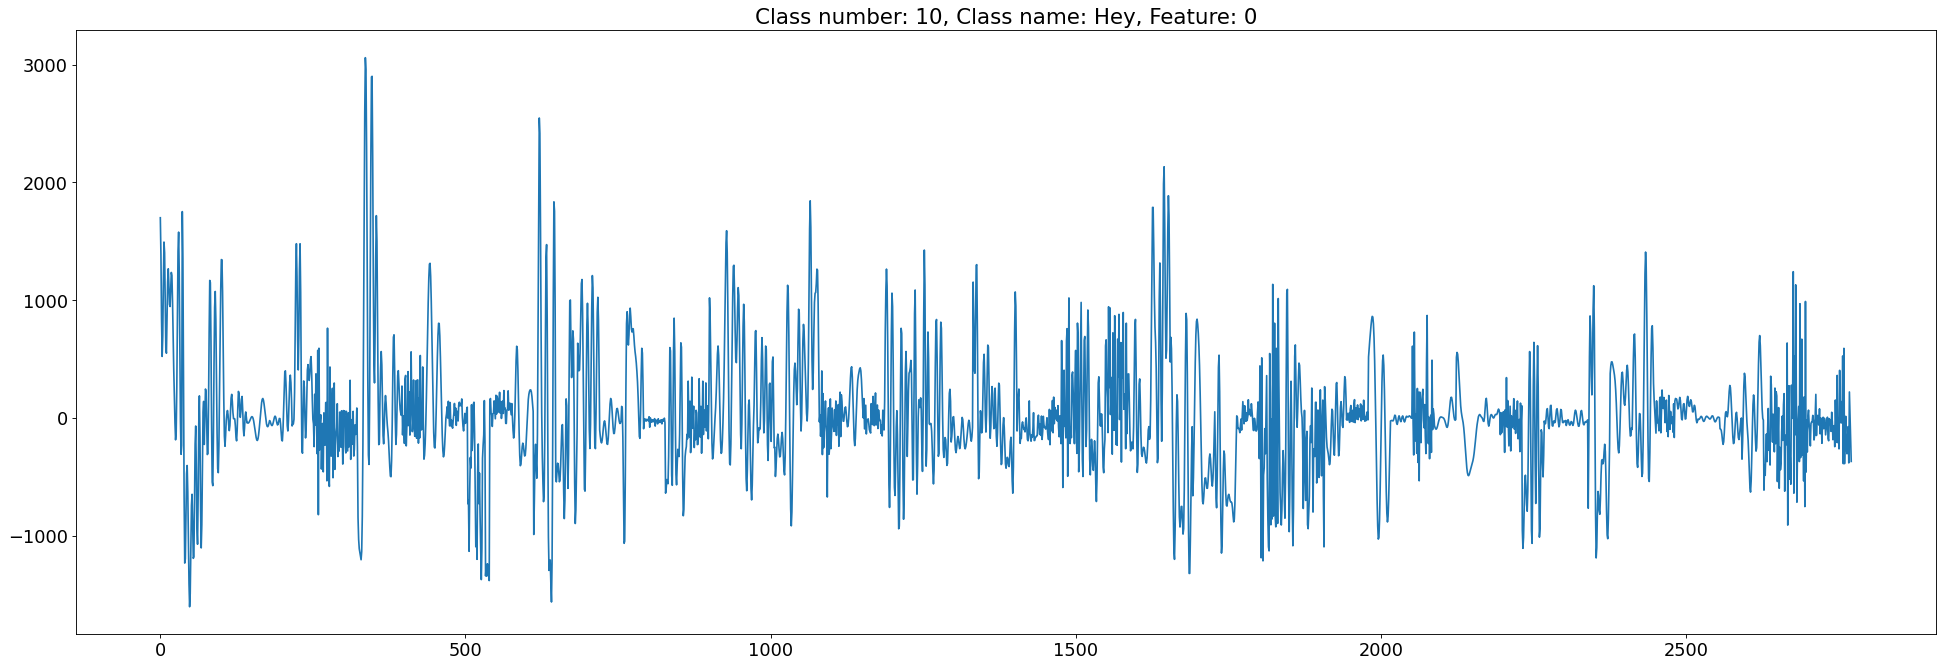

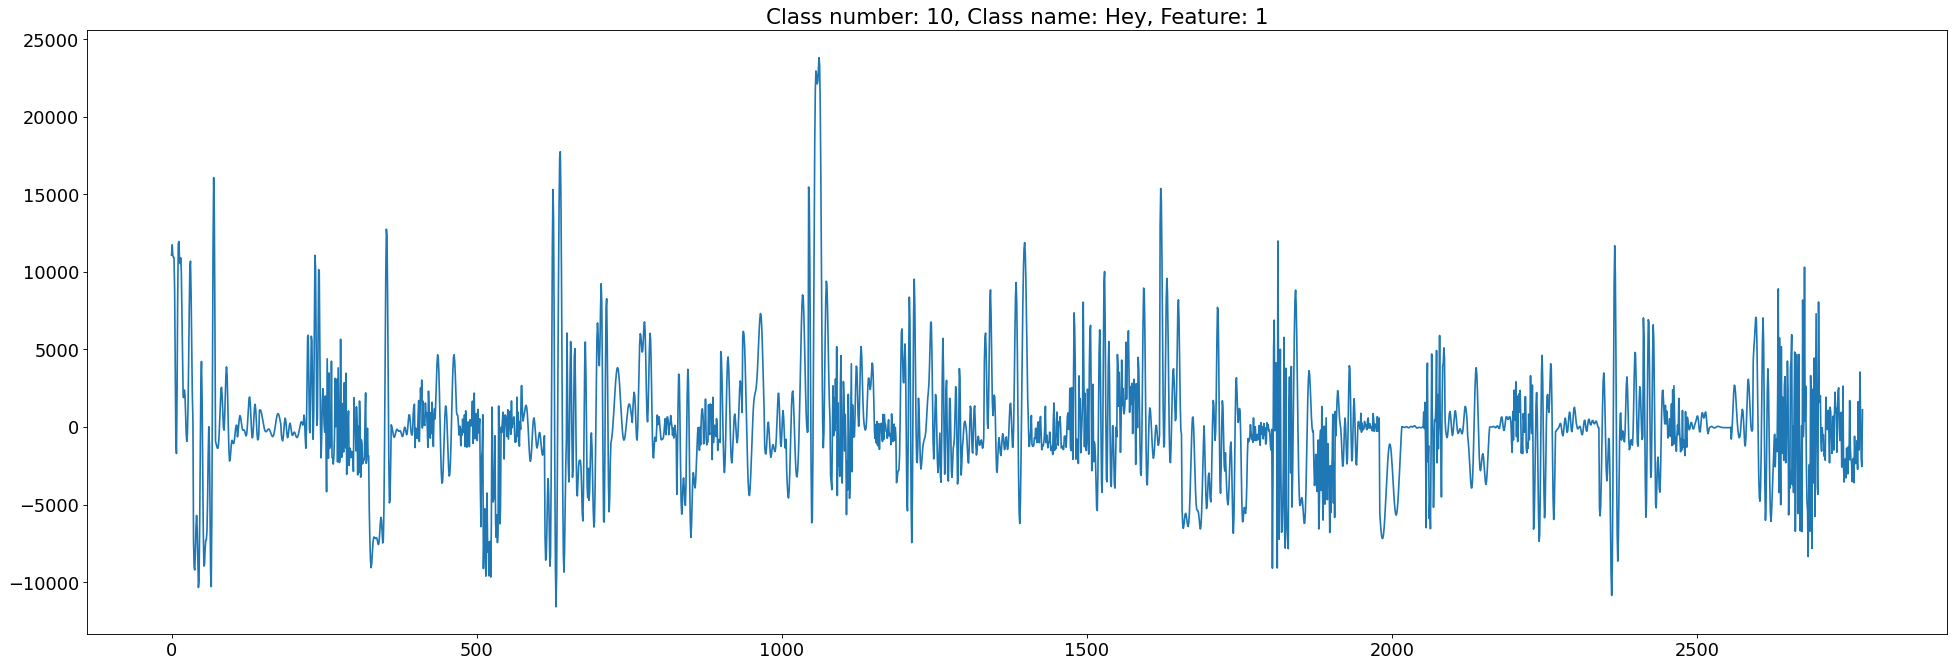

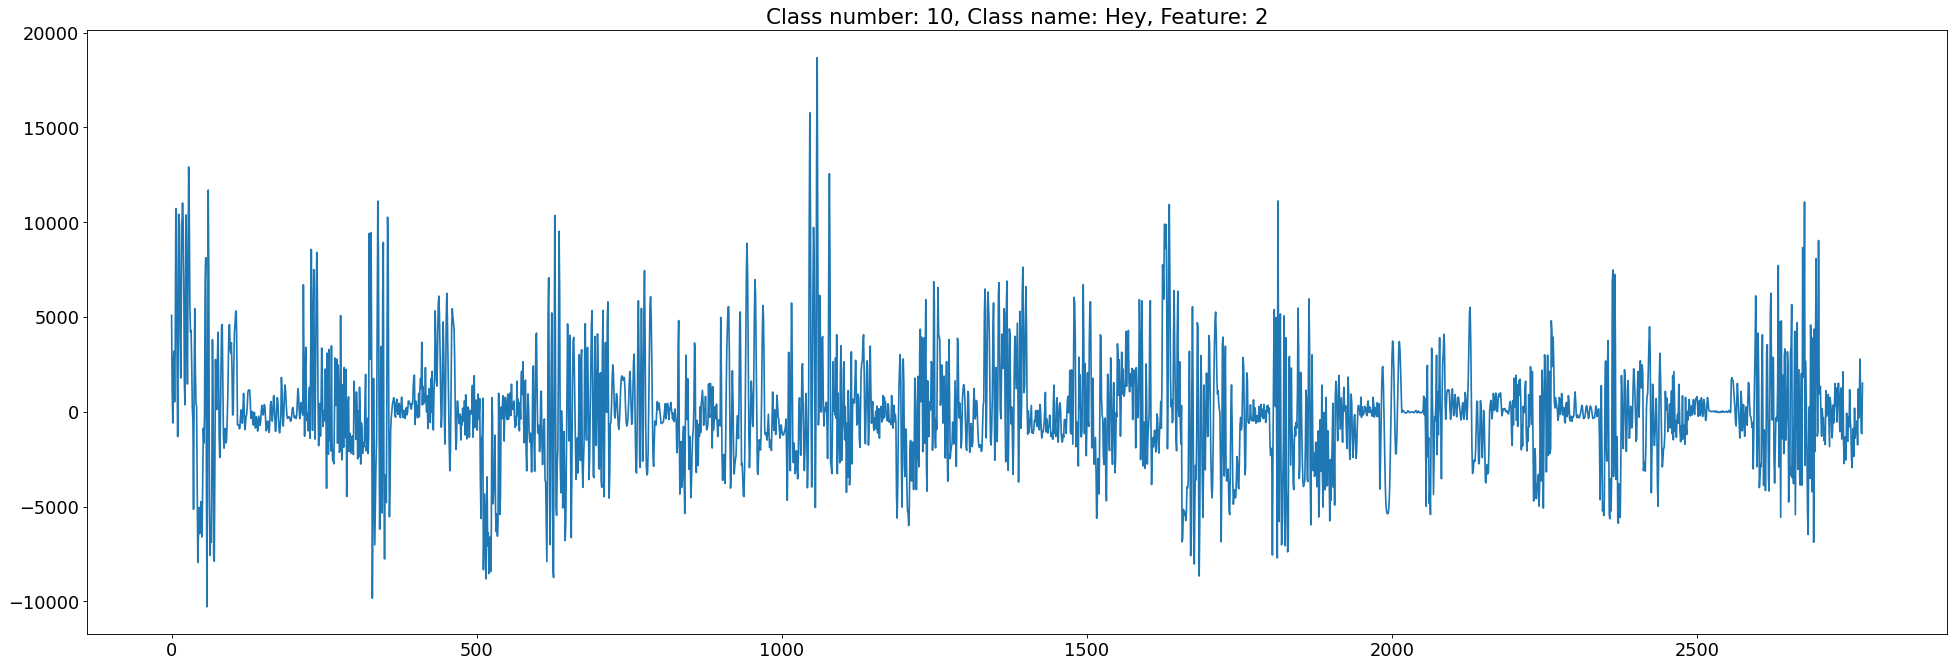

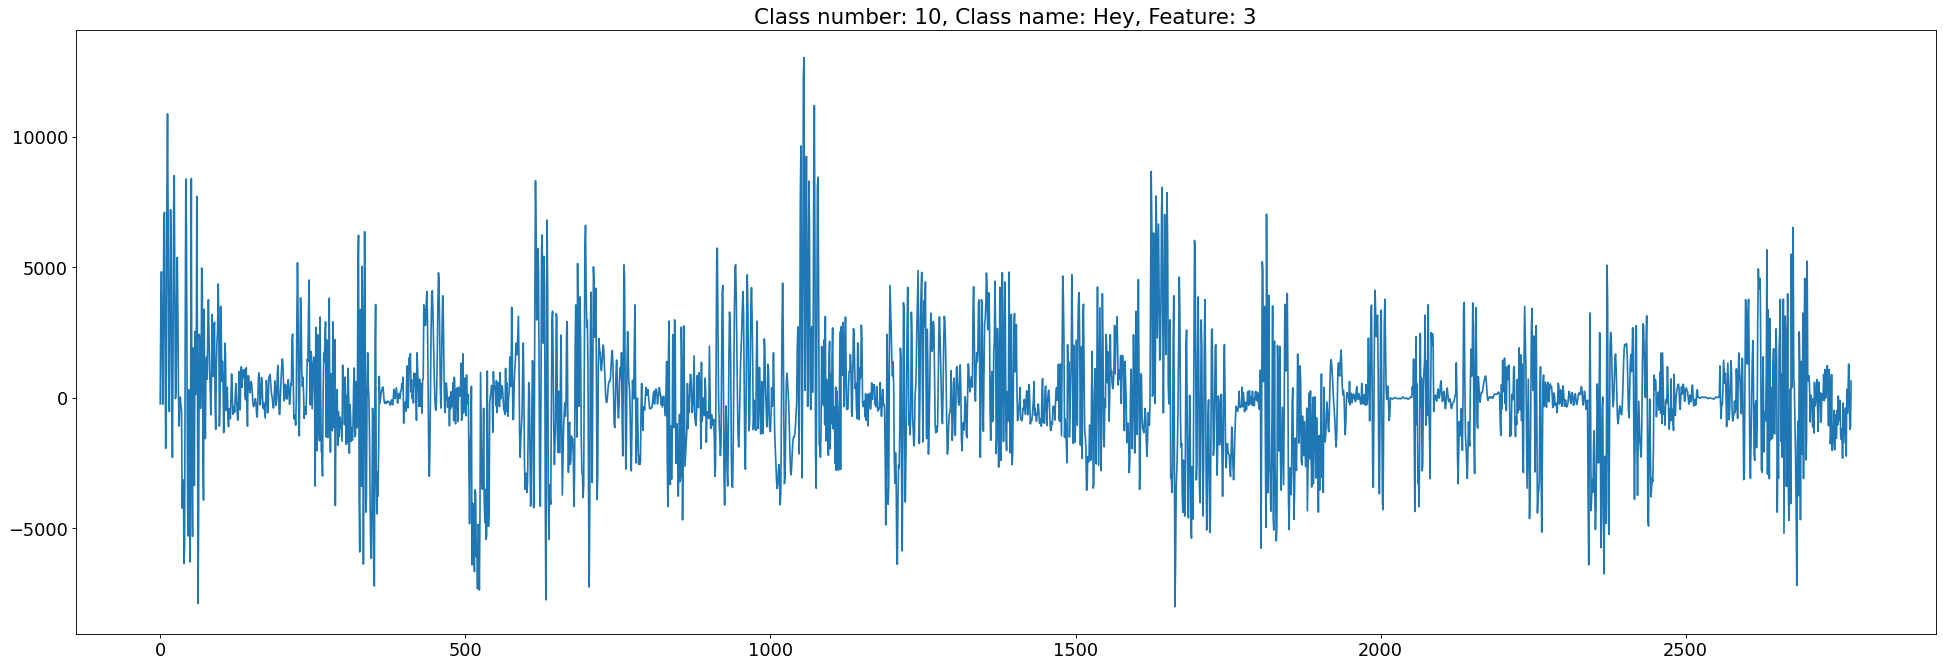

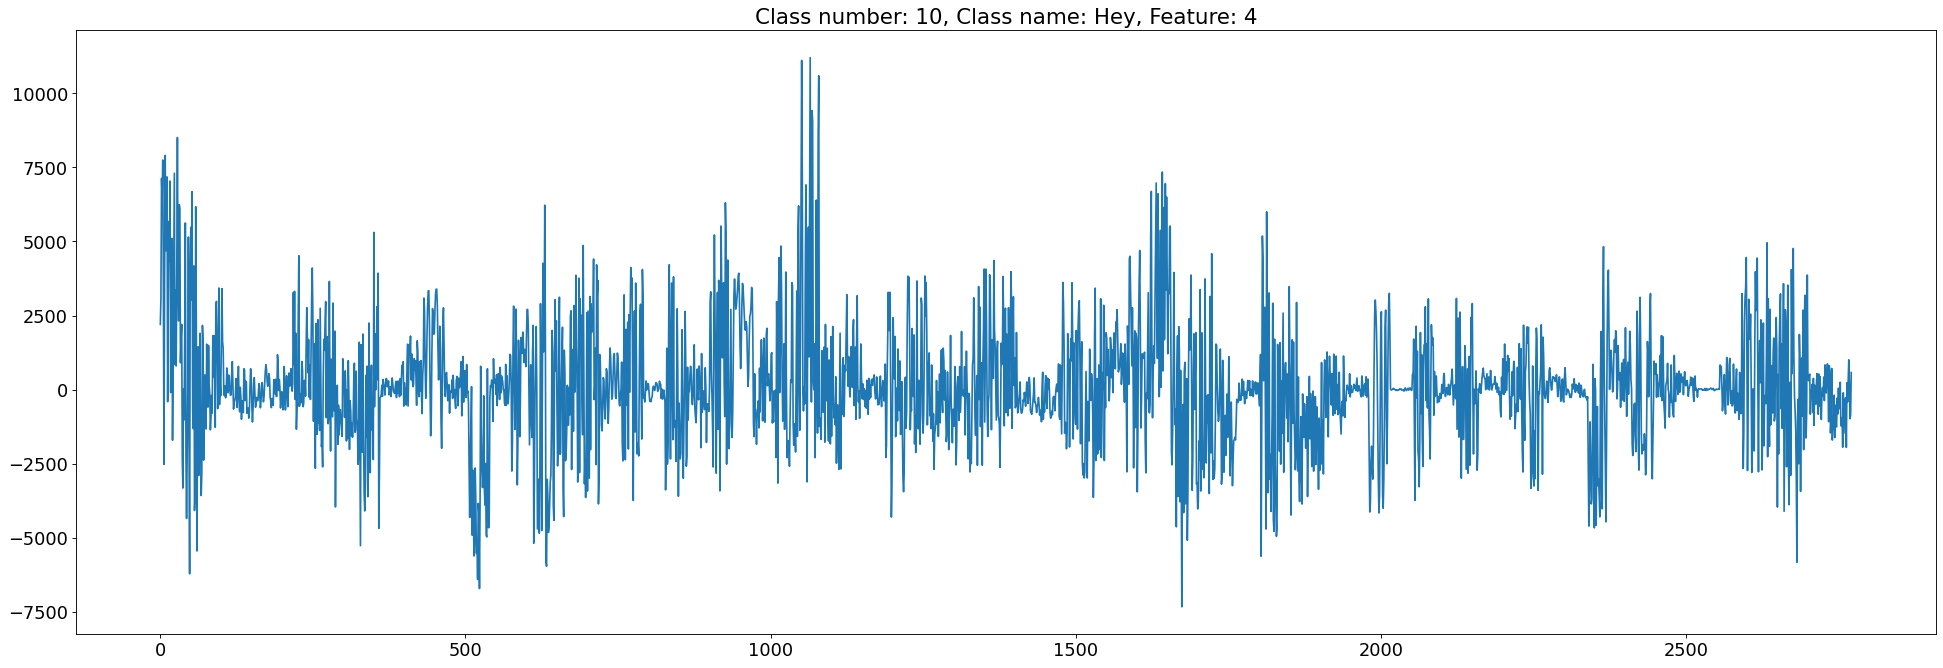

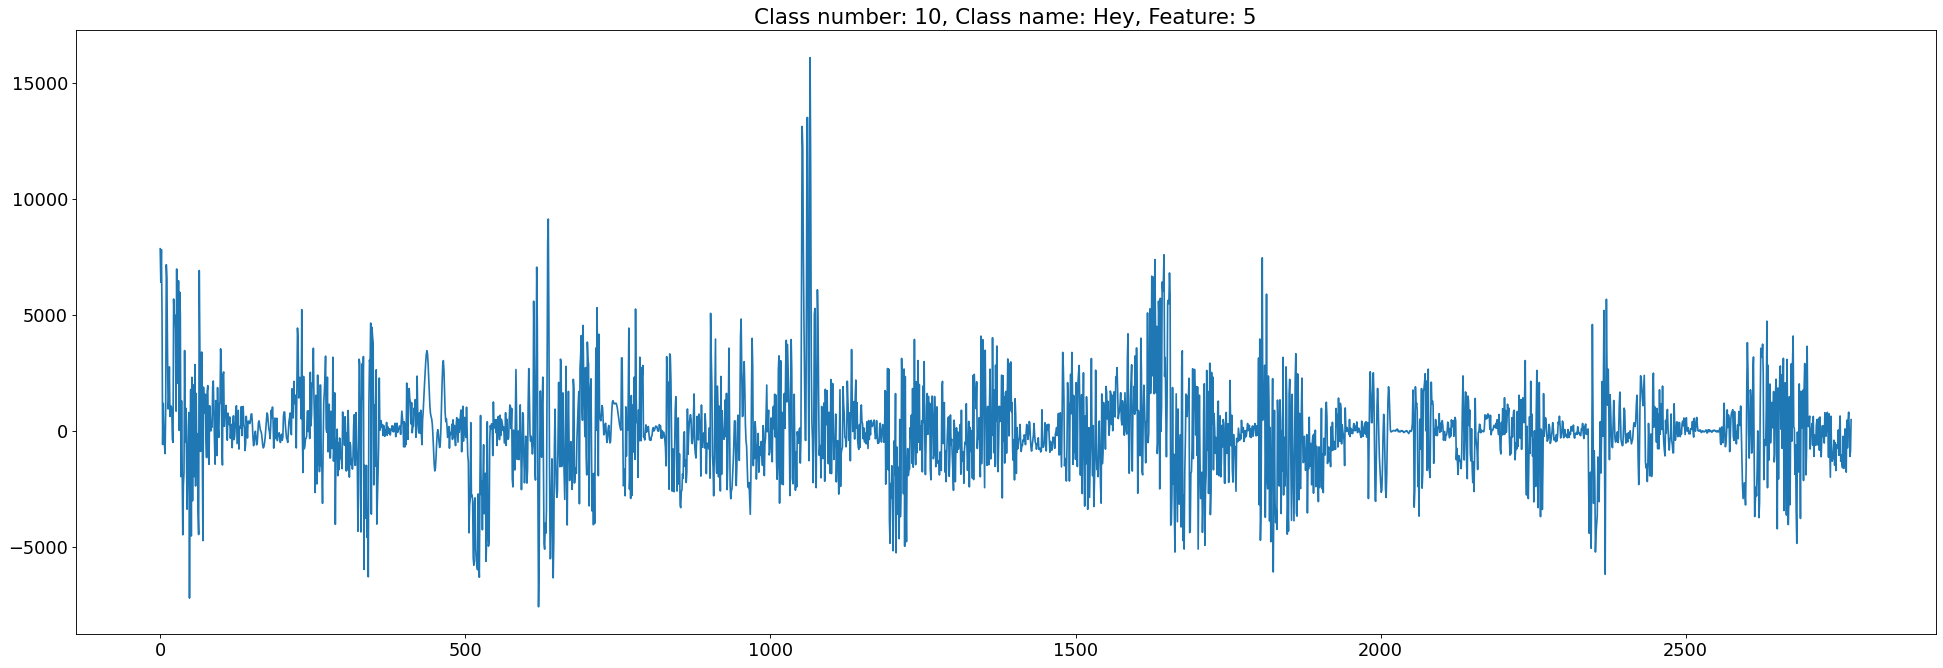

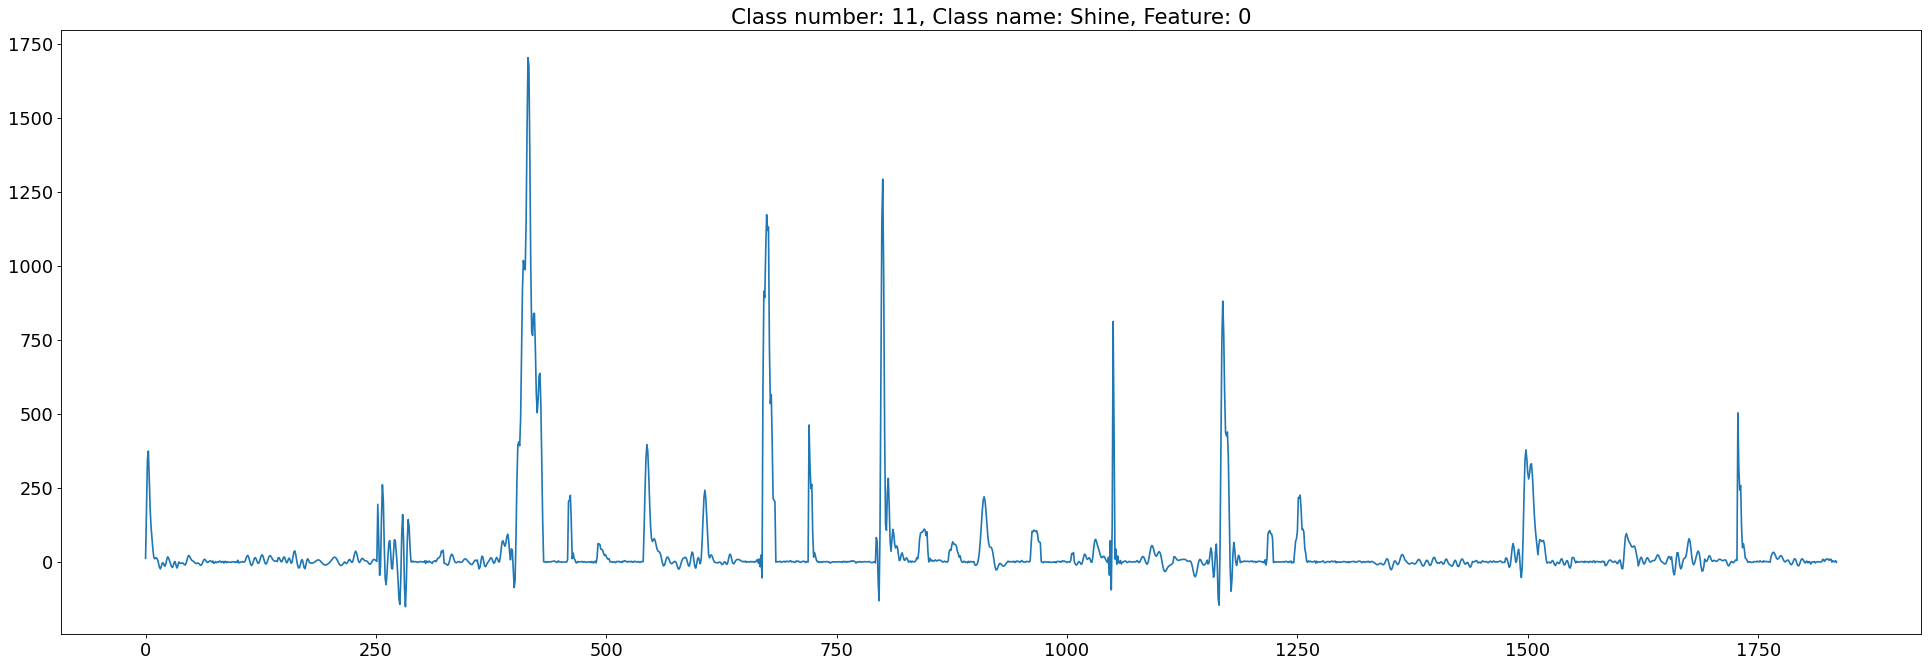

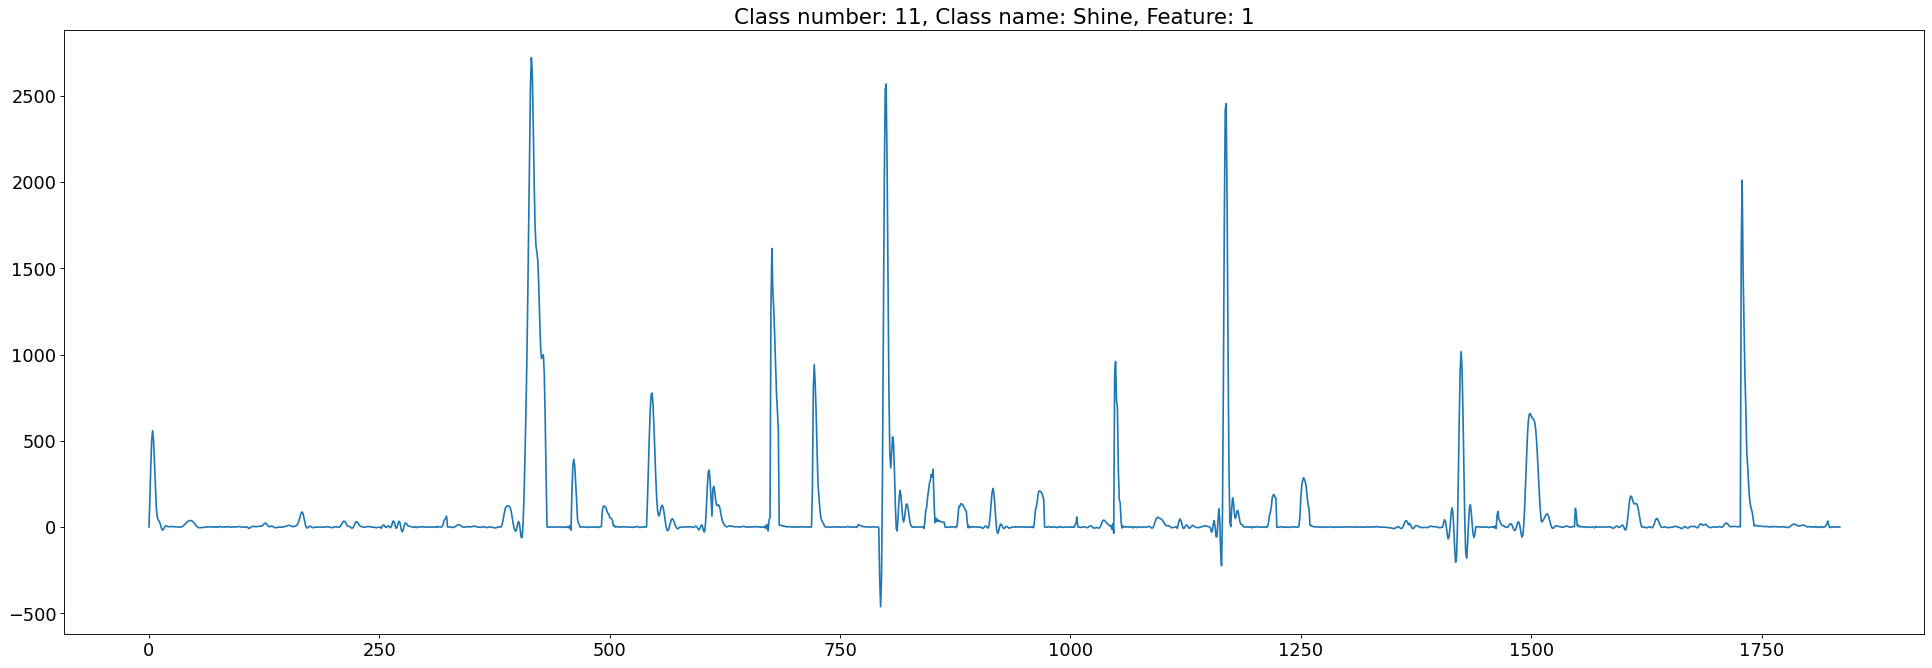

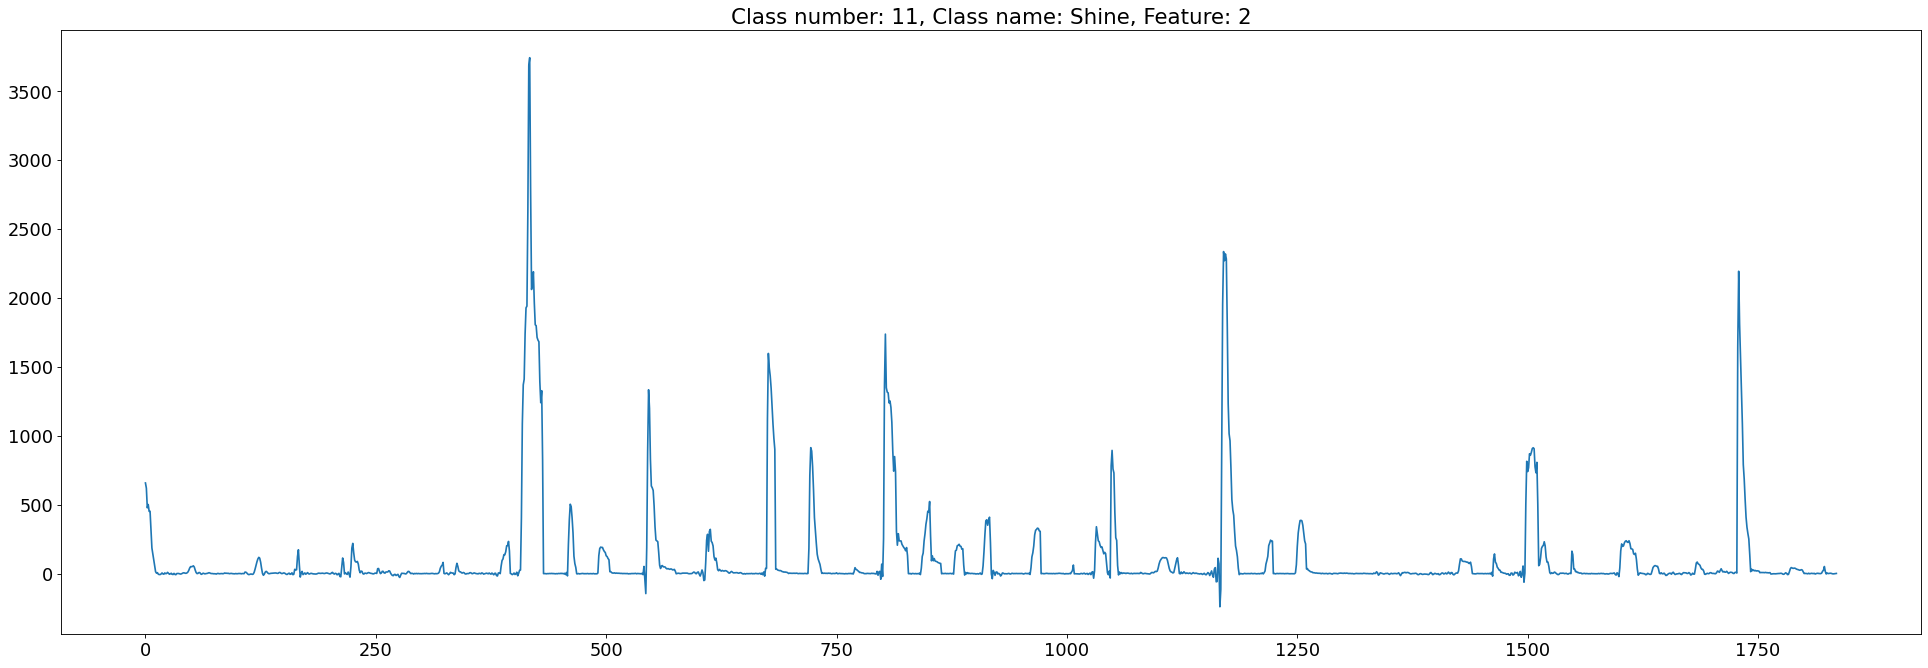

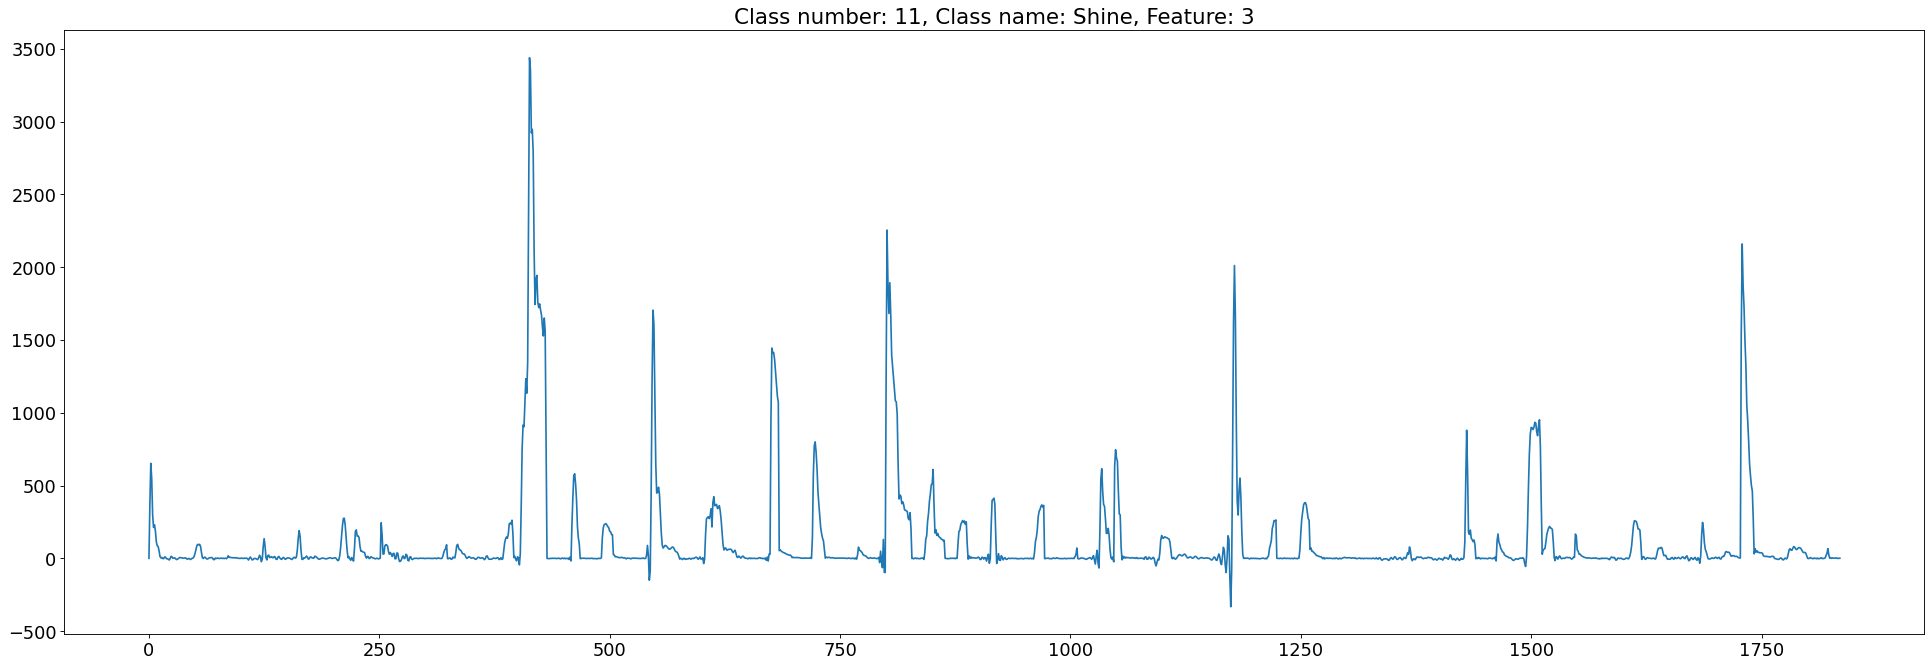

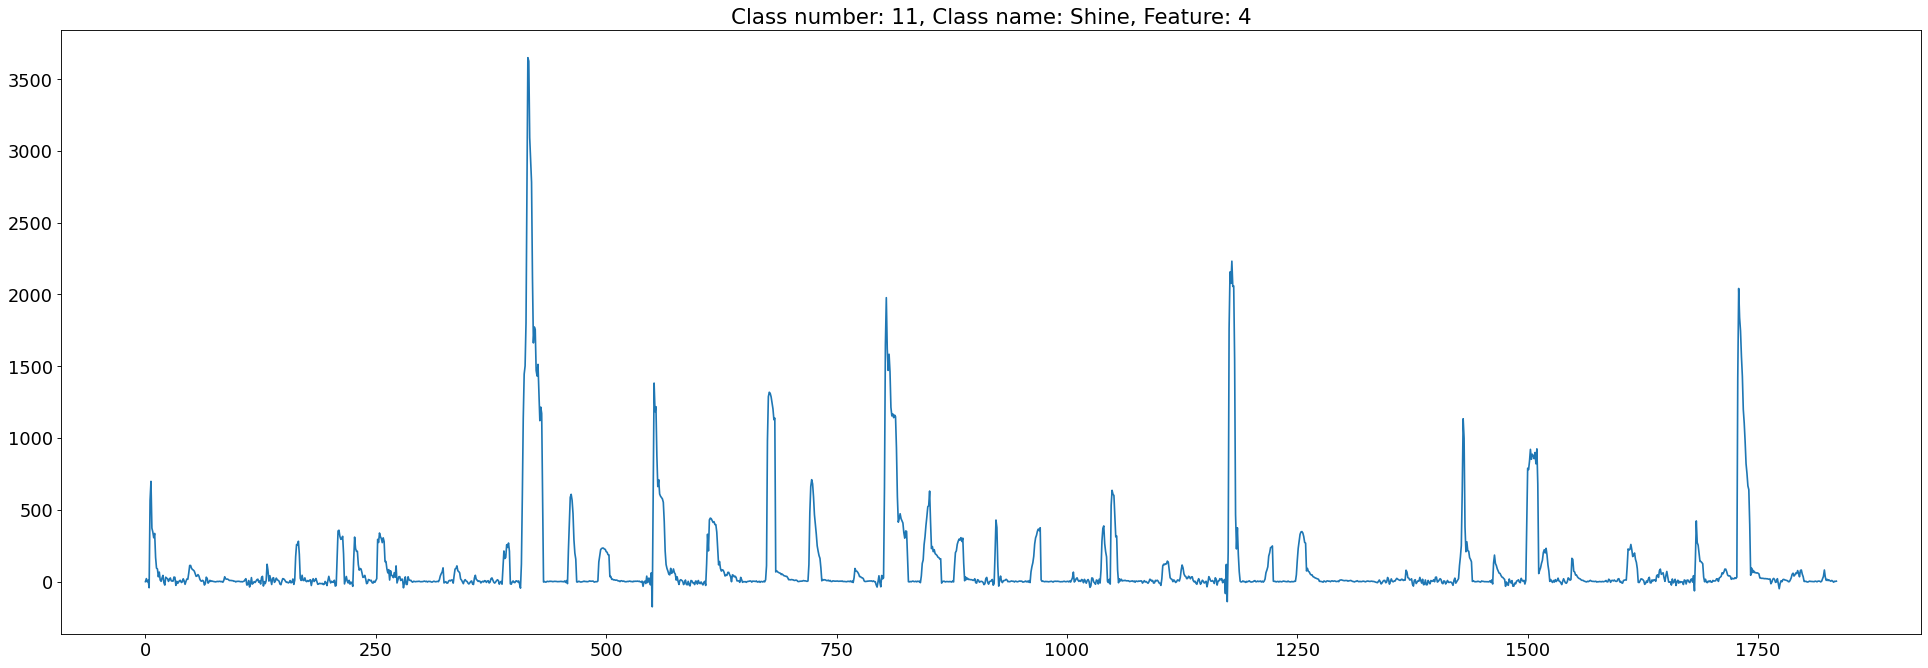

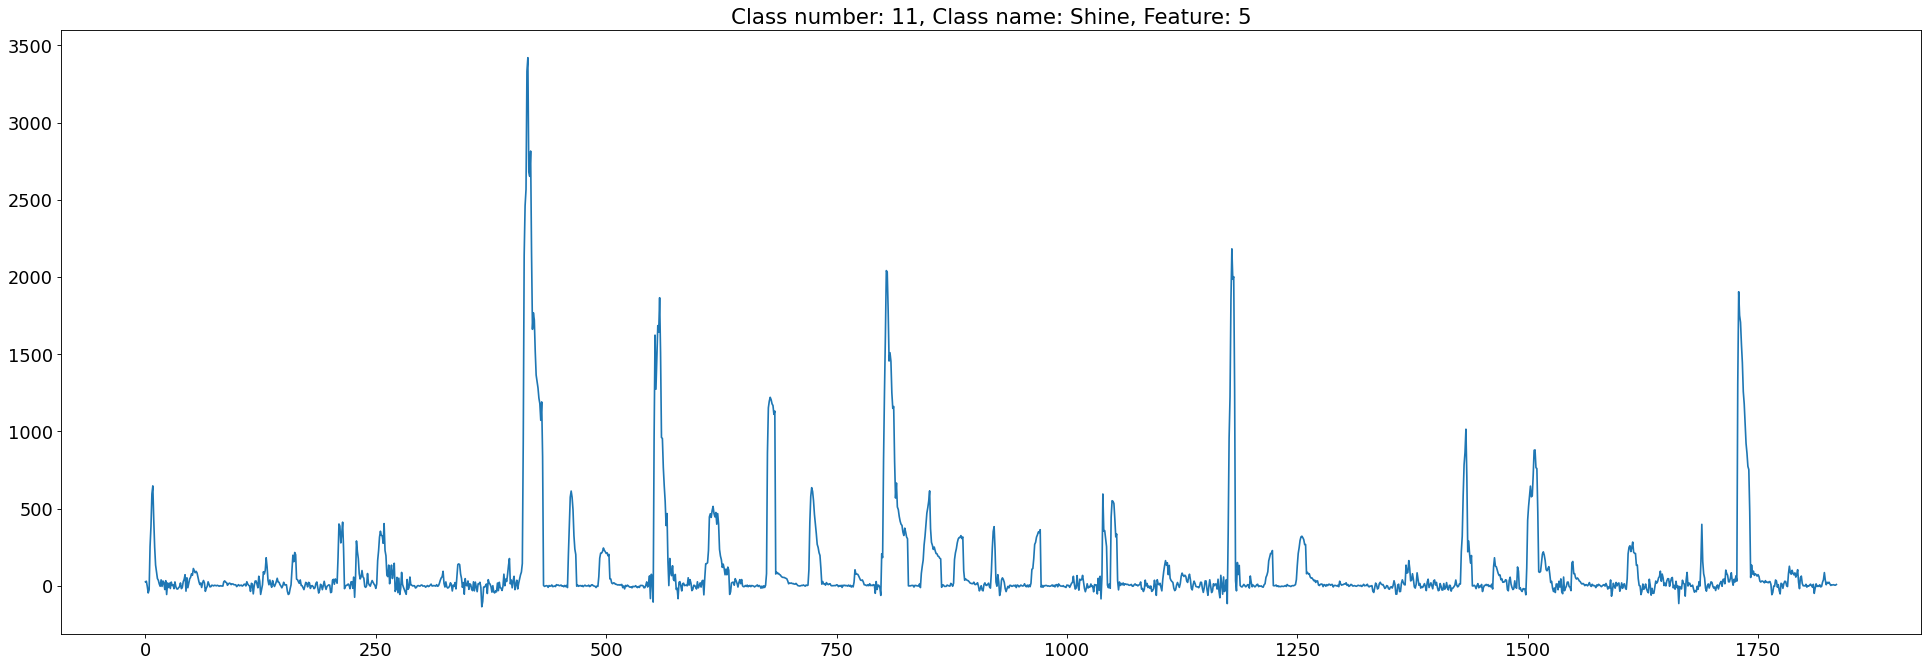

In [ ]:
pdf2 = matplotlib.backends.backend_pdf.PdfPages("SingleFeaturePerClasses.pdf")
for i in range(0,12):
  for j in range(6):
    inspect_feature_of_class(i, j)
pdf2.close()

In [ ]:
def inspect_class_per_windows(class_int, size_to_inspect=0):
  array = classes[class_int]
  if size_to_inspect == 0 or size_to_inspect > array.shape[0]:
    dataMiddle = array[:]
  else:
    dataMiddle = array[:size_to_inspect]
  for i in np.ndindex(dataMiddle.shape[:1]):
    data = dataMiddle[i]
    plt.figure(figsize=(18,9), dpi=80)
    plt.plot(data)
    title = "Class: " + str(class_int) + ", Window: " + str(i[0] + 1)
    plt.title(title)
    plt.show()

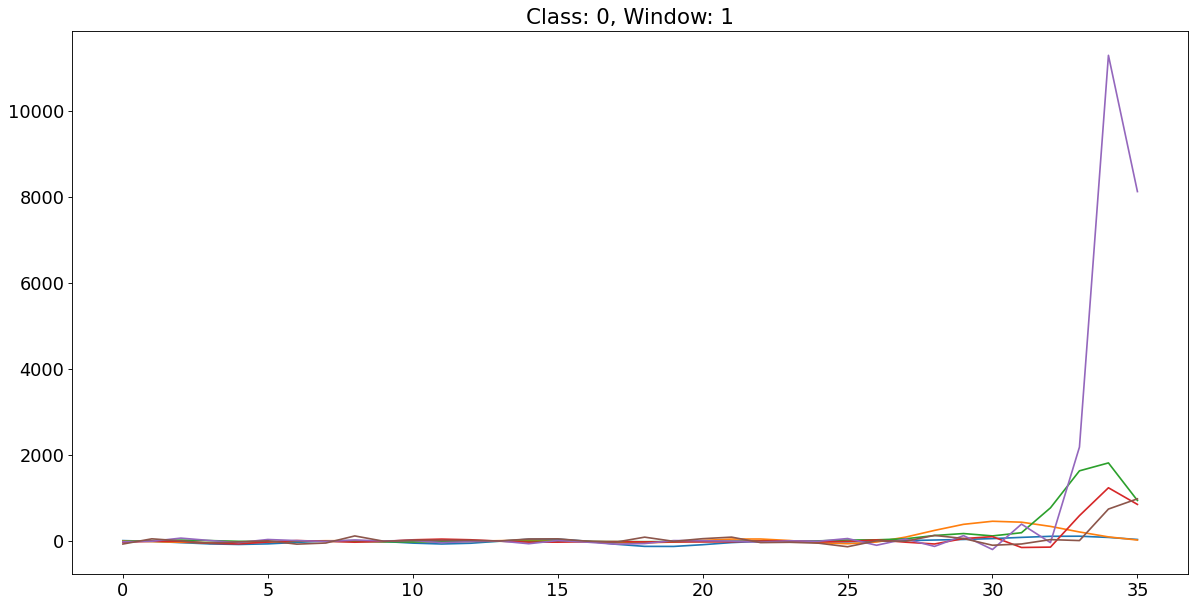

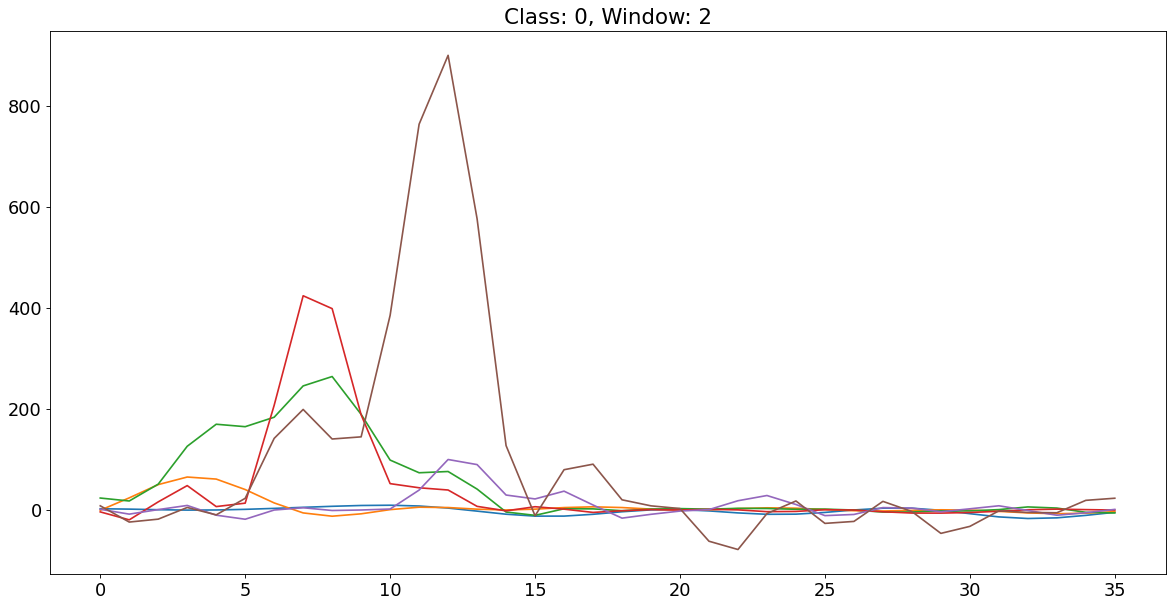

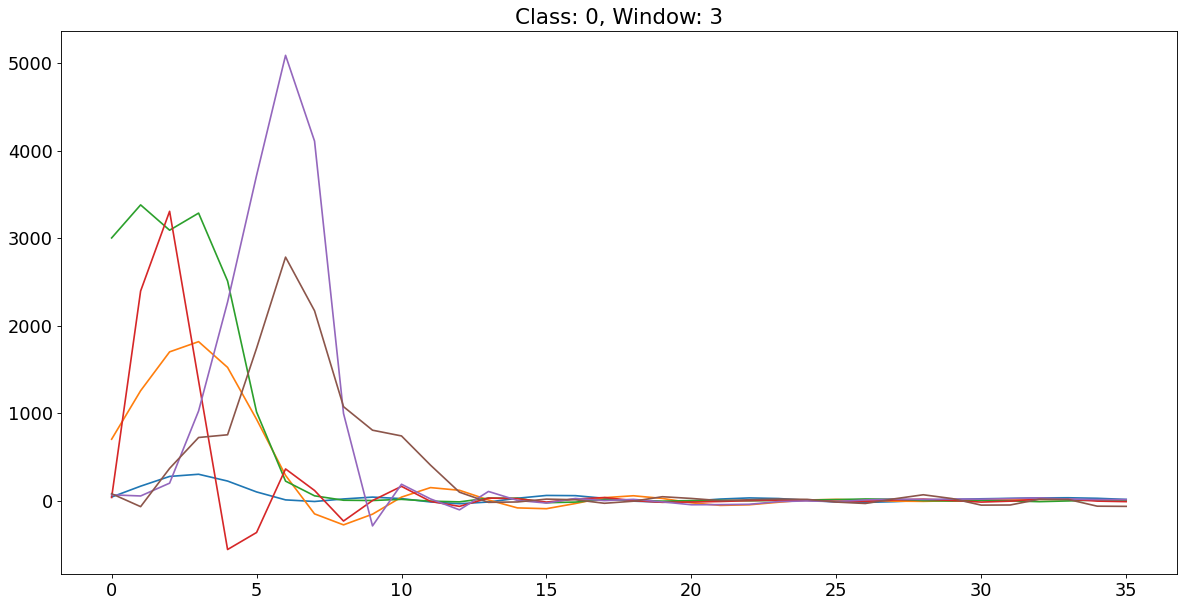

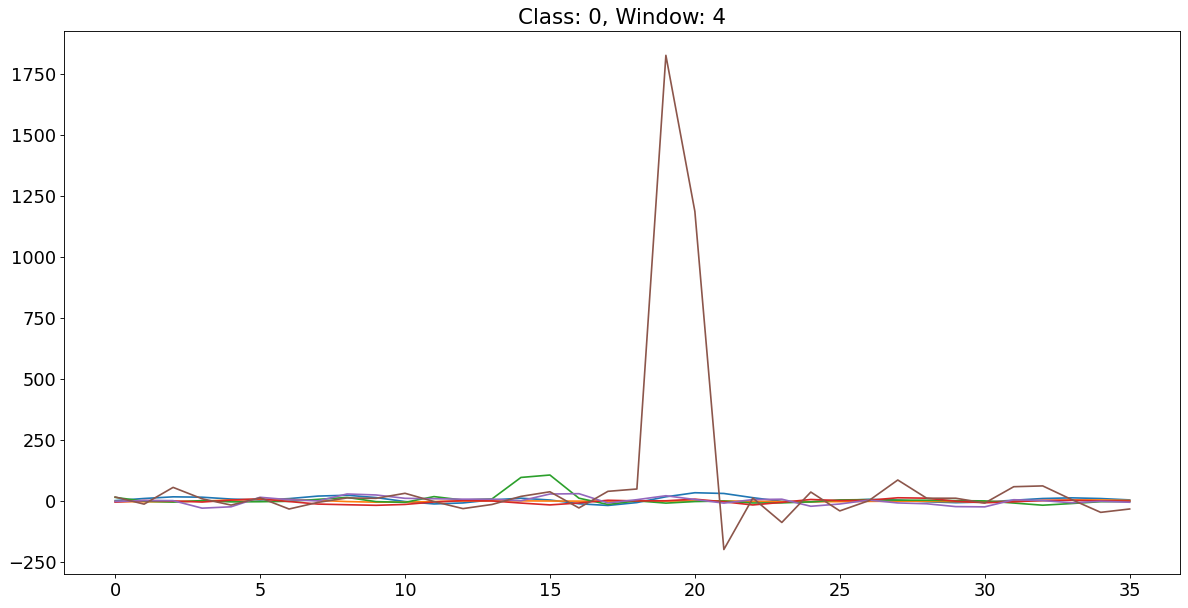

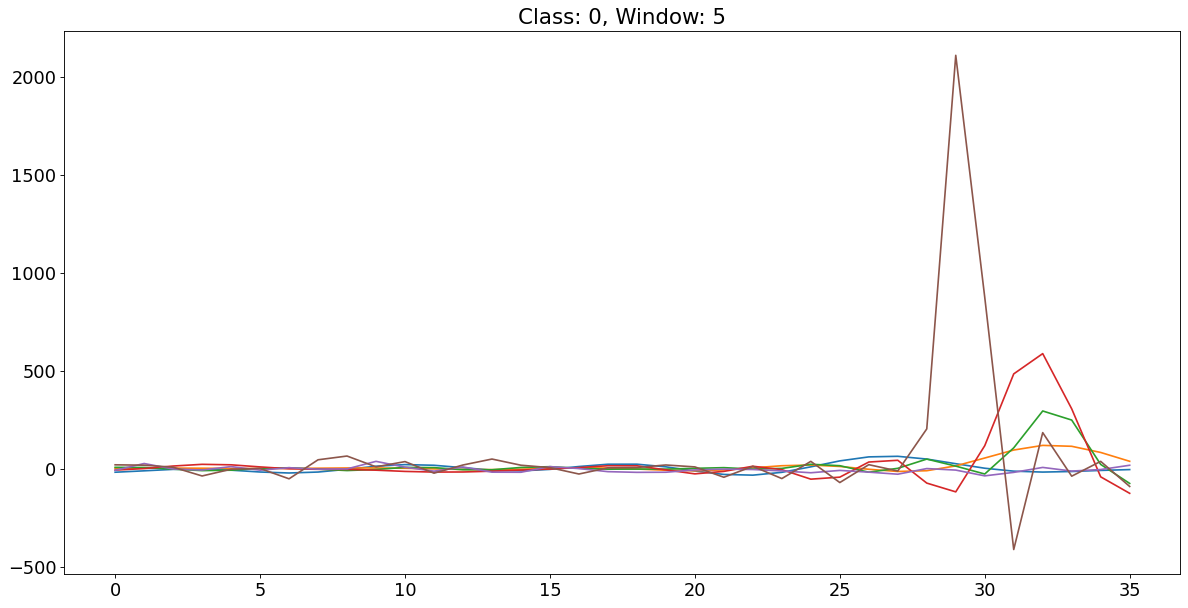

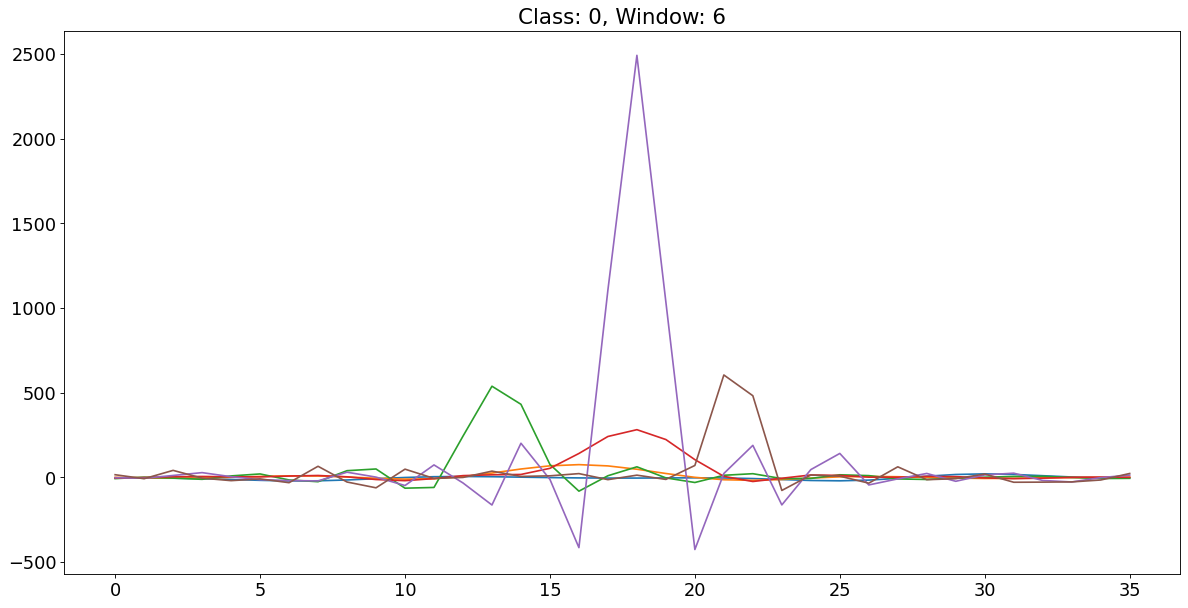

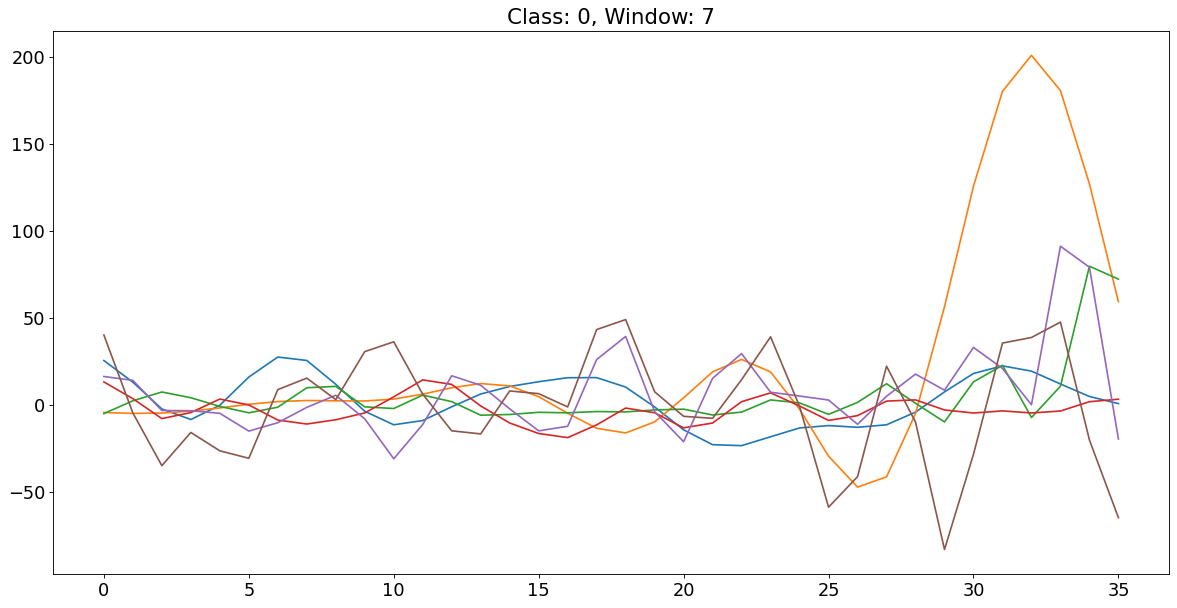

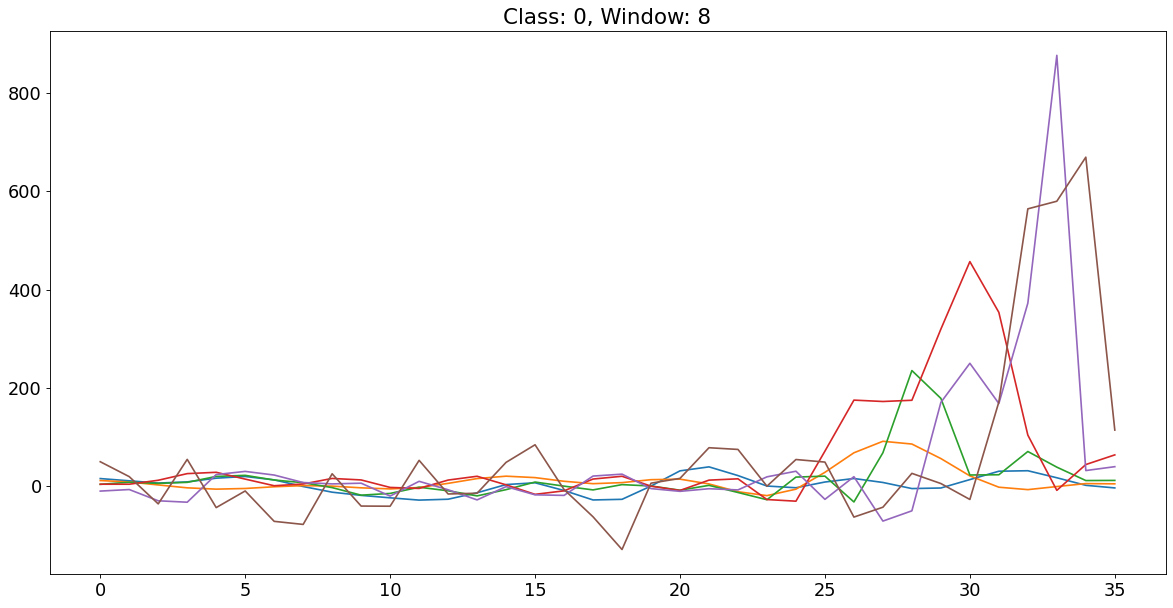

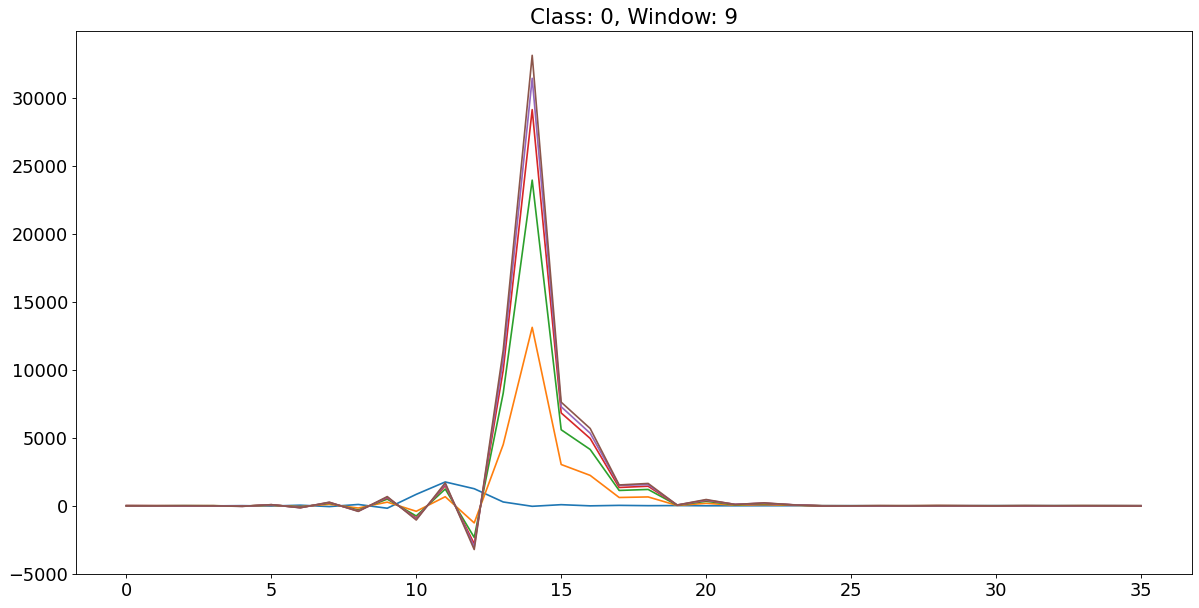

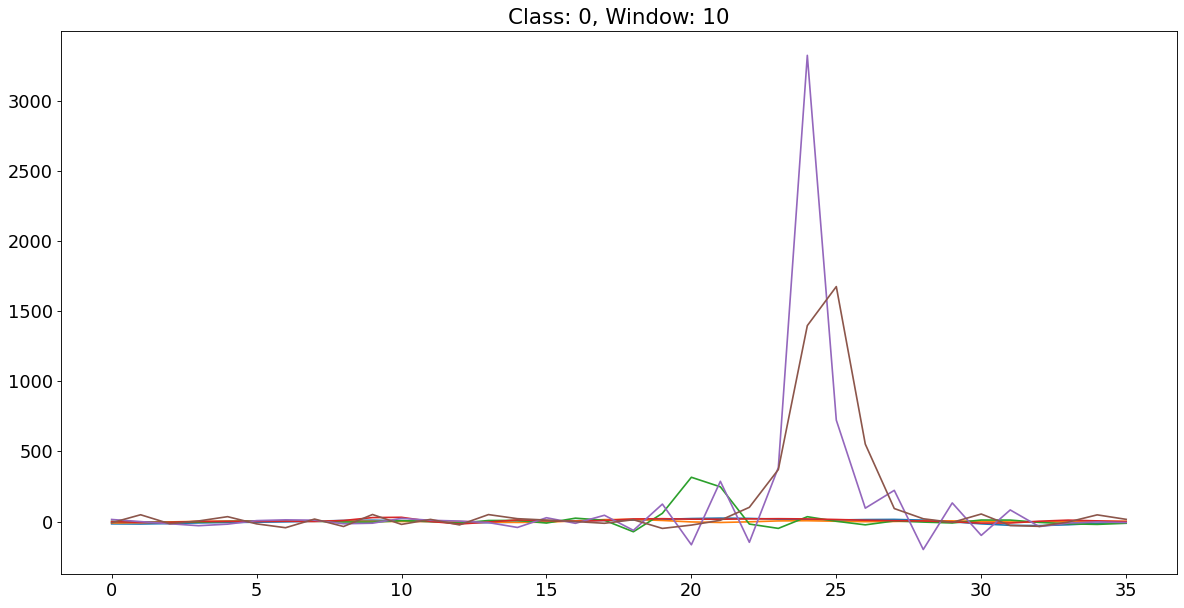

In [ ]:
inspect_class_per_windows(0, 10)